In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
#import cufflinks as cf
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")
data4=pd.read_csv("Data_2020.csv")
data5=pd.read_csv("Data_PM_2017.csv")
data6=pd.read_csv("Data_PM_2018.csv")
data7=pd.read_csv("Data_PM_2019.csv")
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()
s_code1=data1['station_code'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()
s_code2=data2['station_code'].to_list()


p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()
s_code3=data3['station_code'].to_list()

p_id4=data4['pollutant_id'].to_list()
date4=data4['date_time'].to_list()
p_value4=data4['pollutant_value'].to_list()
s_code4=data4['station_code'].to_list()

p_id=p_id1+p_id2+p_id3+p_id4
date=date1+date2+date3+date4
p_value=p_value1+p_value2+p_value3+p_value4
s_code=s_code1+s_code2+s_code3+s_code4

#Particulate matter
p_id5=data5['Pollutant_Id'].to_list()
#date5=data5['date_time'].to_list()
p_value5=data5['Pollutant_Value'].to_list()
s_code5=data5['Station_code'].to_list()

p_id6=data6['pollutant_id'].to_list()
#date6=data6['date_time'].to_list()
p_value6=data6['pollutant_value'].to_list()
s_code6=data6['station_code'].to_list()


p_id7=data7['pollutant_id'].to_list()
#date7=data7['date_time'].to_list()
p_value7=data7['pollutant_value'].to_list()
s_code7=data7['station_code'].to_list()

P_id=p_id5+p_id6+p_id7
P_value=p_value5+p_value6+p_value7
S_code=s_code5+s_code6+s_code7

In [8]:
date_NT=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==1]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==1]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==1)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==1)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==1)]
date_NT[35062],CO[35062]

('31/12/2020 22:00', '4196.2')

 ##  NICOSIA TRAFFIC

In [9]:
date_NT=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==1]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==1]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==1)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==1)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==1)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_NT=[[date_NT[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_NT))] 
data_NT= pd.DataFrame(data_NT, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_NT["CO"] = pd.to_numeric(data_NT["CO"], downcast="float")
data_NT["NO_2"] = pd.to_numeric(data_NT["NO_2"], downcast="float")
data_NT["SO_2"] = pd.to_numeric(data_NT["SO_2"], downcast="float")
data_NT["O_3"] = pd.to_numeric(data_NT["O_3"], downcast="float")

column_mean1 = data_NT['CO'].mean()
column_mean2 = data_NT['NO_2'].mean()
column_mean3 = data_NT['SO_2'].mean()
column_mean4 = data_NT['O_3'].mean()

data_NT['CO'].fillna(column_mean1)
data_NT['NO_2'].fillna(column_mean2)
data_NT['SO_2'].fillna(column_mean3)
data_NT['O_3'].fillna(column_mean4)

data_NT['Date'] = pd.to_datetime(data_NT['Date'])
data_NT=data_NT.set_index('Date')
data_NT_O=data_NT

data_NT=data_NT.resample('D').mean()
#Nicosia Traffic
PM_2_5_NT=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==1)]
PM_10_NT=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==1)]
data_NT['PM_2.5']=PM_2_5_NT
data_NT['PM_10']=PM_10_NT
column_mean9 = data_NT['PM_2.5'].mean()
column_mean10 = data_NT['PM_10'].mean()

data_NT['PM_2.5'].fillna(column_mean9)
data_NT['PM_10'].fillna(column_mean10)
data_NT_O.shape


ValueError: Length of values does not match length of index

In [ ]:
data_NT_O[24000:24290]

In [ ]:
data_NT.describe()

# Variance Inflator factor(VIF)

A value of 1 indicates there is no correlation between a given explanatory variable and 
any other explanatory variables in the model.A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('NO_2 ~ SO_2+O_3+CO', data=data_NT, return_type='dataframe')
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

In [ ]:
date_NR=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==2]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==2]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==2)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==2)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==2)]

## NICOSIA RESIDENCE

In [6]:
date_NR=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==2]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==2]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==2)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==2)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==2)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_NR=[[date_NR[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_NR))] 
data_NR= pd.DataFrame(data_NR, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_NR["CO"] = pd.to_numeric(data_NR["CO"], downcast="float")
data_NR["NO_2"] = pd.to_numeric(data_NR["NO_2"], downcast="float")
data_NR["SO_2"] = pd.to_numeric(data_NR["SO_2"], downcast="float")
data_NR["O_3"] = pd.to_numeric(data_NR["O_3"], downcast="float")

column_mean5 = data_NR['CO'].mean()
column_mean6 = data_NR['NO_2'].mean()
column_mean7 = data_NR['SO_2'].mean()
column_mean8 = data_NR['O_3'].mean()

data_NR['CO'].fillna(column_mean5)
data_NR['NO_2'].fillna(column_mean6)
data_NR['SO_2'].fillna(column_mean7)
data_NR['O_3'].fillna(column_mean8)

data_NR['Date'] = pd.to_datetime(data_NR['Date'])
data_NR=data_NR.set_index('Date')
data_NR_O=data_NR
data_NR=data_NR.resample('D').mean()
PM_2_5_NR=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==2)]
PM_10_NR=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==2)]
data_NR['PM_2.5']=PM_2_5_NR
data_NR['PM_10']=PM_10_NR
column_mean11 = data_NR['PM_2.5'].mean()
column_mean12 = data_NR['PM_10'].mean()

data_NR['PM_2.5'].fillna(column_mean11)
data_NR['PM_10'].fillna(column_mean12)

data_NR.head()


ValueError: Length of values does not match length of index

In [ ]:
data_NR.describe()

## EMEP-Ayia Marina -Background

In [ ]:
date_Z=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==9]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==8]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==9)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==9)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==9)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_Z=[[date_Z[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_Z))] 
data_Z= pd.DataFrame(data_Z, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_Z["CO"] = pd.to_numeric(data_Z["CO"], downcast="float")
data_Z["NO_2"] = pd.to_numeric(data_Z["NO_2"], downcast="float")
data_Z["SO_2"] = pd.to_numeric(data_Z["SO_2"], downcast="float")
data_Z["O_3"] = pd.to_numeric(data_Z["O_3"], downcast="float")

column_mean13 = data_Z['CO'].mean()
column_mean14 = data_Z['NO_2'].mean()
column_mean15 = data_Z['SO_2'].mean()
column_mean16 = data_Z['O_3'].mean()

data_Z['CO'].fillna(column_mean13)
data_Z['NO_2'].fillna(column_mean14)
data_Z['SO_2'].fillna(column_mean15)
data_Z['O_3'].fillna(column_mean16)
data_Z['Date'] = pd.to_datetime(data_Z['Date'])
data_Z=data_Z.set_index('Date')
data_Z_O=data_Z
data_Z=data_Z.resample('D').mean()
PM_2_5_Z=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==9)]
PM_10_Z=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==9)]
PM_10_Z[0]=6.9
data_Z['PM_2.5']=PM_2_5_Z
data_Z['PM_10']=PM_10_Z
column_mean17 = data_Z['PM_2.5'].mean()
column_mean18 = data_Z['PM_10'].mean()
PM_10_Z[0]=column_mean18
#data_Z['PM_2.5'].fillna(column_mean17)
#data_Z['PM_10'].fillna(column_mean18)

data_Z=data_Z.interpolate()
data_AM=data_Z
data_AM.head()


In [ ]:
data_AM.describe()

In [ ]:
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print("NO2".translate(subscript))

## Data visualization and Analytics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data_NT_by_month=data_NT.resample('M').mean()
data_NR_by_month=data_NR.resample('M').mean()
data_AM_by_month=data_AM.resample('M').mean()
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='CO',data=data_NT_by_month,color='hotpink')
sns.lineplot(x=data_NR_by_month.index,y='CO',data=data_NR_by_month,color='cornflowerblue')
sns.lineplot(x=data_AM_by_month.index,y='CO',data=data_AM_by_month,color='darkorange')
plt.legend(['Nicosia Traffic', 'Nicosia Residence', 'EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel(' CO concentration (μg/m^3)')

In [ ]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='NO_2',data=data_NT_by_month,color='teal')
sns.lineplot(x=data_NR_by_month.index,y='NO_2',data=data_NR_by_month,color='darkgoldenrod')
sns.lineplot(x=data_AM_by_month.index,y='NO_2',data=data_AM_by_month,color='firebrick')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$NO_{2}$'  + ' Concentration (µg/m³)')

In [ ]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='SO_2',data=data_NT_by_month,color='rebeccapurple')
sns.lineplot(x=data_NR_by_month.index,y='SO_2',data=data_NR_by_month,color='lightseagreen')
sns.lineplot(x=data_AM_by_month.index,y='SO_2',data=data_AM_by_month,color='yellowgreen')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'],loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='O_3',data=data_NT_by_month,color='lawngreen')
sns.lineplot(x=data_NR_by_month.index,y='O_3',data=data_NR_by_month,color='cyan')
sns.lineplot(x=data_AM_by_month.index,y='O_3',data=data_AM_by_month,color='darkorchid')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='PM_2.5',data=data_NT_by_month,color='dodgerblue')
sns.lineplot(x=data_NR_by_month.index,y='PM_2.5',data=data_NR_by_month,color='deeppink')
sns.lineplot(x=data_AM_by_month.index,y='PM_2.5',data=data_AM_by_month,color='lime')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='PM_10',data=data_NT_by_month,color='cadetblue')
sns.lineplot(x=data_NR_by_month.index,y='PM_10',data=data_NR_by_month,color='palegreen')
sns.lineplot(x=data_AM_by_month.index,y='PM_10',data=data_AM_by_month,color='purple')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.show()

In [ ]:
data_NT['Year']=data_NT.index.year
data_NT['Month']=data_NT.index.month
data_NT['Day_of_week']=data_NT.index.dayofweek
data_NT['Day']=data_NT.index.day
data_NT['Hour']=data_NT.index.hour
data_NT['Year']=data_NT.index.year
data_NT_O['Hour']=data_NT_O.index.hour

In [ ]:
data_NR['Year']=data_NT.index.year
data_NR['Month']=data_NR.index.month
data_NR['Day_of_week']=data_NR.index.dayofweek
data_NR['Day']=data_NR.index.day
data_NR['Hour']=data_NR.index.hour
data_NR['Year']=data_NR.index.year
data_NR_O['Hour']=data_NR_O.index.hour

In [ ]:
data_AM['Year']=data_NT.index.year
data_AM['Month']=data_AM.index.month
data_AM['Day_of_week']=data_AM.index.dayofweek
data_AM['Day']=data_AM.index.day
data_AM['Hour']=data_AM.index.hour
data_AM['Year']=data_AM.index.year
data_Z_O['Hour']=data_Z_O.index.hour

In [ ]:
frames = [data_NT, data_NR, data_AM]
result = pd.concat(frames)
A=['Nicosia Traffic' for i in range(1095)]
B=['Nicosia Residence' for i in range(1095)]
C=['EMEP-AM-Background' for i in range(1095)]
D=A+B+C
result['Station']=D
#result.head()

In [ ]:
frame = [data_NT_O, data_NR_O, data_Z_O]
original = pd.concat(frame)
E=['Nicosia Traffic' for i in range(26280)]
F=['Nicosia Residence' for i in range(26280)]
G=['EMEP-AM-Background' for i in range(26280)]
H=E+F+G
original['Station']=H
#original.head()

## Hourly Visualization

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="CO", hue="Station", data=original,
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="NO_2", hue="Station", data=original,palette=['cyan','olive','green'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="SO_2", hue="Station", data=original,palette=['plum','aqua','chartreuse'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="O_3", hue="Station", data=original,palette=['palevioletred','steelblue','darkkhaki'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.3))
plt.show()

## Day of Week visualization

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="CO", hue="Station", data=result)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="NO_2", hue="Station", data=result, palette=['cyan','olive','green'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="SO_2", hue="Station", data=result, palette=['plum','aqua','chartreuse'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="O_3", hue="Station", data=result, palette=['palevioletred','steelblue','darkkhaki'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="PM_2.5", hue="Station", data=result, palette=['sienna','olivedrab','lightskyblue'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="PM_10", hue="Station", data=result, palette=['gold','rebeccapurple','salmon'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

## Monthly Visualization

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="CO", hue="Station", data=result,
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="NO_2", hue="Station", data=result,palette=['cyan','olive','green'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="SO_2", hue="Station", data=result,palette=['plum','aqua','chartreuse'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="O_3", hue="Station", data=result,palette=['palevioletred','steelblue','darkkhaki'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="PM_2.5", hue="Station", data=result,palette=['sienna','olivedrab','lightskyblue'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="PM_10", hue="Station", data=result,palette=['gold','rebeccapurple','salmon'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

In [ ]:
palette=[['cyan','olive','green'],['plum','aqua','chartreuse'],['palevioletred','steelblue','darkkhaki'],
         ['sienna','olivedrab','lightskyblue'],['gold','rebeccapurple','salmon'],['plum','olivedrab','salmon']]

In [ ]:
column=['CO','NO_2','SO_2','O_3','PM_2.5','PM_10']
for i in range(len(column)):
    fig= plt.figure(figsize=(10,4))
    sns.boxplot(data=data_NT, x='Month', y=column[i])
    plt.title('Nicosia Traffic')
    plt.show()

In [ ]:
column=['CO','NO_2','SO_2','O_3','PM_2.5','PM_10']
for i in range(len(column)):
    fig= plt.figure(figsize=(10,4))
    sns.boxplot(data=data_NR, x='Month', y=column[i])
    plt.title('Nicosia Residence')
    plt.show()

In [ ]:
column=['CO','NO_2','SO_2','O_3','PM_2.5','PM_10']
for i in range(len(column)):
    fig= plt.figure(figsize=(10,4))
    sns.boxplot(data=data_AM, x='Month', y=column[i])
    plt.title('Ayia Marina-Background')
    plt.show()

In [ ]:
fig= plt.figure(figsize=(13,6))
sns.heatmap(result[['CO','NO_2','SO_2','O_3','PM_2.5','PM_10']].corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')


## AQI Nicosia Traffic

In [ ]:
NO_2=data_NT['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)

In [ ]:
O_3=data_NT['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)
len(I_O_3)

In [ ]:
PM_2_5=data_NT['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)
    
len(I_PM_2_5)

In [ ]:
PM_10=data_NT['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [ ]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy') 
    
data_NT['AQI']=AQI
data_NT['Pollution Level']=l_pollution
data_NT.head()

## AQI Nicosia Residence

In [ ]:
NO_2=data_NR['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)


In [ ]:
O_3=data_NR['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)

In [ ]:
PM_2_5=data_NR['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)

In [ ]:
PM_10=data_NR['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [ ]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy') 
        
data_NR['AQI']=AQI
data_NR['Pollution Level']=l_pollution
data_NR.head()

## EMEP-AM-Background

In [ ]:
NO_2=data_AM['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)


In [ ]:
O_3=data_AM['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)

In [ ]:
PM_2_5=data_AM['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)

In [ ]:
PM_10=data_AM['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [ ]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy')   
data_AM['AQI']=AQI
data_AM['Pollution Level']=l_pollution
data_AM.head()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_NT,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Traffic')
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_NR,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.title('Nicosia Residence')
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_AM,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.title('EMEP-AM-Background')
plt.show()

In [ ]:
# importing packages
fig= plt.figure(figsize=(10,4))  
sns.histplot(x='NO_2', data=result, kde=True, hue='Station',palette=palette[0])
  
plt.show()

In [ ]:
# importing packages
fig= plt.figure(figsize=(10,4))  
sns.histplot(x='SO_2', data=result, kde=True, hue='Station',palette=palette[1])
  
plt.show()

In [ ]:
# importing packages
fig= plt.figure(figsize=(10,4))  
sns.histplot(x='O_3', data=result, kde=True, hue='Station',palette=palette[2])
  
plt.show()

In [ ]:
# importing packages
fig= plt.figure(figsize=(10,4))  
sns.histplot(x='CO', data=result, kde=True, hue='Station',palette=palette[3])
  
plt.show()

In [ ]:
# importing packages
fig= plt.figure(figsize=(10,4))  
sns.histplot(x='PM_2.5', data=result, kde=True, hue='Station',palette=palette[4])
  
plt.show()

In [ ]:
# importing packages
fig= plt.figure(figsize=(10,4))  
sns.histplot(x='PM_10', data=result, kde=True, hue='Station',palette=palette[5])
  
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_NT,hue='Pollution Level',palette=['green','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Traffic')
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_NR,hue='Pollution Level',palette=['green','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Residence')
plt.show()

In [ ]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_AM,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('EMEP-AM-Background')
plt.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
def scaler(x):
    A=np.array(x)
    A=(A-min(A))/(max(A)-min(A))
    A=list(A)
    return A
    

NO_2_NT=scaler(data_NT['NO_2'].to_list())
SO_2_NT=scaler(data_NT['SO_2'].to_list())
CO_NT=scaler(data_NT['CO'].to_list())
O_3_NT=scaler(data_NT['O_3'].to_list())
PM_2_5_NT=scaler(data_NT['PM_2.5'].to_list())
PM_10_NT=scaler(data_NT['PM_10'].to_list())


NO_2_NR=scaler(data_NR['NO_2'].to_list())
SO_2_NR=scaler(data_NR['SO_2'].to_list())
CO_NR=scaler(data_NR['CO'].to_list())
O_3_NR=scaler(data_NR['O_3'].to_list())
PM_2_5_NR=scaler(data_NR['PM_2.5'].to_list())
PM_10_NR=scaler(data_NR['PM_10'].to_list())

NO_2_AM=scaler(data_AM['NO_2'].to_list())
SO_2_AM=scaler(data_AM['SO_2'].to_list())
CO_AM=scaler(data_AM['CO'].to_list())
O_3_AM=scaler(data_AM['O_3'].to_list())
PM_2_5_AM=scaler(data_AM['PM_2.5'].to_list())
PM_10_AM=scaler(data_AM['PM_10'].to_list())

L_NT=NO_2_NT+SO_2_NT+CO_NT+O_3_NT+PM_2_5_NT+PM_10_NT
L_NR=NO_2_NR+SO_2_NR+CO_NR+O_3_NR+PM_2_5_NR+PM_10_NR
L_AM=NO_2_AM+SO_2_AM+CO_AM+O_3_AM+PM_2_5_AM+PM_10_AM


x1=['NO_2' for i in range(1095)]
x2=['SO_2' for i in range(1095)]
x3=['CO' for i in range(1095)]
x4=['O_3' for i in range(1095)]
x5=['PM_2.5' for i in range(1095)]
x6=['PM_10' for i in range(1095)]
x=x1+x2+x3+x4+x5+x6

fig = go.Figure()  
# Defining x axis
x = x

fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=L_NT,
    x=x,
    name='Nicosia Traffic',
    marker_color='blue'
))
  
fig.add_trace(go.Box(
    y=L_NR,
    x=x,
    name='Nicosia Residence',
    marker_color='lime'
))
  
fig.add_trace(go.Box(
    y=L_AM,
    x=x,
    name='EMEP-AM Background',
    marker_color='sienna'

))
  
fig.update_layout(
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group'
)

fig.update_xaxes(title_text="Pollutants")
fig.update_yaxes(title_text="Normalized Concentrations")
fig.show()

## Checking distribution of data

In [ ]:
import numpy as np  # numpy used to create data from plotting
import seaborn as sns  # common form of importing seaborn

# Generate normally distributed data
#data = np.random.randn(1000)
data=O_3_AM

# Plot a histogram with both a rugplot and kde graph superimposed
sns.distplot(data, kde=True, rug=True)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")

In [ ]:
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()

p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)

data.shape

In [ ]:
data1=data
data1['Date'] = pd.to_datetime(data1['Date'])
data1=data1.set_index('Date')

In [ ]:
data1['Month']=data1.index.month
data1['Day_of_week']=data1.index.dayofweek
data1['Day']=data1.index.day
data1['Hour']=data1.index.hour
data1['Year']=data1.index.year
data1.head()
data5=data1
data5.tail()

## Determining  Skewness and Curtosis of Data

In [ ]:
from scipy.stats import skew,kurtosis
skew(data1['CO'].dropna())

In [ ]:
import numpy as np
kurtosis(data1['CO'].dropna())

In [ ]:
L=np.random.normal(0,1,1000)

## Data Visualization ##

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data_by_month=data1.resample('M').mean()
fig= plt.figure(figsize=(16,6))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_by_month.index,y='CO',data=data_by_month,color='hotpink')

In [ ]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Month',y='CO',colr='magenda')

In [ ]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Hour',y='CO')

As expected, the CO concentration is higher during morning hours and evening hours, attributed to high traffic during those hours.

In [ ]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Day_of_week',y='CO',color='orange')

In [ ]:
fig= plt.figure(figsize=(13,6))
data2=data1.resample('D').mean()
sns.histplot(data2, x="CO",color='fuchsia')

In [ ]:
fig= plt.figure(figsize=(13,6))
sns.displot(data2, x="CO", col="Day_of_week",multiple="dodge")

In [ ]:
fig= plt.figure(figsize=(13,6))
sns.boxplot(data=data2, x='Month', y='CO')

## Time Series Lag Plot ##
A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.

In [ ]:
pd.plotting.lag_plot(data2['CO'])

In [ ]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('H')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()

data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].mean()
data=data.fillna(column_means)
data.head()


In [ ]:
CO  =data['CO'].to_list()
date=data['date'].to_list()
CO=pd.Series(CO,date)
CO2017=list(CO['2017'])
CO2018=list(CO['2018'])
CO2019=list(CO['2019'])
a_dict = {'Date':CO.index[:365],
    "2017":CO2017,
                  "2018":CO2018,"2019":CO2019}
df = pd.DataFrame(a_dict)
df=df.set_index('Date')
df['Day_of_week']=df.index.dayofweek
df.head()

In [ ]:
import joypy
# Draw Plot
plt.figure(figsize=(14,6), dpi= 80)
fig, axes = joypy.joyplot(df, column=['2017', '2018', '2019'], by="Day_of_week", ylim='own',overlap=0, figsize=(14,10),grid=True, legend=True)

# Decoration
plt.title('CO concentration per day of the week for the three years', fontsize=22)
plt.legend(['2017', '2018', '2019'])
plt.show()

In [ ]:
monthly_totals = df.groupby(df.index.month).mean()
monthly_totals.reset_index(inplace=True)


In [ ]:
df.drop(['Day_of_week'], axis=1).plot(subplots=True, figsize=(14,12))

In [ ]:
def plot_polar(df, error_alpha=0.5):
    """Plot DataFrame of day-of-week data as a polar plot with shaded regions
    representing S.E.M.
    
    DataFrame should be indexed 0-6 with 0=Monday, 6=Sunday
    """
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=12, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_xticklabels(['JAN', 'FEB', 'MAR', 'APRIL', 'MAY', 'JUN', 'JUL','AUG','SEP','OCT',
                        'NOV','DEC'], size=14, weight='bold')

    df.plot(ax=ax, lw=4)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend( fontsize=14)


plot_polar(monthly_totals.drop(['Date','Day_of_week'], axis=1))

In [ ]:
weekly_totals = df.groupby(df.index.dayofweek).mean()
def plot_polar(df, error_alpha=0.5):
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=7, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_xticklabels(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], size=14, weight='bold')

    df.plot(ax=ax, lw=4)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend(loc=4, fontsize=14)


plot_polar(weekly_totals.drop(['Day_of_week'], axis=1))

In [ ]:
cf.getThemes()

In [ ]:
cf.go_offline()
weekly_means = df.groupby(df.index.dayofweek).mean()

weekly_means.iplot(kind = 'bar', x = 'Day_of_week', y ='2017')

In [ ]:
from plotly.offline import iplot
cf.go_offline()
theme=['polar','pearl','ggplot']
year=['2017','2018','2019']
for i in range(3):
    cf.set_config_file(theme=theme[i])
    figsize=(2, 1)
    weekly_means.iplot(kind = 'bar', x = 'Day_of_week', y =year[i], title=year[i])

 ## Checking stationarity of data
 
 To check the stationarity of the TS, we perform two tests.
  1. Rolling statistics (rolling mean and rolling std)
  2. Dickey Fuller(ADCF) test. 
  
  
  ##### Rolling statistics

In [ ]:
rolmean=data.rolling(window=7).mean()
rolstd=data.rolling(window=7).std()
data1

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data.iloc[:,0]
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.plot(rolmean,color='green',linewidth=2)
plt.plot(rolstd,color='red',linewidth=2)
plt.legend(['original data', 'rolling mean','rolling std'], loc='best')
#plt.scatter(y.index,CO, color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

From the graph, the rolling mean and the rolling standard deviation does not depict an upward trend hence stationary. 


#### Dickey Fuller Test

In [ ]:
#Hypothesis
#H_0 : It is not stationary
#H_1 : It is stationary
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results:')
dftest=adfuller(data['CO'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test statistic','p-value','#lags Used','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

From the results, the p-value<0.05, we reject the null hyphothesis and conclude that the data is stationary. 


In [ ]:
data.head()

In [ ]:
import math
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#CO=[math.log(CO[i]) for i in range(len(CO))]
#Generating timeseries data based on the two lists
data1= pd.Series(CO,Date)
CO=pd.Series(CO)

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data1
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.scatter(y.index,CO, color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

## Decomposing my time series into components

In [ ]:
from sktime.utils.plotting import plot_series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data1, model='additive')
plot_series(result.trend)
plot_series(result.seasonal)
plot_series(result.resid)



In [ ]:
#Seasonality for 2017 January, we might suspect a weekly seasonality.
plot_series(result.seasonal['2018-07'])
plot_series(result.seasonal['2017-07'])

In [ ]:
resample = result.seasonal.resample('M')
monthly_mean = resample.mean()
plot_series(monthly_mean)

Data is split such that the first 895days is used for training the model and the last 200days for testing the model.


In [ ]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
ts=200
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.legend(['y_train', 'y_test'], loc='upper right')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

In [ ]:
##Relative forecasting horizon¶
fh = np.arange(len(y_test)) + 1
#fh

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

# Generating forecasts

Like in scikit-learn, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

`sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

### Naïve baselines
Let's start with two naïve forecasting strategies which can serve as references for comparison of more sophisticated approaches.

#### ( a) Predicting the last value

We use the SMAPE (symmetric mean absolute percentage error) to quantify the accuracy of our forecasts. A lower sMAPE means higher accuracy.

In [ ]:
# using sktime
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)


#### (b) Predicting the last value of the same season

In [ ]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)


## Forecasting with sktime

### Reduction: from forecasting to regression

`sktime` provides a meta-estimator for this approach, which is:

* **modular** and **compatible with scikit-learn**, so that we can easily apply any scikit-learn regressor to solve our forecasting problem,
* **tuneable**, allowing us to tune hyper-parameters like the window length or strategy to generate forecasts
* **adaptive**, in the sense that it adapts the scikit-learn's estimator interface to that of a forecaster, making sure that we can tune and properly evaluate our model

## K Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(
    regressor=regressor, window_length=12, strategy="recursive"
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = [KNeighborsRegressor(n_neighbors=k) for k in range(1,101)]
forecaster = [ReducedRegressionForecaster(
    regressor=regressor[i], window_length=12, strategy="recursive"
) for i in range(len(regressor))]
model=[forecaster[i].fit(y_train) for i in range(len(regressor))]
y_pred =[ model[i].predict(fh) for i in range(len(regressor))]
loss=[smape_loss(y_pred[i], y_test) for i in range(len(regressor))]


# Exploring different values of k #

In [ ]:
index=[k for k in range(1,101)]

plt.plot(index,loss)

### Statistical forecasters

`sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.

Note that since this is monthly data, the seasonal periodicity (sp), or the number of periods per year, is 12.

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
model = ARIMA(y, order=(2, 1, 2))
model_fit = model.fit()
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199, typ='levels')
fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)
#model_fit.summary()

In [ ]:
model_fit.summary(1)

##  Calculating number of lags, p and q of ARIMA(p,d,q) using ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig= plt.figure(figsize=(20,8))
plot_acf(y)

From the ACF plot, the value of q is 5

In [ ]:
plot_pacf(y)

From the PACF, the value of p is 3

In [ ]:
# Determining the value of d
from pmdarima.arima.utils import ndiffs
ndiffs(y,test="adf")

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return( {'mape':mape, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(3, 0, 5))
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(y_train), len(y_train)+199)

fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
forecast_accuracy(y_pred, y_test)

In [ ]:
model_fit.plot_diagnostics(figsize=(14,6))
plt.show()


More details can be found in here.
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

## Grid Search 

In [ ]:
# ARIMA example
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from random import random
import itertools
import math
p=range(0,7)
d=range(0,1)
q=range(0,7)
L_model_order=[]
L_loss1=[]
L_loss2=[]
AIC=[]
pdq_comb=list(itertools.product(p,d,q))
for pdq in pdq_comb:
    model = [ARIMA(y, order=pdq ) ]
    model_fit = [model[i].fit() for i in range(len(model))]
    #make prediction
    y_pred = [model_fit[i].predict(len(y_train), len(y_train)+199, typ='levels') for i in range(len(model)) ] 
    loss1=[smape_loss(y_pred[i], y_test)for i in range(len(model)) ]
    loss2=[math.sqrt(mean_squared_error(list(y_pred[i]), list(y_test))) for i in range(len(model))]
    for i in range(len(model)):
        L_model_order.append(model[i].order)
        L_loss1.append(loss1[i])
        L_loss2.append(loss2[i])
        AIC.append(model_fit[i].aic)
        print(model[i].order,model_fit[i].aic,loss1[i],loss2[i])
        
for i in range(len(L_loss1)):
    if (L_loss1[i]==min(L_loss1)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        Model_loss=['\x1b[6;30;43m'+'SMAPE:' + A + B+  '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]

for i in range(len(L_loss1)):
    if (L_loss2[i]==min(L_loss2)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        Model_loss=['\x1b[6;30;46m'+'MSE:' + A +  C+ '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]
        
for i in range(len(L_loss1)):
    if (AIC[i]==min(AIC)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        D=str(AIC[i])
        Model_loss=['\x1b[6;30;42m'+'AIC:' + A + D+ '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]
     
        

In [ ]:
import pmdarima as pm
model=pm.auto_arima(y,m=12,seasonal=False,start_p=0,d=0,start_q=0,max_p=6,max_d=1,max_q=6, start_P=0,D=0,start_Q=0,max_P=3,max_D=3,max_Q=3,max_order=50,error_action='ignore',scoring='mae',suppress_warnings=True,stepwise=False,trace=True
                )

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(6, 0, 5))
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(y_train), len(y_train)+199)

fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Rolling  Cross-Validation for Time Series ##


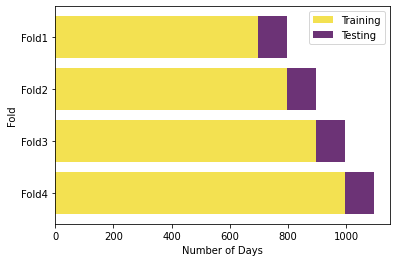

In [2]:
import matplotlib.pyplot as plt
Fold= ["Fold4","Fold3","Fold2","Fold1"]  
Training= [995,895,795,695]  
Testing= [100,100,100,100]

plt.barh(Fold,Training, color="#f3e151")  
# careful: notice "bottom" parameter became "left"
plt.barh(Fold,Testing, left=Training, color="#6c3376")

# we also need to switch the labels
plt.xlabel('Number of Days')  
plt.ylabel('Fold')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

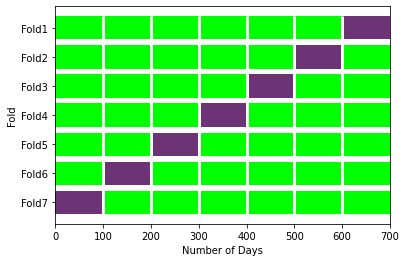

In [20]:
import matplotlib.pyplot as plt
Fold= ["Fold7","Fold6","Fold5","Fold4","Fold3","Fold2","Fold1"]  
Training2= [600,500,400,300,200,100,0]  
Testing= [100,100,100,100,100,100,100]
Training1=[0,100,200,300,400,500,600]

plt.barh(Fold,Training1, color='lime')  
# careful: notice "bottom" parameter became "left"
plt.barh(Fold,Testing, left=Training1, color="#6c3376")
plt.barh(Fold,Training2,left=[i+j for i,j in zip(Training1, Testing)], color='lime')
# we also need to switch the labels
plt.xlabel('Number of Days')  
plt.ylabel('Fold')
plt.vlines(100, -0.4, 6.4, color='white', linewidth=3)
plt.vlines(200, -0.4, 6.4, color='white', linewidth=3)
plt.vlines(300, -0.4, 6.4, color='white', linewidth=3)
plt.vlines(400, -0.4, 6.4, color='white', linewidth=3)
plt.vlines(500, -0.4, 6.4, color='white', linewidth=3)
plt.vlines(600, -0.4, 6.4, color='white', linewidth=3)
#plt.legend(['Training', 'Testing'], loc='upper right')
plt.savefig("Fold.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
def Cross_valid(data):
    fold1_train=data[0:695]
    fold1_test=data[695:795]
    fold2_train=data[0:795]
    fold2_test=data[795:895]
    fold3_train=data[0:895]
    fold3_test=data[895:995]
    fold4_train=data[0:995]
    fold4_test=data[995:1095]
    train=[fold1_train,fold2_train,fold3_train,fold4_train]
    test= [fold1_test,fold2_test,fold3_test,fold4_test]
    return train,test

In [ ]:
Cross_valid(y)[0][0]

In [ ]:
#  Cross Validation ARIMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(6, 0, 5))
model_fit = model.fit()
# make prediction
y_pred_list= [model_fit.predict(len(Cross_valid(y)[0][i]), len(Cross_valid(y)[0][i])+99) for i in range(4)]
y_test_list=Cross_valid(y)[1]
Smape_loss=[smape_loss(y_pred_list[i], y_test_list[i]) for i in range(4)]
Smape_loss

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(y, order=(2, 0, 2), seasonal_order=(0, 0, 0, 12))
model_fit = model.fit(disp=False)
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199)
fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred,y_test)

In [ ]:
forecaster = ExponentialSmoothing(trend="add", seasonal='add', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

The exponential smoothing of state space model can also be automated similar
 to the [ets](https://www.rdocumentation.org/packages/forecast/versions/8.13/topics/ets) function in R.

In [ ]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=False, sp=12, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

Another common model is the ARIMA model. In `sktime`, we interface [`pmdarima`](https://github.com/alkaline-ml/pmdarima), a package for automatically selecting the best ARIMA model. This since searches over a number of possible model parametrisations, it may take a bit longer.

In [ ]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

BATS and TBATS are two other time series forecasting algorithms that are contained in `sktime` by means of wrapping the package [`tbats`](https://github.com/intive-DataScience/tbats).

In [ ]:
from sktime.forecasting.bats import BATS

forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
y_train

### Detrending
Note that so far the reduction approach above does not take any seasonal or trend into account, but we can easily specify a pipeline which first detrends the data.

`sktime` provides a generic detrender, a transformer which uses any forecaster and returns the in-sample residuals of the forecaster's predicted values. For example, to remove the linear trend of a time series, we can write:

In [ ]:
# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions
# of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train))  # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_series(y_train, y_pred, yt, labels=["y_train", "fitted linear trend", "residuals"]);

## Prediction intervals
So far, we've only looked at point forecasts. In many cases, we're also interested in prediction intervals. `sktime`'s interface support prediction intervals, but we haven't implemented them for all algorithms yet.

Here, we use the Theta forecasting algorithm:

In [ ]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();
smape_loss(y_test, y_pred)

## Forecasting with fbprophet ##

In [ ]:
import pandas as pd
data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()
p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)



In [ ]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date'])
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].mean()
data['CO'].values

In [ ]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


In [ ]:
import math
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#CO=[math.log(CO[i]) for i in range(len(CO))]
#Generating timeseries data based on the two lists
data1= pd.Series(CO,Date)
#CO=pd.Series(CO)


In [ ]:
ts=200
z_train, z_test = temporal_train_test_split(data1, test_size=ts)
Date_train, Date_test = temporal_train_test_split(Date, test_size=ts)
date=Date_train
z=list(z_train)
len(Date_train)

In [ ]:
data2=[[ z[i],date[i]] for i in range(len(z))] 
data2= pd.DataFrame(data2, columns = ['y', 'ds'])

#data['ds']=pd.DatetimeIndex(data['date'])
data2.dtypes
data2['ds']=pd.to_datetime(data2.ds)

In [ ]:
train=data2[:895]
test=data2[895:]

## Useful resources
https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274

https://sailajakarra.medium.com/facebook-prophet-for-time-series-cf26be1be274#:~:text=Facebook%20Prophet%20uses%20an%20elegant,along%

## Model ##

In [ ]:
from fbprophet import Prophet
m=Prophet(growth='linear',interval_width=0.95,seasonality_mode='additive', yearly_seasonality=False,
          weekly_seasonality=False,daily_seasonality=True )
m.add_seasonality(name='monthly', period=30.5, fourier_order=30, prior_scale=10,mode='additive')
m.add_seasonality(name='weakly', period=7, fourier_order=40, prior_scale=15,mode='additive')
m.add_seasonality(name='daily', period=1, fourier_order=10, prior_scale=15,mode='additive')
m.add_seasonality(name='yearly', period=365.25, fourier_order=25, prior_scale=15,mode='additive')
m.add_seasonality(name='quarterly', period=365.25/4, fourier_order=22, prior_scale=15,mode='additive')
model=m.fit(train)

In [ ]:
future=m.make_future_dataframe(periods=200,freq='D')
forecast=m.predict(future)
pred=forecast['yhat'].to_list()
pred= pd.Series(pred,Date)
forecast.head()

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
plt.plot(data1,color='blue',linewidth=2)
#plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(pred,color='orange',linewidth=2)
plt.legend(['real','y_pred'], loc='upper right')
#plt.xlabel('Days from Jan 9th to Nov 9th')
#plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)

In [ ]:
z_pred=forecast.iloc[895:,:]
z_pred=z_pred['yhat'].to_list()
z_pred= pd.Series(z_pred,Date_test)


In [ ]:
fig= plt.figure(figsize=(20,8))
plt.plot(z_train,color='blue',linewidth=2)
plt.plot(z_test,color='orange',linewidth=2)
plt.plot(z_pred,color='green',linewidth=2)
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(z_pred, z_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig=m.plot_components(forecast)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import IntProgress

# Initial training period.
initial= 600
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 100
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 200
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon,parallel="processes")
# Performance Metrics of fb_cv
performance_metrics(fb_cv)

In [ ]:
fb_cv.head()

In [ ]:
plot_cross_validation_metric(fb_cv,'mape');

In [ ]:
# changing trend points
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# Python
#import itertools
#import numpy as np
#import pandas as pd
#cutoffs = pd.to_datetime(['2018-02-15', '2018-08-15', '2019-02-15'])
#param_grid = {  
    #'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    #'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#}

# Generate all combinations of parameters
#all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
#rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
#for params in all_params:
    #m = Prophet(**params,daily_seasonality=True).fit(train)  # Fit model with given params
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='200 days', parallel=None)
    #df_p = performance_metrics(df_cv, rolling_window=1)
    #rmses.append(df_p['rmse'].values[0])

# Find the best parameters
#tuning_results = pd.DataFrame(all_params)
#tuning_results['rmse'] = rmses
#print(tuning_results)

In [ ]:
#best_params = all_params[np.argmin(rmses)]
#print(best_params)

## Forecasting with LSTM ##

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=[(CO[i]-min(CO))/(max(CO)-min(CO)) for i in range(len(CO))]

len(data)

In [ ]:
data_train, data_test = temporal_train_test_split(data, test_size=200)

In [ ]:
#data=np.array(ts_data)
#scaler=MinMaxScaler(feature_range=(0,1))
#scaled_data=scaler.fit_transform(ts_data)

In [ ]:
def prepare_data(ts_data,n_steps):
    X,y=[],[]
    for i in range(len(ts_data)):
        end_ix=i+n_steps
        if end_ix>len(ts_data)-1:
            break
        seq_x,seq_y=ts_data[i:end_ix],ts_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)
    

In [ ]:
import math
CO_train, CO_test = temporal_train_test_split(CO, test_size=200)
ts_data=CO_train

n_steps=20

X,y=prepare_data(data_train,n_steps)


In [ ]:
#print(X),print(y)

In [ ]:
# Reshape from [samples,timesteps] to [samples,timesteps,features]
n_features=1
X=X.reshape(X.shape[0],X.shape[1],n_features)
y=y.reshape(X.shape[0],n_features)


# Building LSTM Model ####

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense, Dropout
model = Sequential()
# 50 neurons in first hidden layer
model.add(LSTM(units=200, input_shape=(X.shape[1], X.shape[2]), activation='tanh'))
model.add(Dense(units=100,activation='tanh'))
model.add(Dense(units=20,activation='tanh'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.01))

model.fit(X,y,epochs=100,verbose=1)

In [ ]:
import numpy as np
test_data=[data[i] for i in range(895,1095)]
X_test=[]
y_test=[CO[i] for i in range(905,1095)]
y_test=np.array(y_test)
for i in range(10, len(test_data)):
    X_test.append(test_data[i-10:i])
Y_test=np.array(y_test)
y_test.shape

In [ ]:
X_test=np.array(X_test)
X_test.shape

X_test=np.reshape(X_test,(190,10,1))
X_test.shape

In [ ]:
y_pred=model.predict(X_test)
#y_pred=y_pred.reshape(y_test.shape)

In [ ]:
y_pred=[y_pred[i]*(max(CO)-min(CO))+min(CO) for i in range(190)]


In [ ]:
Date_test=[i for i in range(190)]


In [ ]:
x1=[i for i in range(895)]
x2=[i for i in range(895,1085)]
fig= plt.figure(figsize=(20,8))
plt.plot(x1,CO_train, color='blue')
plt.plot(x2,y_pred,color='green')
plt.plot(x2,Y_test,color='orange')
plt.legend(['y_train','y_pred', 'y_test'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
plt.show()
y_pred=[sum(list(y_pred[i])) for i in range(190)]
y_test= pd.Series(y_test,Date_test)
y_pred= pd.Series(y_pred,Date_test)
smape_loss(y_pred, y_test)

### Forecasting with XGBoost ##

In [ ]:
data= pd.DataFrame(CO, columns = [ 'CO'])
data.head()

In [ ]:
data["target"]=data.CO.shift(-1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
def train_test_split(data,perc):
    data=data.values
    n=int(len(data)*(1-perc))
    return data[:n],data[n:]


In [ ]:
train, test = train_test_split(data,200/1093)
X=train[:,:-1]
y=train[:,-1]


In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor(objective="reg:squarederror",n_estimators=100)
model.fit(X,y)

In [ ]:
test[2]

In [ ]:
val=np.array(test[3,0]).reshape(1,-1)
pred=model.predict(val)
pred[0]

## Work forward validation ## 

In [ ]:
def xgb_predict(train,val):
    train=np.array(train)
    X,y=train[:,:-1],train[:,-1]
    model=XGBRegressor(objective="reg:squarederror",n_estimators=500)
    model.fit(X,y)
    val=np.array(val).reshape(1,-1)
    pred=model.predict(val)
    return pred[0]
    

In [ ]:
from sklearn.metrics import mean_squared_error
def validate(data,perc):
    predictions=[]
    train, test = train_test_split(data,perc)
    history=[x for x in train]
    for i in range(len(test)):
        test_X,test_y=test[i,:-1],test[i,-1]
        pred=xgb_predict(history,test_X[0])
        predictions.append(pred)
        history.append(test[i])
    error=mean_squared_error(test[:,-1],predictions,squared=False)
    return error, test[:,-1] ,predictions  
    

In [ ]:
%%time
rmse,y,pred=validate(data,200/1093)
print(rmse)

In [ ]:
ind=[i for i in range(201)]
y_pred= pd.Series(pred,ind)
y_test= pd.Series(y,ind)
fig= plt.figure(figsize=(20,8))
plt.plot(y_pred,color='darkgreen')
plt.plot(y_test,color='darkorange')
plt.legend(['y_pred','y_test'], loc='upper right')
plt.xlabel('Forecast horizon(days)',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Summary

As we have seen, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

* `sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

* `sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.


## Useful resources
* For more details, take a look at [our paper on forecasting with sktime](https://arxiv.org/abs/2005.08067) in which we discuss the forecasting API in more detail and use it to replicate and extend the M4 study.
* For a good introduction to forecasting, see [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018](https://otexts.com/fpp2/).
* For comparative benchmarking studies/forecasting competitions, see the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) and the currently running [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).

In [ ]:
import xlwt
from tempfile import TemporaryFile
book = xlwt.Workbook()
sheet1 = book.add_sheet('sheet1')

supersecretdata = CO

for i,e in enumerate(supersecretdata):
    sheet1.write(i,1,e)

name = "random.xls"
book.save(name)
book.save(TemporaryFile())

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import cufflinks as cf
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")

In [2]:
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()

p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)

data.shape

(210240, 2)

In [3]:
data1=data
data1['Date'] = pd.to_datetime(data1['Date'])
data1=data1.set_index('Date')

In [4]:
data1['Month']=data1.index.month
data1['Day_of_week']=data1.index.dayofweek
data1['Day']=data1.index.day
data1['Hour']=data1.index.hour
data1['Year']=data1.index.year
data1.head()
data5=data1
data5.tail()

CO  Month  Day_of_week  Day  Hour  Year
Date                                                                 
2019-12-31 19:00:00  1665.099976     12            1   31    19  2019
2019-12-31 20:00:00  2269.500000     12            1   31    20  2019
2019-12-31 21:00:00  2996.699951     12            1   31    21  2019
2019-12-31 22:00:00  2517.300049     12            1   31    22  2019
2019-12-31 23:00:00  1723.000000     12            1   31    23  2019

## Determining  Skewness and Curtosis of Data

In [5]:
from scipy.stats import skew,kurtosis
skew(data1['CO'].dropna())

3.7431626319885254

In [6]:
import numpy as np
kurtosis(data1['CO'].dropna())

25.936581574330027

In [7]:
L=np.random.normal(0,1,1000)

## Data Visualization ##

<AxesSubplot:xlabel='Date', ylabel='CO'>

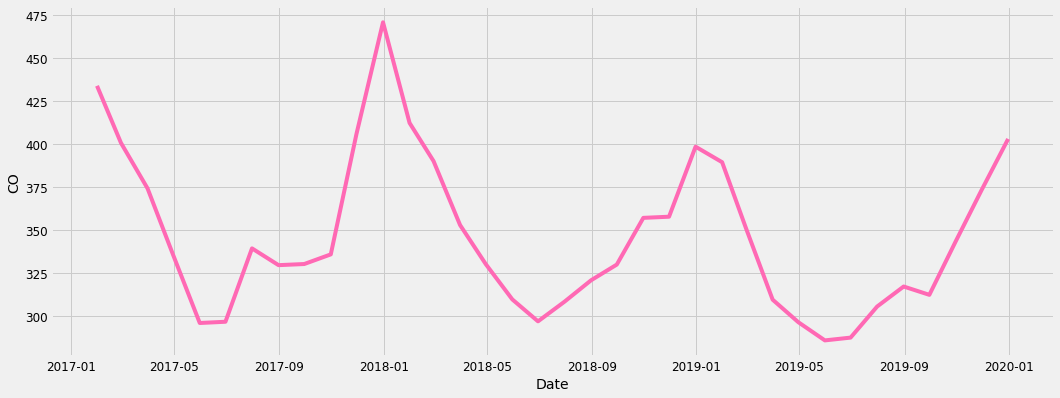

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
data_by_month=data1.resample('M').mean()
fig= plt.figure(figsize=(16,6))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_by_month.index,y='CO',data=data_by_month,color='hotpink')

<AxesSubplot:xlabel='Month', ylabel='CO'>

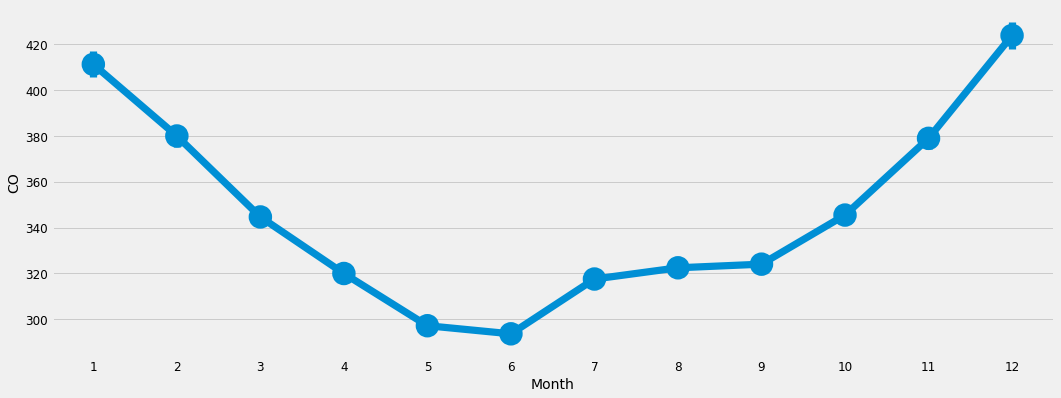

In [9]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Month',y='CO',colr='magenda')

<AxesSubplot:xlabel='Hour', ylabel='CO'>

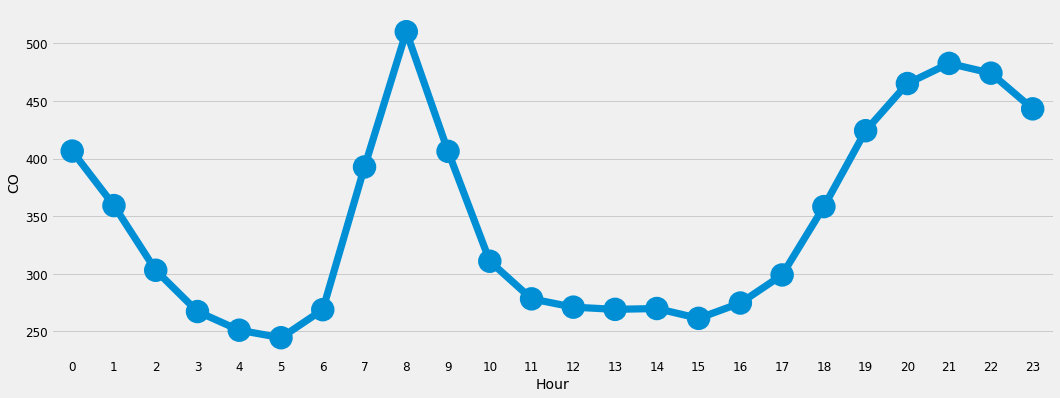

In [10]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Hour',y='CO')

As expected, the CO concentration is higher during morning hours and evening hours, attributed to high traffic during those hours.

<AxesSubplot:xlabel='Day_of_week', ylabel='CO'>

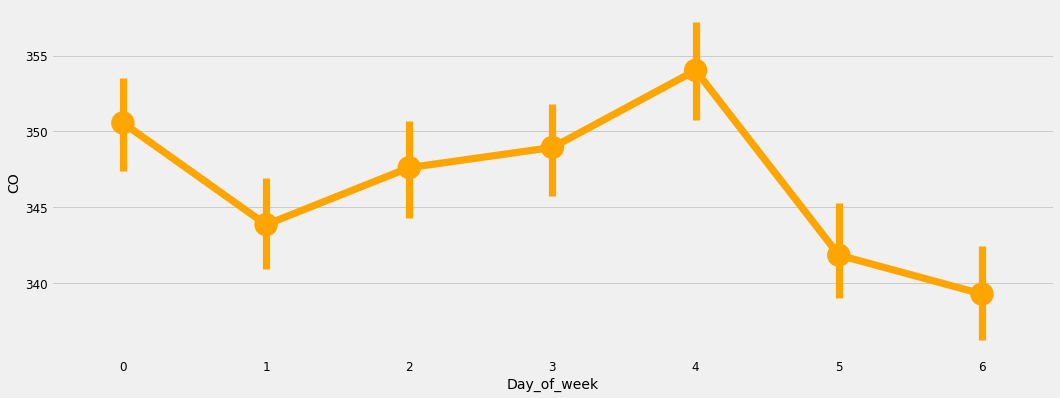

In [11]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Day_of_week',y='CO',color='orange')

<AxesSubplot:xlabel='CO', ylabel='Count'>

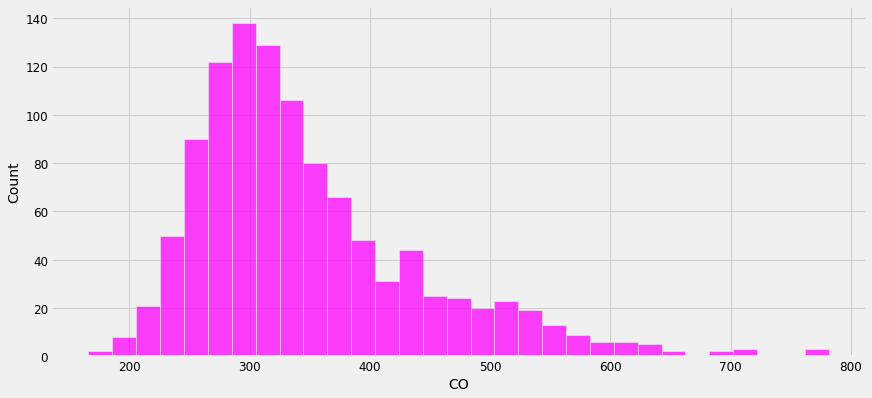

In [12]:
fig= plt.figure(figsize=(13,6))
data2=data1.resample('D').mean()
sns.histplot(data2, x="CO",color='fuchsia')

<Figure size 936x432 with 0 Axes>

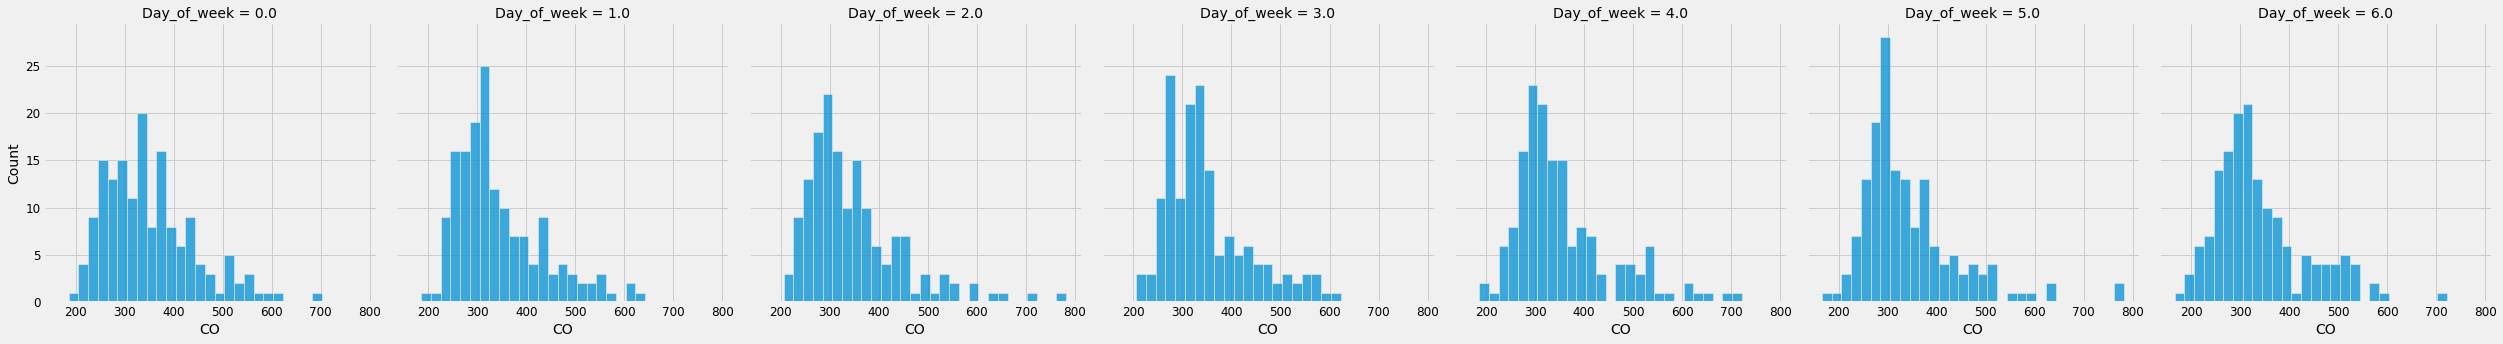

In [13]:
fig= plt.figure(figsize=(13,6))
sns.displot(data2, x="CO", col="Day_of_week",multiple="dodge")

<AxesSubplot:xlabel='Month', ylabel='CO'>

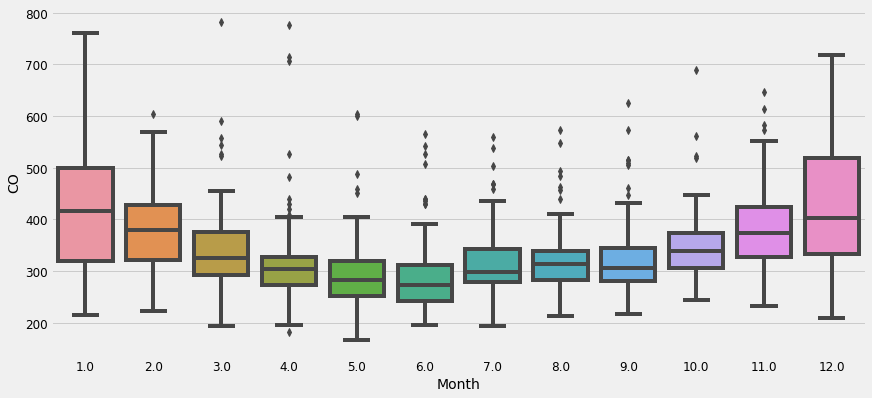

In [14]:
fig= plt.figure(figsize=(13,6))
sns.boxplot(data=data2, x='Month', y='CO')

## Time Series Lag Plot ##
A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

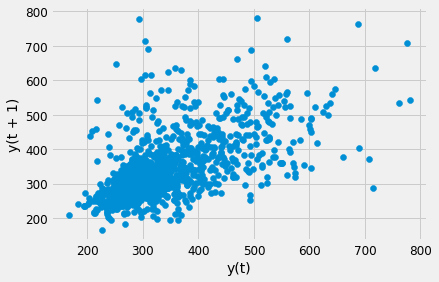

In [15]:
pd.plotting.lag_plot(data2['CO'])

In [16]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('H')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()

data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].mean()
data=data.fillna(column_means)
data.head()


CO        date
Date                              
2017-01-01  470.245972  2017-01-01
2017-01-02  512.894531  2017-01-02
2017-01-03  296.407288  2017-01-03
2017-01-04  302.471497  2017-01-04
2017-01-05  220.845215  2017-01-05

In [17]:
CO  =data['CO'].to_list()
date=data['date'].to_list()
CO=pd.Series(CO,date)
CO2017=list(CO['2017'])
CO2018=list(CO['2018'])
CO2019=list(CO['2019'])
a_dict = {'Date':CO.index[:365],
    "2017":CO2017,
                  "2018":CO2018,"2019":CO2019}
df = pd.DataFrame(a_dict)
df=df.set_index('Date')
df['Day_of_week']=df.index.dayofweek
df.head()

2017        2018        2019  Day_of_week
Date                                                       
2017-01-01  470.245972  375.883850  415.435516            6
2017-01-02  512.894531  550.797729  300.007111            0
2017-01-03  296.407288  358.899994  319.485382            1
2017-01-04  302.471497  318.951843  316.105865            2
2017-01-05  220.845215  333.370667  265.206879            3

<Figure size 1120x480 with 0 Axes>

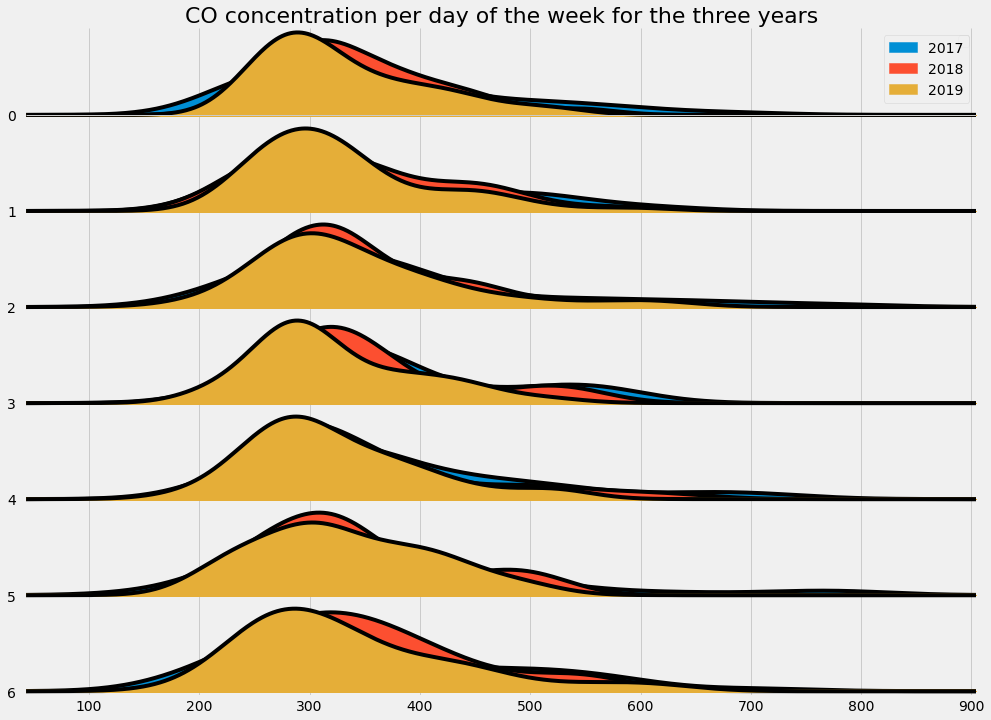

In [18]:
import joypy
# Draw Plot
plt.figure(figsize=(14,6), dpi= 80)
fig, axes = joypy.joyplot(df, column=['2017', '2018', '2019'], by="Day_of_week", ylim='own',overlap=0, figsize=(14,10),grid=True, legend=True)

# Decoration
plt.title('CO concentration per day of the week for the three years', fontsize=22)
plt.legend(['2017', '2018', '2019'])
plt.show()

In [19]:
monthly_totals = df.groupby(df.index.month).mean()
monthly_totals.reset_index(inplace=True)


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

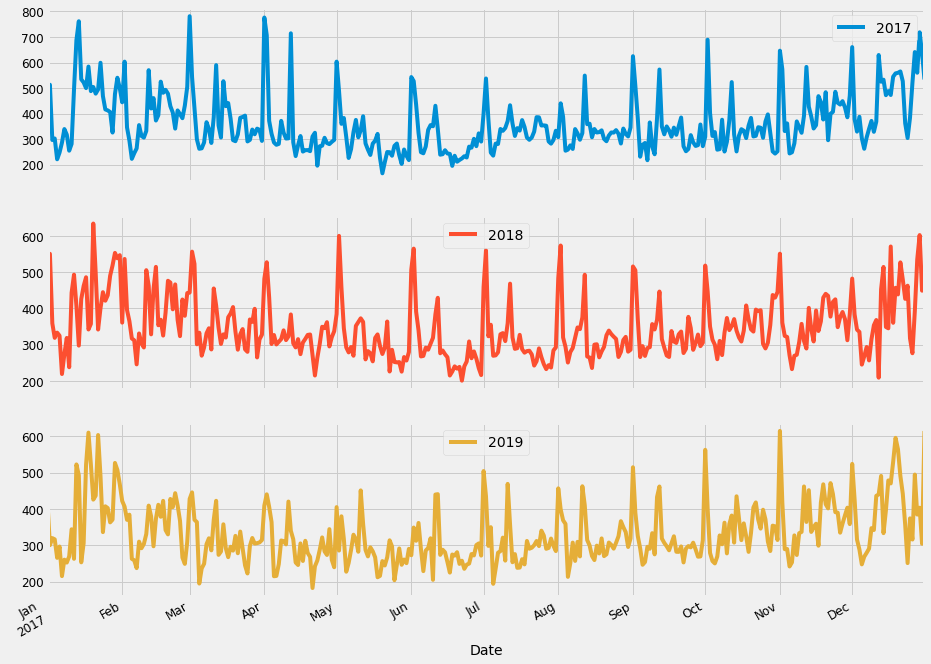

In [20]:
df.drop(['Day_of_week'], axis=1).plot(subplots=True, figsize=(14,12))

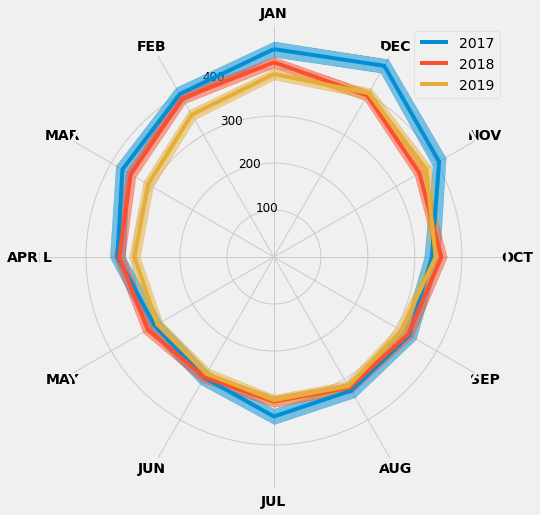

In [21]:
def plot_polar(df, error_alpha=0.5):
    """Plot DataFrame of day-of-week data as a polar plot with shaded regions
    representing S.E.M.
    
    DataFrame should be indexed 0-6 with 0=Monday, 6=Sunday
    """
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=12, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_xticklabels(['JAN', 'FEB', 'MAR', 'APRIL', 'MAY', 'JUN', 'JUL','AUG','SEP','OCT',
                        'NOV','DEC'], size=14, weight='bold')

    df.plot(ax=ax, lw=4)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend( fontsize=14)


plot_polar(monthly_totals.drop(['Date','Day_of_week'], axis=1))

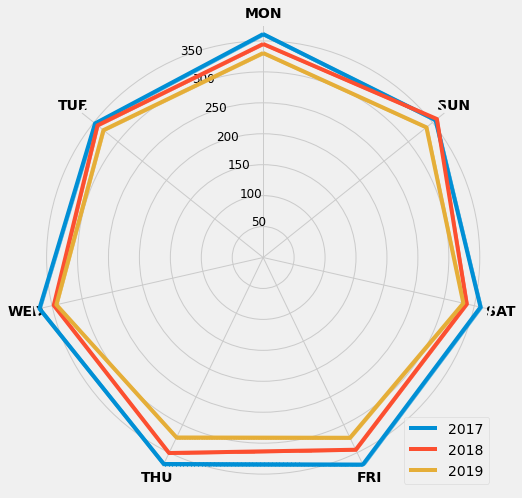

In [22]:
weekly_totals = df.groupby(df.index.dayofweek).mean()
def plot_polar(df, error_alpha=0.5):
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=7, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_xticklabels(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], size=14, weight='bold')

    df.plot(ax=ax, lw=4)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend(loc=4, fontsize=14)


plot_polar(weekly_totals.drop(['Day_of_week'], axis=1))

In [24]:
#cf.go_offline()
weekly_means = df.groupby(df.index.dayofweek).mean()

weekly_means.iplot(kind = 'bar', x = 'Day_of_week', y ='2017')

AttributeError: 'DataFrame' object has no attribute 'iplot'

In [ ]:
from plotly.offline import iplot
cf.go_offline()
theme=['polar','pearl','ggplot']
year=['2017','2018','2019']
for i in range(3):
    cf.set_config_file(theme=theme[i])
    figsize=(2, 1)
    weekly_means.iplot(kind = 'bar', x = 'Day_of_week', y =year[i], title=year[i])

 ## Checking stationarity of data
 
 To check the stationarity of the TS, we perform two tests.
  1. Rolling statistics (rolling mean and rolling std)
  2. Dickey Fuller(ADCF) test. 
  
  
  ##### Rolling statistics

In [ ]:
rolmean=data.rolling(window=7).mean()
rolstd=data.rolling(window=7).std()
data1

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data.iloc[:,0]
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.plot(rolmean,color='green',linewidth=2)
plt.plot(rolstd,color='red',linewidth=2)
plt.legend(['original data', 'rolling mean','rolling std'], loc='best')
#plt.scatter(y.index,CO, color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

From the graph, the rolling mean and the rolling standard deviation does not depict an upward trend hence stationary. 


#### Dickey Fuller Test

In [ ]:
#Hypothesis
#H_0 : It is not stationary
#H_1 : It is stationary
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results:')
dftest=adfuller(data['CO'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test statistic','p-value','#lags Used','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

From the results, the p-value<0.05, we reject the null hyphothesis and conclude that the data is stationary. 


In [ ]:
data.head()

In [ ]:
import math
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#CO=[math.log(CO[i]) for i in range(len(CO))]
#Generating timeseries data based on the two lists
data1= pd.Series(CO,Date)
CO=pd.Series(CO)

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data1
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.scatter(y.index,CO, color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

## Decomposing my time series into components

In [ ]:
from sktime.utils.plotting import plot_series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data1, model='additive')
plot_series(result.trend)
plot_series(result.seasonal)
plot_series(result.resid)



In [ ]:
#Seasonality for 2017 January, we might suspect a weekly seasonality.
plot_series(result.seasonal['2018-07'])
plot_series(result.seasonal['2017-07'])

In [ ]:
resample = result.seasonal.resample('M')
monthly_mean = resample.mean()
plot_series(monthly_mean)

Data is split such that the first 895days is used for training the model and the last 200days for testing the model.


In [ ]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
ts=200
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.legend(['y_train', 'y_test'], loc='upper right')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

In [ ]:
##Relative forecasting horizon¶
fh = np.arange(len(y_test)) + 1
#fh

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

# Generating forecasts

Like in scikit-learn, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

`sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

### Naïve baselines
Let's start with two naïve forecasting strategies which can serve as references for comparison of more sophisticated approaches.

#### ( a) Predicting the last value

We use the SMAPE (symmetric mean absolute percentage error) to quantify the accuracy of our forecasts. A lower sMAPE means higher accuracy.

In [ ]:
# using sktime
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)


#### (b) Predicting the last value of the same season

In [ ]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)


## Forecasting with sktime

### Reduction: from forecasting to regression

`sktime` provides a meta-estimator for this approach, which is:

* **modular** and **compatible with scikit-learn**, so that we can easily apply any scikit-learn regressor to solve our forecasting problem,
* **tuneable**, allowing us to tune hyper-parameters like the window length or strategy to generate forecasts
* **adaptive**, in the sense that it adapts the scikit-learn's estimator interface to that of a forecaster, making sure that we can tune and properly evaluate our model

## K Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(
    regressor=regressor, window_length=12, strategy="recursive"
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = [KNeighborsRegressor(n_neighbors=k) for k in range(1,101)]
forecaster = [ReducedRegressionForecaster(
    regressor=regressor[i], window_length=12, strategy="recursive"
) for i in range(len(regressor))]
model=[forecaster[i].fit(y_train) for i in range(len(regressor))]
y_pred =[ model[i].predict(fh) for i in range(len(regressor))]
loss=[smape_loss(y_pred[i], y_test) for i in range(len(regressor))]


# Exploring different values of k #

In [ ]:
index=[k for k in range(1,101)]

plt.plot(index,loss)

### Statistical forecasters

`sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.

Note that since this is monthly data, the seasonal periodicity (sp), or the number of periods per year, is 12.

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
model = ARIMA(y, order=(2, 1, 2))
model_fit = model.fit()
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199, typ='levels')
fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)
#model_fit.summary()

In [ ]:
model_fit.summary(1)

##  Calculating number of lags, p and q of ARIMA(p,d,q) using ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig= plt.figure(figsize=(20,8))
plot_acf(y)

From the ACF plot, the value of q is 5

In [ ]:
plot_pacf(y)

From the PACF, the value of p is 3

In [ ]:
# Determining the value of d
from pmdarima.arima.utils import ndiffs
ndiffs(y,test="adf")

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return( {'mape':mape, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(3, 0, 5))
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(y_train), len(y_train)+199)

fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
forecast_accuracy(y_pred, y_test)

In [ ]:
model_fit.plot_diagnostics(figsize=(14,6))
plt.show()


More details can be found in here.
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

## Grid Search 

In [ ]:
# ARIMA example
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from random import random
import itertools
import math
p=range(0,7)
d=range(0,1)
q=range(0,7)
L_model_order=[]
L_loss1=[]
L_loss2=[]
AIC=[]
pdq_comb=list(itertools.product(p,d,q))
for pdq in pdq_comb:
    model = [ARIMA(y, order=pdq ) ]
    model_fit = [model[i].fit() for i in range(len(model))]
    #make prediction
    y_pred = [model_fit[i].predict(len(y_train), len(y_train)+199, typ='levels') for i in range(len(model)) ] 
    loss1=[smape_loss(y_pred[i], y_test)for i in range(len(model)) ]
    loss2=[math.sqrt(mean_squared_error(list(y_pred[i]), list(y_test))) for i in range(len(model))]
    for i in range(len(model)):
        L_model_order.append(model[i].order)
        L_loss1.append(loss1[i])
        L_loss2.append(loss2[i])
        AIC.append(model_fit[i].aic)
        print(model[i].order,model_fit[i].aic,loss1[i],loss2[i])
        
for i in range(len(L_loss1)):
    if (L_loss1[i]==min(L_loss1)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        Model_loss=['\x1b[6;30;43m'+'SMAPE:' + A + B+  '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]

for i in range(len(L_loss1)):
    if (L_loss2[i]==min(L_loss2)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        Model_loss=['\x1b[6;30;46m'+'MSE:' + A +  C+ '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]
        
for i in range(len(L_loss1)):
    if (AIC[i]==min(AIC)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        D=str(AIC[i])
        Model_loss=['\x1b[6;30;42m'+'AIC:' + A + D+ '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]
     
        

In [ ]:
import pmdarima as pm
model=pm.auto_arima(y,m=12,seasonal=False,start_p=0,d=0,start_q=0,max_p=6,max_d=1,max_q=6, start_P=0,D=0,start_Q=0,max_P=3,max_D=3,max_Q=3,max_order=50,error_action='ignore',scoring='mae',suppress_warnings=True,stepwise=False,trace=True
                )

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(6, 0, 5))
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(y_train), len(y_train)+199)

fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Rolling  Cross-Validation for Time Series ##


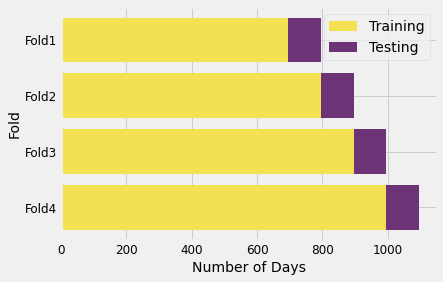

In [25]:
import matplotlib.pyplot as plt
Fold= ["Fold4","Fold3","Fold2","Fold1"]  
Training= [995,895,795,695]  
Testing= [100,100,100,100]

plt.barh(Fold,Training, color="#f3e151")  
# careful: notice "bottom" parameter became "left"
plt.barh(Fold,Testing, left=Training, color="#6c3376")

# we also need to switch the labels
plt.xlabel('Number of Days')  
plt.ylabel('Fold')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

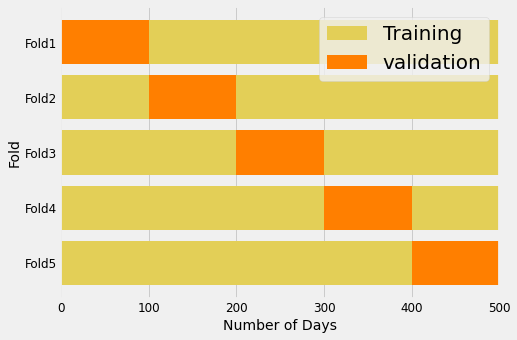

In [26]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
Fold= ["Fold5","Fold4","Fold3","Fold2","Fold1"]  
Training1= [400,300,200,100,0]  
Testing= [100,100,100,100,100]
Training2=[0,100,200,300,400,]

plt.barh(Fold,Training1, color='#E3CF57')  
# careful: notice "bottom" parameter became "left"
plt.barh(Fold,Testing, left=Training1, color="#FF7F00")
plt.barh(Fold,Training2,left=[i+j for i,j in zip(Training1, Testing)], color='#E3CF57')
# we also need to switch the labels
plt.xlabel('Number of Days')  
plt.ylabel('Fold')
plt.legend(['Training', 'validation'], loc='upper right',fontsize=20)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("cv.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [27]:
def Cross_valid(data):
    fold1_train=data[0:695]
    fold1_test=data[695:795]
    fold2_train=data[0:795]
    fold2_test=data[795:895]
    fold3_train=data[0:895]
    fold3_test=data[895:995]
    fold4_train=data[0:995]
    fold4_test=data[995:1095]
    train=[fold1_train,fold2_train,fold3_train,fold4_train]
    test= [fold1_test,fold2_test,fold3_test,fold4_test]
    return train,test

In [28]:
Cross_valid(y)[0][0]

NameError: name 'y' is not defined

In [29]:
#  Cross Validation ARIMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(6, 0, 5))
model_fit = model.fit()
# make prediction
y_pred_list= [model_fit.predict(len(Cross_valid(y)[0][i]), len(Cross_valid(y)[0][i])+99) for i in range(4)]
y_test_list=Cross_valid(y)[1]
Smape_loss=[smape_loss(y_pred_list[i], y_test_list[i]) for i in range(4)]
Smape_loss

NameError: name 'y' is not defined

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(y, order=(2, 0, 2), seasonal_order=(0, 0, 0, 12))
model_fit = model.fit(disp=False)
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199)
fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred,y_test)

NameError: name 'y' is not defined

In [31]:
forecaster = ExponentialSmoothing(trend="add", seasonal='add', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

NameError: name 'ExponentialSmoothing' is not defined

The exponential smoothing of state space model can also be automated similar
 to the [ets](https://www.rdocumentation.org/packages/forecast/versions/8.13/topics/ets) function in R.

In [ ]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=False, sp=12, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

Another common model is the ARIMA model. In `sktime`, we interface [`pmdarima`](https://github.com/alkaline-ml/pmdarima), a package for automatically selecting the best ARIMA model. This since searches over a number of possible model parametrisations, it may take a bit longer.

In [ ]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

BATS and TBATS are two other time series forecasting algorithms that are contained in `sktime` by means of wrapping the package [`tbats`](https://github.com/intive-DataScience/tbats).

In [ ]:
from sktime.forecasting.bats import BATS

forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
y_train

### Detrending
Note that so far the reduction approach above does not take any seasonal or trend into account, but we can easily specify a pipeline which first detrends the data.

`sktime` provides a generic detrender, a transformer which uses any forecaster and returns the in-sample residuals of the forecaster's predicted values. For example, to remove the linear trend of a time series, we can write:

In [ ]:
# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions
# of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train))  # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_series(y_train, y_pred, yt, labels=["y_train", "fitted linear trend", "residuals"]);

## Prediction intervals
So far, we've only looked at point forecasts. In many cases, we're also interested in prediction intervals. `sktime`'s interface support prediction intervals, but we haven't implemented them for all algorithms yet.

Here, we use the Theta forecasting algorithm:

In [ ]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();
smape_loss(y_test, y_pred)

## Forecasting with fbprophet ##

In [ ]:
import pandas as pd
data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()
p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)



In [ ]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date'])
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].mean()
data['CO'].values

In [ ]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


In [ ]:
import math
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#CO=[math.log(CO[i]) for i in range(len(CO))]
#Generating timeseries data based on the two lists
data1= pd.Series(CO,Date)
#CO=pd.Series(CO)


In [ ]:
ts=200
z_train, z_test = temporal_train_test_split(data1, test_size=ts)
Date_train, Date_test = temporal_train_test_split(Date, test_size=ts)
date=Date_train
z=list(z_train)
len(Date_train)

In [ ]:
data2=[[ z[i],date[i]] for i in range(len(z))] 
data2= pd.DataFrame(data2, columns = ['y', 'ds'])

#data['ds']=pd.DatetimeIndex(data['date'])
data2.dtypes
data2['ds']=pd.to_datetime(data2.ds)

In [ ]:
train=data2[:895]
test=data2[895:]

## Useful resources
https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274

https://sailajakarra.medium.com/facebook-prophet-for-time-series-cf26be1be274#:~:text=Facebook%20Prophet%20uses%20an%20elegant,along%

## Model ##

In [ ]:
from fbprophet import Prophet
m=Prophet(growth='linear',interval_width=0.95,seasonality_mode='additive', yearly_seasonality=False,
          weekly_seasonality=False,daily_seasonality=True )
m.add_seasonality(name='monthly', period=30.5, fourier_order=30, prior_scale=10,mode='additive')
m.add_seasonality(name='weakly', period=7, fourier_order=40, prior_scale=15,mode='additive')
m.add_seasonality(name='daily', period=1, fourier_order=10, prior_scale=15,mode='additive')
m.add_seasonality(name='yearly', period=365.25, fourier_order=25, prior_scale=15,mode='additive')
m.add_seasonality(name='quarterly', period=365.25/4, fourier_order=22, prior_scale=15,mode='additive')
model=m.fit(train)

In [ ]:
future=m.make_future_dataframe(periods=200,freq='D')
forecast=m.predict(future)
pred=forecast['yhat'].to_list()
pred= pd.Series(pred,Date)
forecast.head()

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
plt.plot(data1,color='blue',linewidth=2)
#plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(pred,color='orange',linewidth=2)
plt.legend(['real','y_pred'], loc='upper right')
#plt.xlabel('Days from Jan 9th to Nov 9th')
#plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)

In [ ]:
z_pred=forecast.iloc[895:,:]
z_pred=z_pred['yhat'].to_list()
z_pred= pd.Series(z_pred,Date_test)


In [ ]:
fig= plt.figure(figsize=(20,8))
plt.plot(z_train,color='blue',linewidth=2)
plt.plot(z_test,color='orange',linewidth=2)
plt.plot(z_pred,color='green',linewidth=2)
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(z_pred, z_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig=m.plot_components(forecast)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import IntProgress

# Initial training period.
initial= 600
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 100
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 200
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon,parallel="processes")
# Performance Metrics of fb_cv
performance_metrics(fb_cv)

In [ ]:
fb_cv.head()

In [ ]:
plot_cross_validation_metric(fb_cv,'mape');

In [ ]:
# changing trend points
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# Python
#import itertools
#import numpy as np
#import pandas as pd
#cutoffs = pd.to_datetime(['2018-02-15', '2018-08-15', '2019-02-15'])
#param_grid = {  
    #'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    #'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#}

# Generate all combinations of parameters
#all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
#rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
#for params in all_params:
    #m = Prophet(**params,daily_seasonality=True).fit(train)  # Fit model with given params
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='200 days', parallel=None)
    #df_p = performance_metrics(df_cv, rolling_window=1)
    #rmses.append(df_p['rmse'].values[0])

# Find the best parameters
#tuning_results = pd.DataFrame(all_params)
#tuning_results['rmse'] = rmses
#print(tuning_results)

In [ ]:
#best_params = all_params[np.argmin(rmses)]
#print(best_params)

## Forecasting with LSTM ##

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=[(CO[i]-min(CO))/(max(CO)-min(CO)) for i in range(len(CO))]

len(data)

In [ ]:
data_train, data_test = temporal_train_test_split(data, test_size=200)

In [ ]:
#data=np.array(ts_data)
#scaler=MinMaxScaler(feature_range=(0,1))
#scaled_data=scaler.fit_transform(ts_data)

In [ ]:
def prepare_data(ts_data,n_steps):
    X,y=[],[]
    for i in range(len(ts_data)):
        end_ix=i+n_steps
        if end_ix>len(ts_data)-1:
            break
        seq_x,seq_y=ts_data[i:end_ix],ts_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)
    

In [ ]:
import math
CO_train, CO_test = temporal_train_test_split(CO, test_size=200)
ts_data=CO_train

n_steps=20

X,y=prepare_data(data_train,n_steps)


In [ ]:
#print(X),print(y)

In [ ]:
# Reshape from [samples,timesteps] to [samples,timesteps,features]
n_features=1
X=X.reshape(X.shape[0],X.shape[1],n_features)
y=y.reshape(X.shape[0],n_features)


# Building LSTM Model ####

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense, Dropout
model = Sequential()
# 50 neurons in first hidden layer
model.add(LSTM(units=200, input_shape=(X.shape[1], X.shape[2]), activation='tanh'))
model.add(Dense(units=100,activation='tanh'))
model.add(Dense(units=20,activation='tanh'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.01))

model.fit(X,y,epochs=100,verbose=1)

In [ ]:
import numpy as np
test_data=[data[i] for i in range(895,1095)]
X_test=[]
y_test=[CO[i] for i in range(905,1095)]
y_test=np.array(y_test)
for i in range(10, len(test_data)):
    X_test.append(test_data[i-10:i])
Y_test=np.array(y_test)
y_test.shape

In [ ]:
X_test=np.array(X_test)
X_test.shape

X_test=np.reshape(X_test,(190,10,1))
X_test.shape

In [ ]:
y_pred=model.predict(X_test)
#y_pred=y_pred.reshape(y_test.shape)

In [ ]:
y_pred=[y_pred[i]*(max(CO)-min(CO))+min(CO) for i in range(190)]


In [ ]:
Date_test=[i for i in range(190)]


In [ ]:
x1=[i for i in range(895)]
x2=[i for i in range(895,1085)]
fig= plt.figure(figsize=(20,8))
plt.plot(x1,CO_train, color='blue')
plt.plot(x2,y_pred,color='green')
plt.plot(x2,Y_test,color='orange')
plt.legend(['y_train','y_pred', 'y_test'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
plt.show()
y_pred=[sum(list(y_pred[i])) for i in range(190)]
y_test= pd.Series(y_test,Date_test)
y_pred= pd.Series(y_pred,Date_test)
smape_loss(y_pred, y_test)

### Forecasting with XGBoost ##

In [ ]:
data= pd.DataFrame(CO, columns = [ 'CO'])
data.head()

In [ ]:
data["target"]=data.CO.shift(-1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
def train_test_split(data,perc):
    data=data.values
    n=int(len(data)*(1-perc))
    return data[:n],data[n:]


In [ ]:
train, test = train_test_split(data,200/1093)
X=train[:,:-1]
y=train[:,-1]


In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor(objective="reg:squarederror",n_estimators=100)
model.fit(X,y)

In [ ]:
test[2]

In [ ]:
val=np.array(test[3,0]).reshape(1,-1)
pred=model.predict(val)
pred[0]

## Work forward validation ## 

In [ ]:
def xgb_predict(train,val):
    train=np.array(train)
    X,y=train[:,:-1],train[:,-1]
    model=XGBRegressor(objective="reg:squarederror",n_estimators=500)
    model.fit(X,y)
    val=np.array(val).reshape(1,-1)
    pred=model.predict(val)
    return pred[0]
    

In [ ]:
from sklearn.metrics import mean_squared_error
def validate(data,perc):
    predictions=[]
    train, test = train_test_split(data,perc)
    history=[x for x in train]
    for i in range(len(test)):
        test_X,test_y=test[i,:-1],test[i,-1]
        pred=xgb_predict(history,test_X[0])
        predictions.append(pred)
        history.append(test[i])
    error=mean_squared_error(test[:,-1],predictions,squared=False)
    return error, test[:,-1] ,predictions  
    

In [ ]:
%%time
rmse,y,pred=validate(data,200/1093)
print(rmse)

In [ ]:
ind=[i for i in range(201)]
y_pred= pd.Series(pred,ind)
y_test= pd.Series(y,ind)
fig= plt.figure(figsize=(20,8))
plt.plot(y_pred,color='darkgreen')
plt.plot(y_test,color='darkorange')
plt.legend(['y_pred','y_test'], loc='upper right')
plt.xlabel('Forecast horizon(days)',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Summary

As we have seen, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

* `sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

* `sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.


## Useful resources
* For more details, take a look at [our paper on forecasting with sktime](https://arxiv.org/abs/2005.08067) in which we discuss the forecasting API in more detail and use it to replicate and extend the M4 study.
* For a good introduction to forecasting, see [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018](https://otexts.com/fpp2/).
* For comparative benchmarking studies/forecasting competitions, see the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) and the currently running [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).

In [ ]:
import xlwt
from tempfile import TemporaryFile
book = xlwt.Workbook()
sheet1 = book.add_sheet('sheet1')

supersecretdata = CO

for i,e in enumerate(supersecretdata):
    sheet1.write(i,1,e)

name = "random.xls"
book.save(name)
book.save(TemporaryFile())

##  Deep Learning: Classifying Irish Data.
First we need to convert the species column in binary form. Next we retrieve the data as a list and convert back as an array

In [70]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]
Iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [71]:
#Reshuffling the data
Iris= shuffle(Iris)
Iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
36             5.5           3.5            1.3           0.2      Iris-setosa
111            6.4           2.7            5.3           1.9   Iris-virginica
101            5.8           2.7            5.1           1.9   Iris-virginica
105            7.6           3.0            6.6           2.1   Iris-virginica
83             6.0           2.7            5.1           1.6  Iris-versicolor

In [72]:
Iris_list=Iris.values.tolist()
for i in range(len(Iris_list)):
    if(Iris_list[i][4]=='Iris-versicolor'):
        Iris_list[i][4]=0
    elif (Iris_list[i][4]=='Iris-setosa'):
         Iris_list[i][4]=1
    else:
         Iris_list[i][4]=2
        
data=pd.DataFrame(Iris_list)
X=data.iloc[:,[0,1,2,3]]
y=data.iloc[:,[4]]


In [105]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=4, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=model.fit(X_train, y_train,validation_split=0.1, epochs=100, batch_size=10)

Epoch 1/100
10/10 [==============================] - 1s 51ms/step - loss: 1.2256 - accuracy: 0.3982 - val_loss: 1.0710 - val_accuracy: 0.1818
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9305 - accuracy: 0.4052 - val_loss: 0.7877 - val_accuracy: 0.7273
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7458 - accuracy: 0.7323 - val_loss: 0.6141 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6260 - accuracy: 0.7585 - val_loss: 0.5068 - val_accuracy: 0.7273
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7765 - val_loss: 0.4189 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4753 - accuracy: 0.9169 - val_loss: 0.3648 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4259 - accuracy: 0.9650 - val_loss: 0.3302 - val_accuracy: 1.0000
Epoch 8/10

Epoch 59/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0623 - accuracy: 0.9844 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0580 - accuracy: 0.9704 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0850 - accuracy: 0.9517 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0507 - accuracy: 0.9683 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 63/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0438 - accuracy: 0.9849 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 64/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0510 - accuracy: 0.9774 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 65/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0483 - accuracy: 0.9836 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 

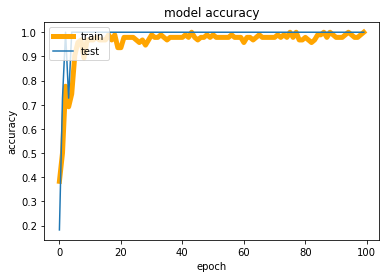

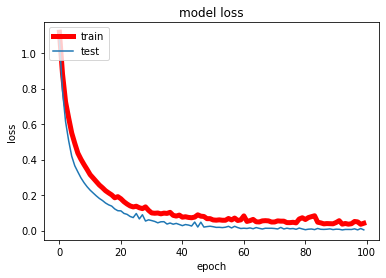

In [107]:
import matplotlib.pyplot as plt
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## IMAGE CLASSIFICATION: MNIST DATASET 

In [76]:
#install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [77]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [78]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
X_train=X_train/255
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


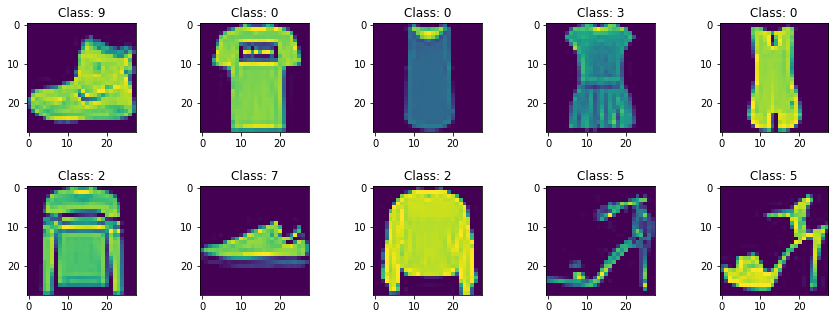

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [114]:
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(100,input_dim = X_train.shape[1], activation='relu'))
classifier_e25.add(Dense(80, activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_54 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                810       
Total params: 9,390
Trainable params: 9,390
Non-trainable params: 0
_________________________________________________________________


In [115]:
model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 2.1305 - accuracy: 0.2590 - val_loss: 1.5906 - val_accuracy: 0.7143
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 1.5224 - accuracy: 0.6153 - val_loss: 1.2081 - val_accuracy: 0.7143
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 1.1462 - accuracy: 0.6163 - val_loss: 0.9876 - val_accuracy: 0.7143
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9865 - accuracy: 0.6457 - val_loss: 0.8346 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.8005 - accuracy: 0.8152 - val_loss: 0.7009 - val_accuracy: 0.7429
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7344 - accuracy: 0.6870 - val_loss: 0.6240 - val_accuracy: 0.9714
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6284 - accuracy: 0.8702 - val_loss: 0.5602 - val_accuracy: 1.0000
Epoch 8/100
7/7 [=====

7/7 [==============================] - 0s 9ms/step - loss: 0.0792 - accuracy: 0.9789 - val_loss: 0.0807 - val_accuracy: 1.0000
Epoch 60/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0924 - accuracy: 0.9504 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 61/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0625 - accuracy: 0.9964 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 62/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0674 - accuracy: 0.9831 - val_loss: 0.0806 - val_accuracy: 1.0000
Epoch 63/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0809 - accuracy: 0.9887 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 64/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.9943 - val_loss: 0.1128 - val_accuracy: 0.9143
Epoch 65/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0944 - accuracy: 0.9789 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 66/100
7/7 [===========

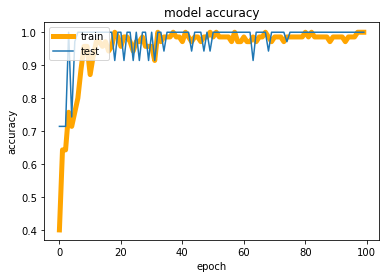

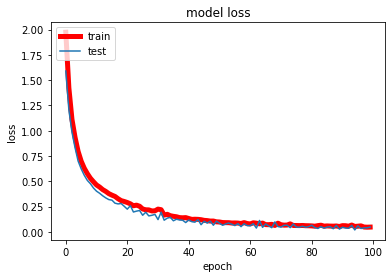

In [116]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CHARACTER CLASSIFICATION:  MNIST DATASET ##

In [84]:
#read mnist fashion dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_train

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

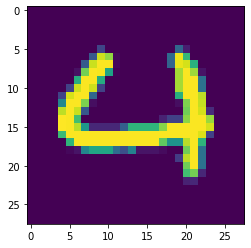

In [85]:
plt.imshow(X_train[60])
  

In [86]:
X_train=X_train/X_train.max()
X_test=X_test/X_train.max()

In [87]:
# Set random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test)) # see ho

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4253 - accuracy: 0.8758 - val_loss: 20.6599 - val_accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1109 - accuracy: 0.9661 - val_loss: 19.6268 - val_accuracy: 0.9615
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9751 - val_loss: 12.0422 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 15.5001 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 15.1063 - val_accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 17.6403 - val_accuracy: 0.9740
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9906 - val_loss: 18.0195 - val_ac

In [88]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.
#metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/
#09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [90]:
y_probs = model.predict(X_test) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [91]:
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [92]:
less=[(y_preds[i],y_test[i]) for i in range(9)]
less

[(7, 7), (2, 2), (1, 1), (0, 0), (4, 4), (1, 1), (4, 4), (9, 9), (5, 5)]

In [93]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, 
                 y_pred=y_preds)

array([[ 967,    1,    0,    0,    1,    0,    7,    0,    2,    2],
       [   0, 1129,    0,    0,    0,    1,    2,    0,    3,    0],
       [   5,    3, 1002,    8,    3,    0,    2,    4,    5,    0],
       [   0,    1,    1,  992,    1,    3,    0,    3,    1,    8],
       [   0,    0,    5,    0,  964,    0,    2,    1,    0,   10],
       [   3,    0,    0,   10,    2,  860,   10,    0,    3,    4],
       [   0,    2,    2,    0,    5,    1,  945,    0,    3,    0],
       [   1,   15,   10,    2,    4,    0,    0,  987,    0,    9],
       [   6,    0,    2,    8,    8,    1,    4,    5,  932,    8],
       [   1,    5,    0,    4,   10,    4,    0,    2,    0,  983]])

In [94]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

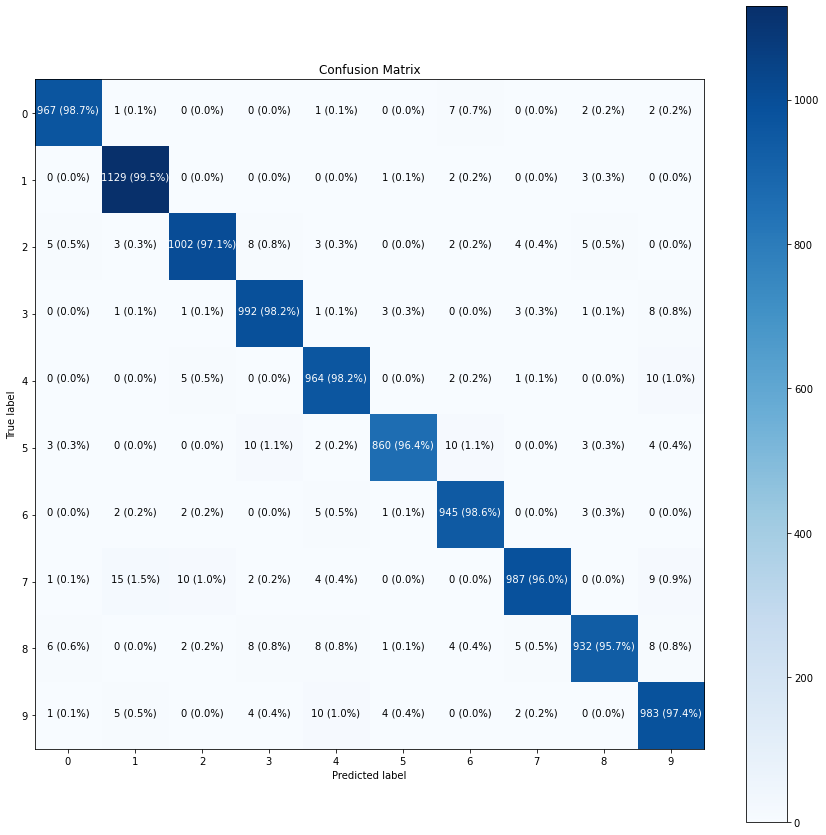

In [95]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [96]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  #plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                #100*np.max(predictions_array),
                                #class_names[true_label]),
                                #color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = predictions_array
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('lime')

Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

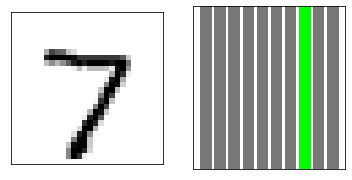

In [97]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_preds[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_preds[i],  y_test)
plt.show()

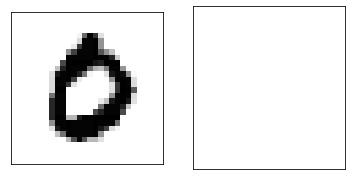

In [98]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_preds[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_preds[i],  y_test)
plt.show()

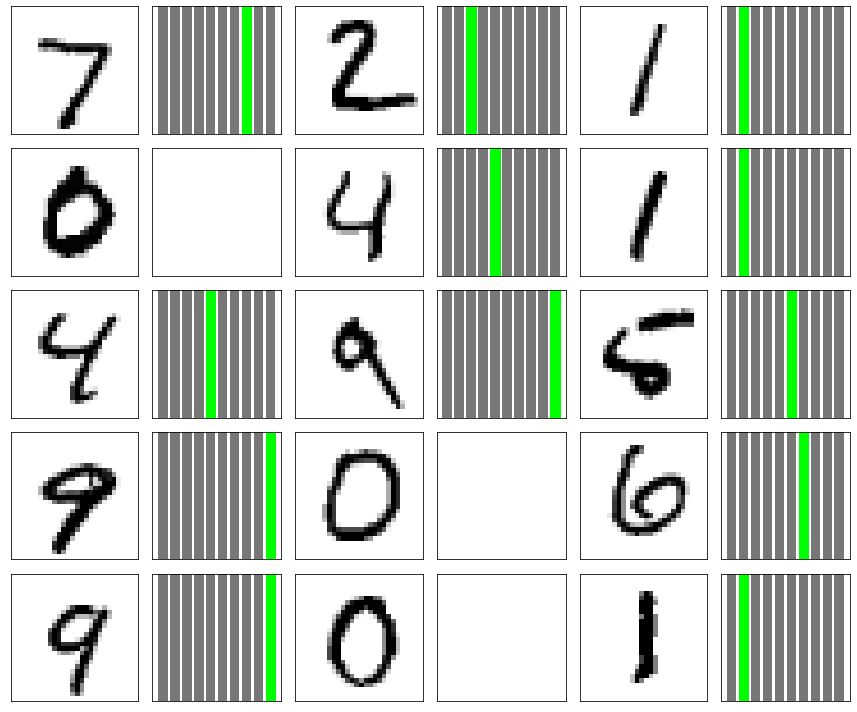

In [99]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_preds[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_preds[i], y_test)
plt.tight_layout()
plt.show()


## AIR QUALITY PREDICTION USING DEEP LEARNING ##

In [141]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
airdata=pd.read_csv('station_day.csv')


New_data=airdata.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
New_data=New_data.dropna()
New_data.head()

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Benzene  \
1  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09     0.20   
2  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44     0.22   
3  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81     0.29   
4  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18     0.17   
5  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55  109.74     0.21   

   Toluene  Xylene    AQI AQI_Bucket  
1     6.50    0.06  184.0   Moderate  
2     7.95    0.08  197.0   Moderate  
3     7.63    0.12  198.0   Moderate  
4     5.02    0.07  188.0   Moderate  
5     4.71    0.08  173.0   Moderate

In [142]:
import numpy as np
X=New_data.iloc[:,[0,1,2,3,4,5,6,7,8,12]]

y=New_data['AQI_Bucket'].to_list()
for i in range(len(y)) :
    if(y[i]=='Very Poor'):
        y[i]=0
    elif (y[i]=='Poor'):
        y[i]=1
    elif (y[i]=='Moderate'):
        y[i]=2
    elif (y[i]=='Satisfactory'):
        y[i]=3
    elif (y[i]=='Good'):
        y[i]=4
    else:
        y[i]=5
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [143]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(100,input_dim = 10, activation='relu'))
#add output layer
classifier_e25.add(Dense(100, activation='relu'))
classifier_e25.add(Dense(80, activation='relu'))
classifier_e25.add(Dense(6,  activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_80 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_81 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_82 (Dense)             (None, 6)                 486       
Total params: 19,766
Trainable params: 19,766
Non-trainable params: 0
_________________________________________________________________


In [144]:
model=classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
484/484 [==============================] - 1s 2ms/step - loss: 2.3499 - accuracy: 0.4560 - val_loss: 0.9646 - val_accuracy: 0.5699
Epoch 2/100
484/484 [==============================] - 1s 3ms/step - loss: 1.0054 - accuracy: 0.5876 - val_loss: 0.8517 - val_accuracy: 0.6383
Epoch 3/100
484/484 [==============================] - 1s 2ms/step - loss: 0.8214 - accuracy: 0.6684 - val_loss: 0.7884 - val_accuracy: 0.6433
Epoch 4/100
484/484 [==============================] - 1s 2ms/step - loss: 0.6709 - accuracy: 0.7255 - val_loss: 0.6367 - val_accuracy: 0.7184
Epoch 5/100
484/484 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7869 - val_loss: 0.5388 - val_accuracy: 0.7768
Epoch 6/100
484/484 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.8191 - val_loss: 0.4419 - val_accuracy: 0.8254
Epoch 7/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8477 - val_loss: 0.3429 - val_accuracy: 0.8670

Epoch 58/100
484/484 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9553 - val_loss: 0.0786 - val_accuracy: 0.9778
Epoch 59/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9586 - val_loss: 0.0843 - val_accuracy: 0.9740
Epoch 60/100
484/484 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9518 - val_loss: 0.1032 - val_accuracy: 0.9723
Epoch 61/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9700 - val_loss: 0.0850 - val_accuracy: 0.9706
Epoch 62/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9686 - val_loss: 0.1380 - val_accuracy: 0.9471
Epoch 63/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9572 - val_loss: 0.0895 - val_accuracy: 0.9765
Epoch 64/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9721 - val_loss: 0.1469 - val_accuracy:

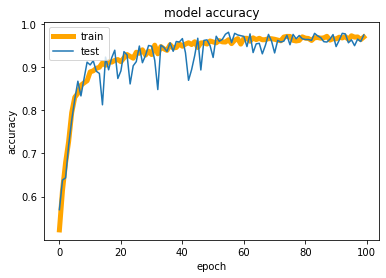

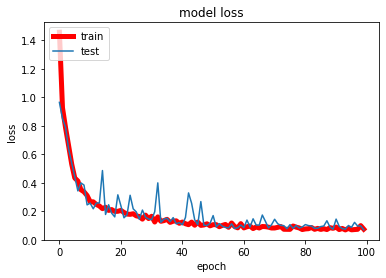

In [145]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Classification with Deep Learning

In [36]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.02, 
                    random_state=42)

In [37]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

X0        X1  label
0  0.760266  0.223878      1
1 -0.767222  0.145542      1
2 -0.808159  0.148944      1
3 -0.376028  0.703209      1
4  0.440510 -0.897617      0

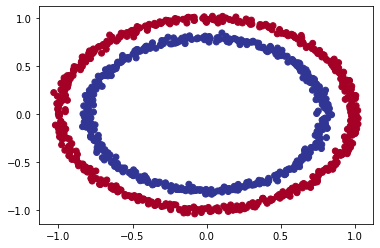

In [38]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [39]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob
   /master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org
    #/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [40]:
X_train=X[:800]
y_train=y[:800]
X_test=X[800:]
y_test=y[800:]

## Model 1 

In [41]:
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.linear), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.linear), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # ouput layer, sigmoid activation
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_1.fit(X, y, epochs=100, verbose=0)

doing binary classifcation...


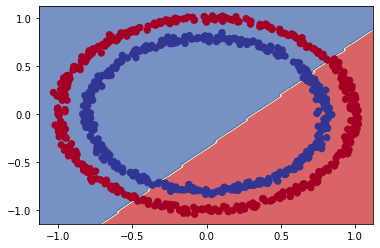

In [42]:
plot_decision_boundary(model_1, X_train, y_train)

In [43]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5750


[0.689868152141571, 0.574999988079071]

Our model 1 has a linear decision boundary and thus does not perform well in classifying our data. Now lets resort to non-linear activation functions.

## Model 2

In [44]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_2.fit(X, y, epochs=100, verbose=0)

doing binary classifcation...


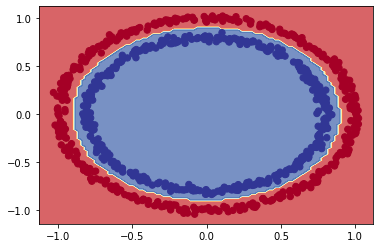

In [45]:
plot_decision_boundary(model_2, X_train, y_train)

In [46]:
model_2.evaluate(X_train, y_train)

25/25 [==============================] - 0s 836us/step - loss: 0.0016 - accuracy: 1.0000


[0.001596104702912271, 1.0]

Performs well with an accuracy of 99%

doing binary classifcation...
doing binary classifcation...


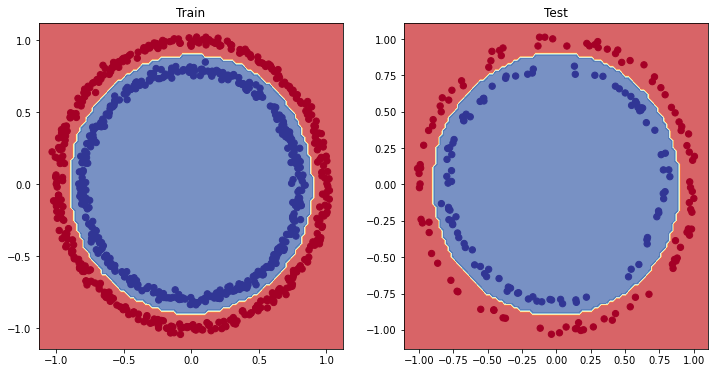

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X=X_test, y=y_test)
plt.show()

In [48]:
y_preds=model_2.predict(X_test)

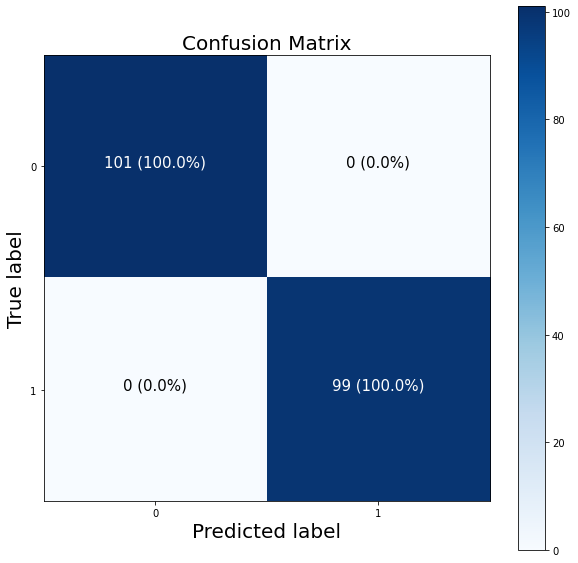

In [49]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/
#generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/
#basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Another Example

In [50]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("cwbdata.csv",header=None)
data.columns =['X1', 'X2', 'label']
data.head()

X1       X2  label
0  0.051267  0.69956      1
1 -0.092742  0.68494      1
2 -0.213710  0.69225      1
3 -0.375000  0.50219      1
4 -0.513250  0.46564      1

In [51]:
import random
f1=data['X1'].to_list()
#Reshuffling data

f2=data['X2'].to_list()
label=data['label'].to_list()

X=[[f1[i],f2[i]] for i in range(len(f1))]
y=label


In [52]:
indices=[ 49,  81, 107,  25,  51,  12, 117,  13,  43,  37,  50,  60,  33,
       102,  42,  88,  99,   8,  80,  73,  97,  23, 110,  72,  10,  82,
        24,  40,  98,   1,  71,   5,  78,  84,  75,   3,   4,  46,  21,
        63,  93,  92,  68,  45, 105,  28,  31,  89,  14,  91,  20,  16,
        38,  67, 114,  17,  53,  83,  30,  56, 100,  52,  47,  57, 109,
        61,  41,  26, 111,  94,  35,   7,  95,  69,  87,  15,  11,  86,
       104,  66, 112,   9,  18,   6,  19,  48, 101,  34,  85, 103, 113,
        90,  62,  59,  76,  96,  44,  32,  77,   2, 115,   0,  27, 106,
        22, 116,  39,  36,  64,  74,  79,  54, 108,  55,  65,  70,  29,
        58]
X=[X[i] for i in indices]
y=[y[i] for i in indices]
X=np.array(X)
y=np.array(y)

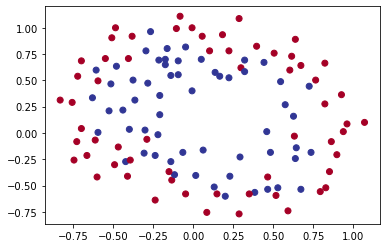

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [54]:
X_train=X[:90]
y_train=y[:90]
X_test=X[90:]
y_test=y[90:]

 ## model 3

In [55]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.linear), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.linear), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # ouput layer, sigmoid activation
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(X, y, epochs=100, verbose=0)

doing binary classifcation...


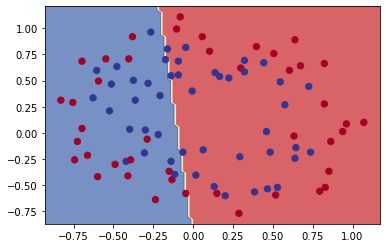

In [56]:
plot_decision_boundary(model_3, X_train, y_train)

In [57]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 156ms/step - loss: 0.6746 - accuracy: 0.6786


[0.6746087074279785, 0.6785714030265808]

## Model 4 

In [58]:
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),# hidden layer 1, ReLU activation
  tf.keras.layers.Dense(80, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs=50,verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5466
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.5406
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6529
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6550
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6936
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.7520
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7918
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7798
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7993
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7973
Epoch 11/50
4/4 [======================

doing binary classifcation...


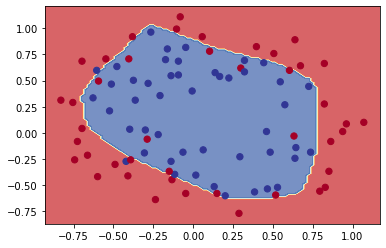

In [59]:
plot_decision_boundary(model_4, X_train, y_train)

In [60]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 152ms/step - loss: 0.3195 - accuracy: 0.8929


[0.3194580078125, 0.8928571343421936]

doing binary classifcation...
doing binary classifcation...


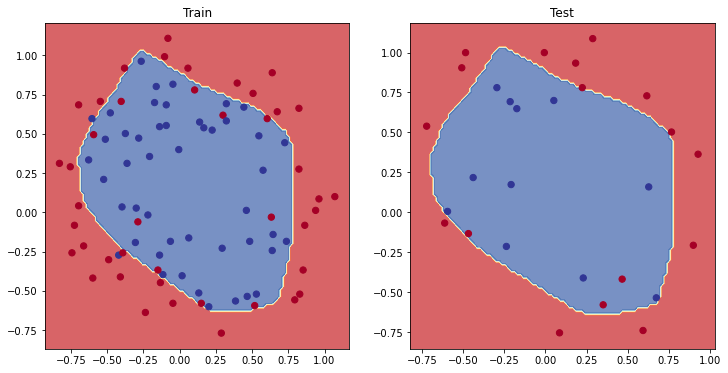

In [61]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [62]:
history = model_4.fit(X_train, y_train, epochs=100,verbose=0)

In [63]:
y_preds = model_4.predict(X_test)

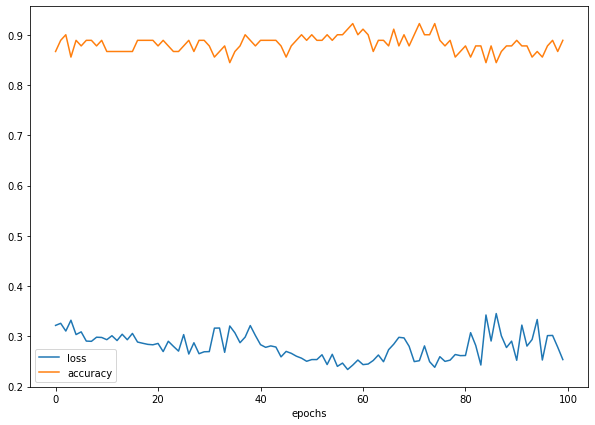

In [64]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[14,  3],
       [ 1, 10]])

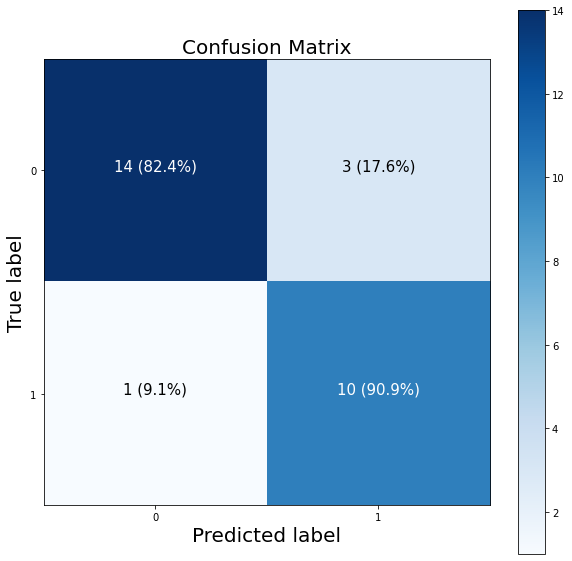

In [66]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/
#generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/
#basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [1]:
dataframe = pd.read_csv('air.csv', engine= 'python')

NameError: name 'pd' is not defined

In [3]:
import pandas as pd
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('air.csv')
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

FileNotFoundError: File b'air.csv' does not exist

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [3]:
# generating a random dataset with two features
X_train, y_train = generate_data(n_train = 300, train_only = True,
                                                   n_features = 2)
 
# Setting the percentage of outliers
outlier_fraction = 0.1
 
# Storing the outliers and inliners in different numpy arrays
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)
 
# Separating the two features
f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)

Text(0, 0.5, 'Feature 2')

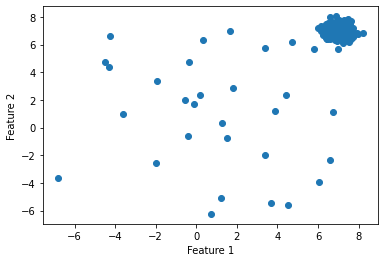

In [4]:
# Visualising the dataset
# create a meshgrid
xx, yy = np.meshgrid(np.linspace(-10, 10, 200),
                     np.linspace(-10, 10, 200))
 
# scatter plot
plt.scatter(f1, f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [5]:
# Training the classifier
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train, y_train)
 
# You can print this to see all the prediction scores
scores_pred = clf.decision_function(X_train)*-1
 
y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()
# Counting the number of errors
 
print('The number of prediction errors are ' + str(n_errors))

The number of prediction errors are 0


/opt/anaconda3/envs/Project/lib/python3.8/site-packages/pyod/models/base.py:348: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


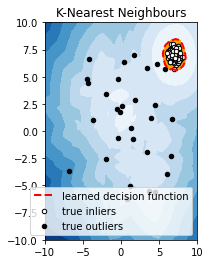

In [6]:
# threshold value to consider a
# datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)
 
# decision function calculates the raw
# anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
 
# fill blue colormap from minimum anomaly
# score to threshold value
subplot = plt.subplot(1, 2, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(),
                  threshold, 10), cmap = plt.cm.Blues_r)
 
# draw red contour line where anomaly
# score is equal to threshold
a = subplot.contour(xx, yy, Z, levels =[threshold],
                     linewidths = 2, colors ='red')
 
# fill orange contour lines where range of anomaly
# score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')
 
# scatter plot of inliers with white dots
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1],
                                    c ='white', s = 20, edgecolor ='k')
 
# scatter plot of outliers with black dots
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],
                                    c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')
 
subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true inliers', 'true outliers'],
    prop = matplotlib.font_manager.FontProperties(size = 10),
    loc ='lower right')
 
subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()


## Elliptic Envelope


In [7]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2,
                  centers=1, shuffle=True, random_state=1)

<AxesSubplot:>

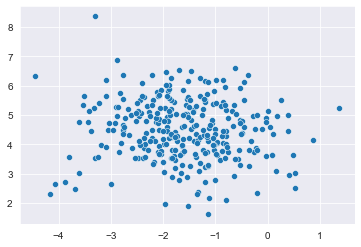

In [8]:
import seaborn as sns
sns.set_style("darkgrid")
sns.scatterplot(x=X[:,0], y=X[:,1])

/opt/anaconda3/envs/Project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/Project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

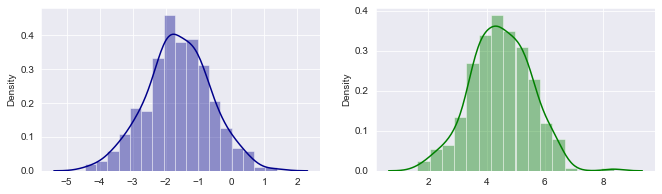

In [9]:
#Checking normality of data. The method works with Gaussian distributed data.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,3))
sns.distplot(X[:,0], ax=ax[0], color="darkblue")
sns.distplot(X[:,1], ax=ax[1], color='green')

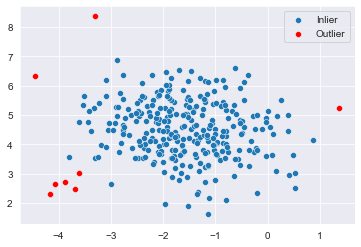

In [12]:
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.covariance import EllipticEnvelope

elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = elpenv.fit_predict(X)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]


sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.legend(['Inlier','Outlier'])

In [13]:
outlier_index

(array([ 17,  87,  97, 128, 179, 207, 214, 263]),)

In [14]:
# Extract inliers
inlier_index = np.where(pred==1)
inlier_values = X[inlier_index]

import pandas as pd
df = pd.DataFrame(inlier_values, columns=['x1', 'x2'])
df.head()

x1        x2
0 -2.681446  5.201018
1 -0.975559  4.053080
2 -2.879304  6.855859
3 -1.615891  4.180176
4 -1.461260  4.525499

## IQR-based detection

In [15]:
import numpy as np
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2,
                  centers=1, shuffle=True, random_state=1)

# This function returns the outlier indices of a feature
# Input is one feature
def outlier_indices(x):
    Q1, Q3 = np.percentile(x, [25, 75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outlier_index = np.where((x < lower_bound) | (x > upper_bound))
    return outlier_index

print("Outlier Indices of x1: ", outlier_indices(X[:,0])[0])
print("\nOutlier Values of x1: \n", X[outlier_indices(X[:,0])])
print("\n")
print("Outlier Indices of x2: ", outlier_indices(X[:,1])[0])
print("\nOutlier Values of x2: \n", X[outlier_indices(X[:,1])])

Outlier Indices of x1:  [ 17  87 128 241 263]

Outlier Values of x1: 
 [[-4.16600056  2.29232595]
 [-4.45264491  6.34401868]
 [-4.07306291  2.62892349]
 [ 0.8687658   4.15785509]
 [ 1.37129721  5.23107449]]


Outlier Indices of x2:  [207 211]

Outlier Values of x2: 
 [[-3.2970095   8.36509257]
 [-1.14448629  1.6239554 ]]


In [16]:
import numpy as np
index_union = np.union1d(outlier_indices(X[:,0])[0], 
                         outlier_indices(X[:,1])[0])
index_union

array([ 17,  87, 128, 207, 211, 241, 263])

Text(0.5, 1.0, 'IQR-based Detection')

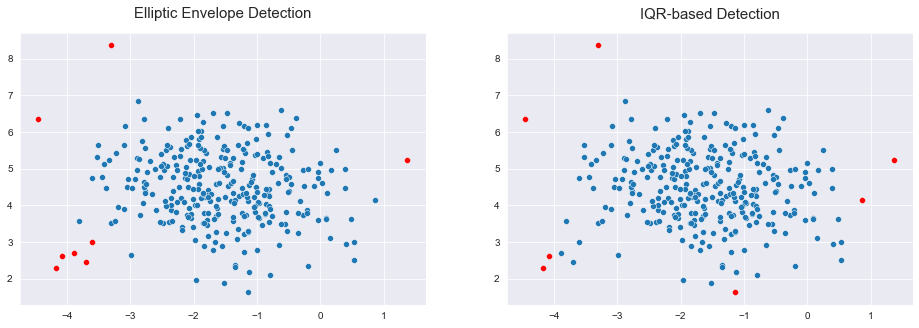

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.scatterplot(x=X[:,0], y=X[:,1], ax=ax[0])
sns.scatterplot(x=outlier_values[:,0], ax=ax[0],
                y=outlier_values[:,1], color='r')

sns.scatterplot(x=X[:,0], y=X[:,1], ax=ax[1])
sns.scatterplot(x=X[index_union][:,0], y=X[index_union][:,1], ax=ax[1],
                color='r')

ax[0].set_title("Elliptic Envelope Detection", fontsize=15, pad=15)
ax[1].set_title("IQR-based Detection", fontsize=15, pad=15)

Text(0.5, 1.0, 'Data without outliers')

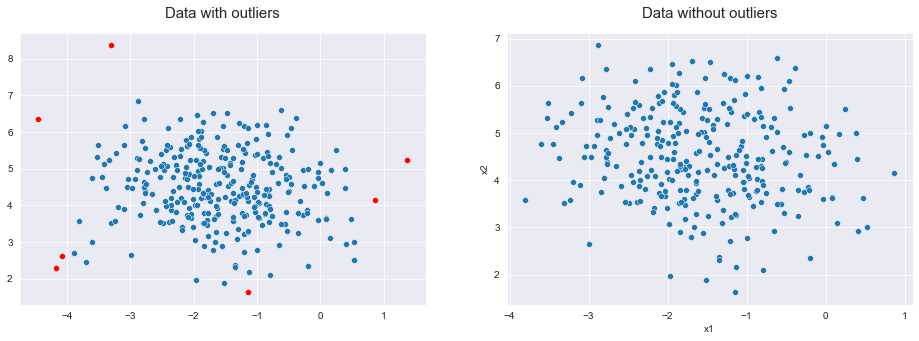

In [18]:
import pandas as pd

df = pd.DataFrame(inlier_values, columns=['x1', 'x2'])
cleaned_df = df.drop(labels=index_union, axis=0, inplace=False)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.scatterplot(x=X[:,0], y=X[:,1], ax=ax[0])
sns.scatterplot(x=X[index_union][:,0], y=X[index_union][:,1], ax=ax[0],
                color='r')

sns.scatterplot(x=cleaned_df['x1'], y=cleaned_df['x2'], ax=ax[1])

ax[0].set_title("Data with outliers", fontsize=15, pad=15)
ax[1].set_title("Data without outliers", fontsize=15, pad=15)

Text(0.5, 1.0, 'Boxplot of x2 without outliers')

<Figure size 432x288 with 0 Axes>

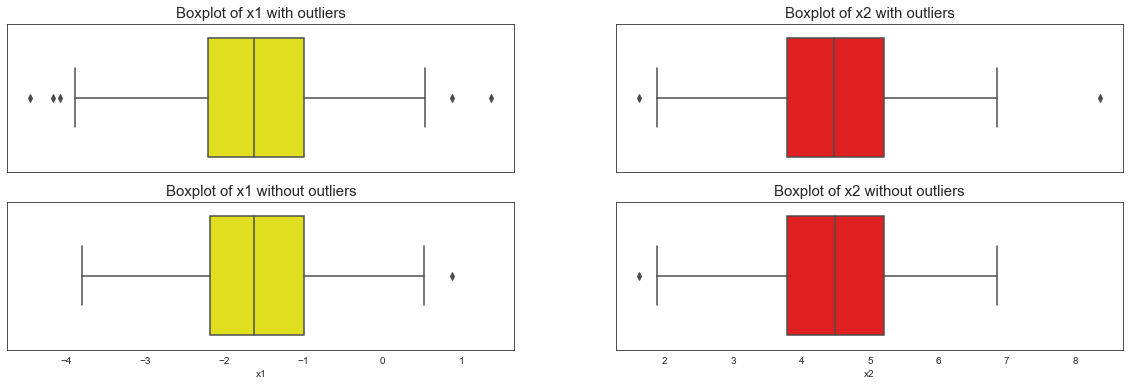

In [19]:
sns.set_style("white")
import matplotlib.pyplot as plt
plt.tight_layout(pad=10)

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(20,6), sharex='col')
sns.boxplot(x=X[:,0], ax=ax[0,0], color='yellow')
sns.boxplot(x=X[:,1], ax=ax[0,1], color='red')
sns.boxplot(x=cleaned_df['x1'], ax=ax[1,0], color='yellow')
sns.boxplot(x=cleaned_df['x2'], ax=ax[1,1], color='red')

ax[0,0].set_title("Boxplot of x1 with outliers", fontsize=15)
ax[0,1].set_title("Boxplot of x2 with outliers", fontsize=15)
ax[1,0].set_title("Boxplot of x1 without outliers", fontsize=15)
ax[1,1].set_title("Boxplot of x2 without outliers", fontsize=15)

## Baseline model: Linear Regression

In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
print(X_train.shape, y_train.shape)
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
MAE: 3.417


# Automatic Outlier Detection

## 1: Isolation Forest

Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.



In [8]:
from sklearn.ensemble import IsolationForest
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(X_train.shape, y_train.shape)
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(305, 13) (305,)
MAE: 3.205


# Cn2 Predictions via FLAML #

### Sukanta Basu (Delft University of Technology) ###

**Last updated: November 3, 2022**

Notes: 

1. 

**Load the necessary packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

import pickle
from pickle import dump, load
import time

from flaml import AutoML

#For reproducibility of the results, the following seeds should be selected 
from numpy.random import seed
seed(20)
randSeed = np.random.randint(1000)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**User input**

In [2]:
#Number of ensembles
nEns    = 25

#Model
mod     = ['lgbm', 'xgboost', 'xgb_limitdepth', 'catboost', 'rf', 'extra_tree']
modOpt  = 0 #[0:'lgbm', 1:'xgboost', 2:'xgb_limitdepth', 3:'catboost', 4:'rf', 5:'extra_tree'],

#Time budget
maxTime = 60 #in seconds

#Cn2 is measured at 6 m, 15 m, and 25 m
zLev    = 6 

#1:ERA5, 2:MERRA2, 3:COMBO
inpOpt  = 3 

#Sampling opt
sOpt = 1 #0: hourly, 1: 5 min

#Train-validation ratio
split_ratio = 0.2

**Input & output directories**

In [3]:
ROOT_DIR = "/Users/sukantabasu/Dropbox/Priority/Works_Ongoing/AIML/2022_HawaiiCn2Reanalysis/"

INPUT_DIR  = ROOT_DIR + "ExtractedDATA/v02/Tuning/"
OUTPUT_DIR = ROOT_DIR + "ExtractedDATA/v02/Tuning/" 

In [4]:
if modOpt == 0:
    TUNING_DIR  = OUTPUT_DIR + 'LGBM/'
elif modOpt == 1:
    TUNING_DIR  = OUTPUT_DIR + 'XGB/'
elif modOpt == 2:
    TUNING_DIR  = OUTPUT_DIR + 'XGBL/'
elif modOpt == 3:
    TUNING_DIR  = OUTPUT_DIR + 'CAT/'
elif modOpt == 4:
    TUNING_DIR  = OUTPUT_DIR + 'RF/'
elif modOpt == 5:
    TUNING_DIR  = OUTPUT_DIR + 'EXT/'    

**Test data**

In [5]:
if inpOpt == 1:

    if sOpt == 0:
        df_F_Tst = pd.read_csv(OUTPUT_DIR+'Tst_ERA5_60min.csv')
    else:
        df_F_Tst = pd.read_csv(OUTPUT_DIR+'Tst_ERA5_5min.csv')    
    XTst = df_F_Tst[['sinDY','cosDY','sinHR','cosHR','ERA5_WSPD_10m','ERA5_WSPD_100m','ERA5_GUST_10m','ERA5_alpha','ERA5_beta','ERA5_T_2m','ERA5_TSK','ERA5_TSL','ERA5_Td_2m','ERA5_dT1','ERA5_dT2','ERA5_dT3','ERA5_UST','ERA5_SHFX','ERA5_LH','ERA5_PMSL','ERA5_PBLH','ERA5_TCC','ERA5_LCC','ERA5_EDR','ERA5_CAPE']].values

elif inpOpt == 2: 
    
    if sOpt == 0:
        df_F_Tst = pd.read_csv(OUTPUT_DIR+'Tst_MERRA2_60min.csv')
    else:
        df_F_Tst = pd.read_csv(OUTPUT_DIR+'Tst_MERRA2_5min.csv')
            
    XTst = df_F_Tst[['sinDY','cosDY','sinHR','cosHR','MRA2_WSPD_2m','MRA2_WSPD_10m','MRA2_WSPD_50m','MRA2_GUST','MRA2_alpha1','MRA2_alpha2','MRA2_beta1','MRA2_beta2','MRA2_T_2m','MRA2_T_10m','MRA2_TSK','MRA2_dT1','MRA2_dT2','MRA2_Q_2m','MRA2_Q_10m','MRA2_dQ','MRA2_UST','MRA2_SHFX','MRA2_LH','MRA2_PMSL','MRA2_PBLH','MRA2_RHO','MRA2_RIB']].values    

elif inpOpt == 3:
    
    if sOpt == 0:
        df_F_Tst = pd.read_csv(OUTPUT_DIR+'Tst_COMBO_60min.csv')
    else:
        df_F_Tst = pd.read_csv(OUTPUT_DIR+'Tst_COMBO_5min.csv')
            
    XTst = df_F_Tst[['sinDY','cosDY','sinHR','cosHR','ERA5_WSPD_10m','ERA5_WSPD_100m','ERA5_GUST_10m','ERA5_alpha','ERA5_beta','ERA5_T_2m','ERA5_TSK','ERA5_TSL','ERA5_Td_2m','ERA5_dT1','ERA5_dT2','ERA5_dT3','ERA5_UST','ERA5_SHFX','ERA5_LH','ERA5_PMSL','ERA5_PBLH','ERA5_TCC','ERA5_LCC','ERA5_EDR','ERA5_CAPE','MRA2_WSPD_2m','MRA2_WSPD_10m','MRA2_WSPD_50m','MRA2_GUST','MRA2_alpha1','MRA2_alpha2','MRA2_beta1','MRA2_beta2','MRA2_T_2m','MRA2_T_10m','MRA2_TSK','MRA2_dT1','MRA2_dT2','MRA2_Q_2m','MRA2_Q_10m','MRA2_dQ','MRA2_UST','MRA2_SHFX','MRA2_LH','MRA2_PMSL','MRA2_PBLH','MRA2_RHO','MRA2_RIB']].values
    
if zLev == 6:
    yTst_true = df_F_Tst[['LCn2_06m']].values
elif zLev == 15: 
    yTst_true = df_F_Tst[['LCn2_15m']].values
elif zLev == 25:
    yTst_true = df_F_Tst[['LCn2_25m']].values

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sukantabasu/Dropbox/Priority/Works_Ongoing/AIML/2022_HawaiiCn2Reanalysis/ExtractedDATA/v02/Tuning/Tst_COMBO_5min.csv'

#### FLAML-based predictions

In [ ]:
nSamples, nFeatures = np.shape(XTst)

yTst = np.zeros((nSamples,nEns))
for n in range(nEns):

    fSTR = TUNING_DIR + 'FLAML' + '_zLev' + str(zLev) + '_inpOpt' + str(inpOpt) + '_sOpt' + str(sOpt) + '_modOpt' + str(modOpt) + '_maxT' + str(maxTime) + '_Ens' + str(n) + '.pkl'
    with open(fSTR, "rb") as f:
        automl = pickle.load(f)

    modFLAML = automl.best_model_for_estimator(mod[modOpt])
    yTst[:,n]     = modFLAML.predict(XTst)

#### Compute median and pecentile predictions

In [ ]:
yTst_p10 = np.percentile(yTst,10, axis = 1)
yTst_p50 = np.percentile(yTst,50, axis = 1)
yTst_p90 = np.percentile(yTst,90, axis = 1)

In [ ]:
plt.plot(yTst_p50,'-k')
plt.plot(yTst_true,'-m')

In [ ]:
i = 3000
plt.plot(yTst_p50[i:i+200],'-k')
plt.plot(yTst_true[i:i+200],'-m')
plt.show()

In [ ]:
plt.plot(yTst_true,yTst_p50,'.k')
plt.xlim((-16.5,-11.5))
plt.ylim((-16.5,-11.5))
plt.xlabel('Observed Cn2')
plt.ylabel('Predicted Cn2')

# Hyperparameter tuning via FLAML #

### Sukanta Basu (Delft University of Technology) ###

**Last updated: November 3, 2022**

Notes: 

1. 

**Load the necessary packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

import pickle
from pickle import dump, load
import time

from flaml import AutoML

#For reproducibility of the results, the following seeds should be selected 
from numpy.random import seed
seed(20)
randSeed = np.random.randint(1000)

/Users/sukantabasu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**User input**

In [2]:
#Number of ensembles
nEns    = 25

#Model
mod     = ['lgbm', 'xgboost', 'xgb_limitdepth', 'catboost', 'rf', 'extra_tree']
modOpt  = 3 #[0:'lgbm', 1:'xgboost', 2:'xgb_limitdepth', 3:'catboost', 4:'rf', 5:'extra_tree'],

#Time budget
maxTime = 60 #in seconds

#Cn2 is measured at 6 m, 15 m, and 25 m
zLev    = 6 

#1:ERA5, 2:MERRA2, 3:COMBO
inpOpt  = 3 

#Sampling opt
sOpt = 1 #0: hourly, 1: 5 min

#Train-validation ratio
split_ratio = 0.2

**Input & output directories**

In [3]:
ROOT_DIR = "/Users/sukantabasu/Dropbox/Priority/Works_Ongoing/AIML/2022_HawaiiCn2Reanalysis/"

INPUT_DIR  = ROOT_DIR + "ExtractedDATA/v02/Tuning/"
OUTPUT_DIR = ROOT_DIR + "ExtractedDATA/v02/Tuning/" 

In [4]:
if modOpt == 0:
    TUNING_DIR  = OUTPUT_DIR + 'LGBM/'
elif modOpt == 1:
    TUNING_DIR  = OUTPUT_DIR + 'XGB/'
elif modOpt == 2:
    TUNING_DIR  = OUTPUT_DIR + 'XGBL/'
elif modOpt == 3:
    TUNING_DIR  = OUTPUT_DIR + 'CAT/'
elif modOpt == 4:
    TUNING_DIR  = OUTPUT_DIR + 'RF/'
elif modOpt == 5:
    TUNING_DIR  = OUTPUT_DIR + 'EXT/'    

#### FLAML Configuration

In [5]:
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": maxTime,  # in seconds
    "metric": 'mse',
    "task": 'regression',
    "estimator_list": [mod[modOpt]],
    "eval_method":'holdout',
    "early_stop": True,
    "sample": True, #A boolean of whether to sample the training data during search
    "ensemble": False, #Whether to perform ensemble after search
    "model_history": True, #A boolean of whether to keep the best model per estimator
    "retrain_full": True, #whether to retrain the selected model on the full training data
    "log_file_name": 'FLAML_' + str(modOpt) + '.log'
}

**Training, validation data**

In [6]:
if inpOpt == 1:

    if sOpt == 0:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_ERA5_60min.csv')
    else:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_ERA5_5min.csv')    
    XTrnVal = df_F_TrnVal[['sinDY','cosDY','sinHR','cosHR','ERA5_WSPD_10m','ERA5_WSPD_100m','ERA5_GUST_10m','ERA5_alpha','ERA5_beta','ERA5_T_2m','ERA5_TSK','ERA5_TSL','ERA5_Td_2m','ERA5_dT1','ERA5_dT2','ERA5_dT3','ERA5_UST','ERA5_SHFX','ERA5_LH','ERA5_PMSL','ERA5_PBLH','ERA5_TCC','ERA5_LCC','ERA5_EDR','ERA5_CAPE']].values

elif inpOpt == 2: 
    
    if sOpt == 0:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_MERRA2_60min.csv')
    else:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_MERRA2_5min.csv')
            
    XTrnVal = df_F_TrnVal[['sinDY','cosDY','sinHR','cosHR','MRA2_WSPD_2m','MRA2_WSPD_10m','MRA2_WSPD_50m','MRA2_GUST','MRA2_alpha1','MRA2_alpha2','MRA2_beta1','MRA2_beta2','MRA2_T_2m','MRA2_T_10m','MRA2_TSK','MRA2_dT1','MRA2_dT2','MRA2_Q_2m','MRA2_Q_10m','MRA2_dQ','MRA2_UST','MRA2_SHFX','MRA2_LH','MRA2_PMSL','MRA2_PBLH','MRA2_RHO','MRA2_RIB']].values    

elif inpOpt == 3:
    
    if sOpt == 0:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_COMBO_60min.csv')
    else:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_COMBO_5min.csv')
            
    XTrnVal = df_F_TrnVal[['sinDY','cosDY','sinHR','cosHR','ERA5_WSPD_10m','ERA5_WSPD_100m','ERA5_GUST_10m','ERA5_alpha','ERA5_beta','ERA5_T_2m','ERA5_TSK','ERA5_TSL','ERA5_Td_2m','ERA5_dT1','ERA5_dT2','ERA5_dT3','ERA5_UST','ERA5_SHFX','ERA5_LH','ERA5_PMSL','ERA5_PBLH','ERA5_TCC','ERA5_LCC','ERA5_EDR','ERA5_CAPE','MRA2_WSPD_2m','MRA2_WSPD_10m','MRA2_WSPD_50m','MRA2_GUST','MRA2_alpha1','MRA2_alpha2','MRA2_beta1','MRA2_beta2','MRA2_T_2m','MRA2_T_10m','MRA2_TSK','MRA2_dT1','MRA2_dT2','MRA2_Q_2m','MRA2_Q_10m','MRA2_dQ','MRA2_UST','MRA2_SHFX','MRA2_LH','MRA2_PMSL','MRA2_PBLH','MRA2_RHO','MRA2_RIB']].values    
    
if zLev == 6:
    yTrnVal = df_F_TrnVal[['LCn2_06m']].values
elif zLev == 15: 
    yTrnVal = df_F_TrnVal[['LCn2_15m']].values
elif zLev == 25:
    yTrnVal = df_F_TrnVal[['LCn2_25m']].values

#### FLAML-based tuning

In [7]:
nSamples = np.size(yTrnVal)

for n in range(nEns):

    nSamplesVal = int(np.rint(split_ratio*nSamples))

    #Pick a random start location for validation set
    iVal        = np.random.randint(0,nSamples-nSamplesVal+1)

    print((nSamples,nSamplesVal,iVal))

    XVal        = XTrnVal[iVal:iVal+nSamplesVal+1,:]
    yVal        = yTrnVal[iVal:iVal+nSamplesVal+1,:]

    XTrn1       = XTrnVal[0:iVal,:]
    yTrn1       = yTrnVal[0:iVal,:]

    XTrn2       = XTrnVal[iVal+nSamplesVal+1:,:]
    yTrn2       = yTrnVal[iVal+nSamplesVal+1:,:]

    XTrn        = np.vstack((XTrn1, XTrn2))
    yTrn        = np.vstack((yTrn1, yTrn2))

    automl.fit(X_train=XTrn, y_train = yTrn.squeeze(), X_val = XVal, y_val = yVal.squeeze(), **automl_settings)

#   print(automl.best_config_per_estimator)
    print('Best ML leaner:', automl.best_estimator)
    print('Best hyperparmeter config:', automl.best_config)
    print('Best accuracy on validation data: {0:.4g}'.format(automl.best_loss))
    print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

    fSTR = TUNING_DIR + 'FLAML' + '_zLev' + str(zLev) + '_inpOpt' + str(inpOpt) + '_sOpt' + str(sOpt) + '_modOpt' + str(modOpt) + '_maxT' + str(maxTime) + '_Ens' + str(n) + '.pkl'
    with open(fSTR, "wb") as f:
        dump(automl, f, pickle.HIGHEST_PROTOCOL)

[flaml.automl: 11-03 19:04:31] {2600} INFO - task = regression
[flaml.automl: 11-03 19:04:31] {2602} INFO - Data split method: uniform
[flaml.automl: 11-03 19:04:31] {2605} INFO - Evaluation method: holdout
[flaml.automl: 11-03 19:04:31] {2727} INFO - Minimizing error metric: mse
[flaml.automl: 11-03 19:04:31] {2869} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl: 11-03 19:04:31] {3164} INFO - iteration 0, current learner catboost


(9312, 1862, 2522)


[flaml.automl: 11-03 19:04:33] {3297} INFO - Estimated sufficient time budget=18426s. Estimated necessary time budget=18s.
[flaml.automl: 11-03 19:04:33] {3344} INFO -  at 1.8s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:33] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:04:34] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:34] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:04:35] {3344} INFO -  at 3.4s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:35] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:04:36] {3344} INFO -  at 4.8s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:36] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 322}
Best accuracy on validation data: 0.1384
Training duration of best run: 1.843 s
(9312, 1862, 4367)


[flaml.automl: 11-03 19:04:51] {3297} INFO - Estimated sufficient time budget=9477s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 19:04:51] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2016,	best estimator catboost's best error=0.2016
[flaml.automl: 11-03 19:04:51] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:04:52] {3344} INFO -  at 2.5s,	estimator catboost's best error=0.2016,	best estimator catboost's best error=0.2016
[flaml.automl: 11-03 19:04:52] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:04:53] {3344} INFO -  at 3.4s,	estimator catboost's best error=0.1947,	best estimator catboost's best error=0.1947
[flaml.automl: 11-03 19:04:53] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:04:54] {3344} INFO -  at 4.5s,	estimator catboost's best error=0.1947,	best estimator catboost's best error=0.1947
[flaml.automl: 11-03 19:04:54] {3164} INFO - iteration 4, current learner 

[flaml.automl: 11-03 19:05:47] {2900} INFO - fit succeeded
[flaml.automl: 11-03 19:05:47] {2901} INFO - Time taken to find the best model: 57.85523295402527
[flaml.automl: 11-03 19:05:47] {2600} INFO - task = regression
[flaml.automl: 11-03 19:05:47] {2602} INFO - Data split method: uniform
[flaml.automl: 11-03 19:05:47] {2605} INFO - Evaluation method: holdout
[flaml.automl: 11-03 19:05:47] {2727} INFO - Minimizing error metric: mse
[flaml.automl: 11-03 19:05:47] {2869} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl: 11-03 19:05:47] {3164} INFO - iteration 0, current learner catboost


Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.005, 'n_estimators': 4056}
Best accuracy on validation data: 0.1934
Training duration of best run: 16.34 s
(9312, 1862, 7391)


[flaml.automl: 11-03 19:05:49] {3297} INFO - Estimated sufficient time budget=14146s. Estimated necessary time budget=14s.
[flaml.automl: 11-03 19:05:49] {3344} INFO -  at 1.4s,	estimator catboost's best error=0.2586,	best estimator catboost's best error=0.2586
[flaml.automl: 11-03 19:05:49] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:05:50] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.2332,	best estimator catboost's best error=0.2332
[flaml.automl: 11-03 19:05:50] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:05:52] {3344} INFO -  at 4.3s,	estimator catboost's best error=0.2332,	best estimator catboost's best error=0.2332
[flaml.automl: 11-03 19:05:52] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:05:55] {3344} INFO -  at 7.7s,	estimator catboost's best error=0.2100,	best estimator catboost's best error=0.2100
[flaml.automl: 11-03 19:05:55] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 12, 'learning_rate': 0.052369353942223536, 'n_estimators': 568}
Best accuracy on validation data: 0.2064
Training duration of best run: 1.742 s
(9312, 1862, 7068)


[flaml.automl: 11-03 19:06:47] {3297} INFO - Estimated sufficient time budget=15153s. Estimated necessary time budget=15s.
[flaml.automl: 11-03 19:06:47] {3344} INFO -  at 1.5s,	estimator catboost's best error=0.2292,	best estimator catboost's best error=0.2292
[flaml.automl: 11-03 19:06:47] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:06:49] {3344} INFO -  at 3.5s,	estimator catboost's best error=0.2292,	best estimator catboost's best error=0.2292
[flaml.automl: 11-03 19:06:49] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:06:50] {3344} INFO -  at 4.3s,	estimator catboost's best error=0.2273,	best estimator catboost's best error=0.2273
[flaml.automl: 11-03 19:06:50] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:06:51] {3344} INFO -  at 5.3s,	estimator catboost's best error=0.2256,	best estimator catboost's best error=0.2256
[flaml.automl: 11-03 19:06:51] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 12, 'learning_rate': 0.10777607394234925, 'n_estimators': 336}
Best accuracy on validation data: 0.2246
Training duration of best run: 1.088 s
(9312, 1862, 7386)


[flaml.automl: 11-03 19:22:19] {3297} INFO - Estimated sufficient time budget=18620s. Estimated necessary time budget=19s.
[flaml.automl: 11-03 19:22:19] {3344} INFO -  at 1.9s,	estimator catboost's best error=0.2360,	best estimator catboost's best error=0.2360
[flaml.automl: 11-03 19:22:19] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:22:22] {3344} INFO -  at 4.9s,	estimator catboost's best error=0.2230,	best estimator catboost's best error=0.2230
[flaml.automl: 11-03 19:22:22] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:22:24] {3344} INFO -  at 6.3s,	estimator catboost's best error=0.2230,	best estimator catboost's best error=0.2230
[flaml.automl: 11-03 19:22:24] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:22:27] {3344} INFO -  at 9.7s,	estimator catboost's best error=0.2230,	best estimator catboost's best error=0.2230
[flaml.automl: 11-03 19:22:27] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.01855464082396979, 'n_estimators': 1210}
Best accuracy on validation data: 0.2193
Training duration of best run: 919.8 s
(9312, 1862, 6537)


[flaml.automl: 11-03 19:37:54] {3297} INFO - Estimated sufficient time budget=14602s. Estimated necessary time budget=15s.
[flaml.automl: 11-03 19:37:54] {3344} INFO -  at 1.5s,	estimator catboost's best error=0.2272,	best estimator catboost's best error=0.2272
[flaml.automl: 11-03 19:37:54] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:37:55] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.2253,	best estimator catboost's best error=0.2253
[flaml.automl: 11-03 19:37:55] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:37:57] {3344} INFO -  at 4.3s,	estimator catboost's best error=0.2253,	best estimator catboost's best error=0.2253
[flaml.automl: 11-03 19:37:57] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:53:59] {3344} INFO -  at 967.0s,	estimator catboost's best error=0.2227,	best estimator catboost's best error=0.2227
[flaml.automl: 11-03 19:53:59] {3465} INFO - selected model: <catboost

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.04171721859304757, 'n_estimators': 736}
Best accuracy on validation data: 0.2227
Training duration of best run: 962.6 s
(9312, 1862, 1428)


[flaml.automl: 11-03 19:54:00] {3297} INFO - Estimated sufficient time budget=13025s. Estimated necessary time budget=13s.
[flaml.automl: 11-03 19:54:00] {3344} INFO -  at 1.3s,	estimator catboost's best error=0.1856,	best estimator catboost's best error=0.1856
[flaml.automl: 11-03 19:54:00] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:54:02] {3344} INFO -  at 2.7s,	estimator catboost's best error=0.1819,	best estimator catboost's best error=0.1819
[flaml.automl: 11-03 19:54:02] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:54:03] {3344} INFO -  at 3.8s,	estimator catboost's best error=0.1819,	best estimator catboost's best error=0.1819
[flaml.automl: 11-03 19:54:03] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:54:05] {3344} INFO -  at 5.6s,	estimator catboost's best error=0.1814,	best estimator catboost's best error=0.1814
[flaml.automl: 11-03 19:54:05] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.04171721859304757, 'n_estimators': 546}
Best accuracy on validation data: 0.1814
Training duration of best run: 1.743 s
(9312, 1862, 3915)


[flaml.automl: 11-03 20:09:42] {3297} INFO - Estimated sufficient time budget=15667s. Estimated necessary time budget=16s.
[flaml.automl: 11-03 20:09:42] {3344} INFO -  at 1.6s,	estimator catboost's best error=0.2149,	best estimator catboost's best error=0.2149
[flaml.automl: 11-03 20:09:42] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:09:43] {3344} INFO -  at 2.9s,	estimator catboost's best error=0.1902,	best estimator catboost's best error=0.1902
[flaml.automl: 11-03 20:09:43] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:09:45] {3344} INFO -  at 4.4s,	estimator catboost's best error=0.1902,	best estimator catboost's best error=0.1902
[flaml.automl: 11-03 20:09:45] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:25:24] {3344} INFO -  at 944.0s,	estimator catboost's best error=0.1902,	best estimator catboost's best error=0.1902
[flaml.automl: 11-03 20:25:24] {3465} INFO - selected model: <catboost

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 447}
Best accuracy on validation data: 0.1902
Training duration of best run: 1.355 s
(9312, 1862, 5910)


[flaml.automl: 11-03 20:25:27] {3297} INFO - Estimated sufficient time budget=24257s. Estimated necessary time budget=24s.
[flaml.automl: 11-03 20:25:27] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.2163,	best estimator catboost's best error=0.2163
[flaml.automl: 11-03 20:25:27] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:25:29] {3344} INFO -  at 4.7s,	estimator catboost's best error=0.2163,	best estimator catboost's best error=0.2163
[flaml.automl: 11-03 20:25:29] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:25:30] {3344} INFO -  at 5.5s,	estimator catboost's best error=0.2163,	best estimator catboost's best error=0.2163
[flaml.automl: 11-03 20:25:30] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:41:45] {3344} INFO -  at 980.8s,	estimator catboost's best error=0.2125,	best estimator catboost's best error=0.2125
[flaml.automl: 11-03 20:41:45] {3465} INFO - selected model: <catboost

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.06692273485930686, 'n_estimators': 328}
Best accuracy on validation data: 0.2125
Training duration of best run: 975.3 s
(9312, 1862, 1607)


[flaml.automl: 11-03 20:41:47] {3297} INFO - Estimated sufficient time budget=14866s. Estimated necessary time budget=15s.
[flaml.automl: 11-03 20:41:47] {3344} INFO -  at 1.5s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:47] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:41:48] {3344} INFO -  at 3.1s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:48] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:41:49] {3344} INFO -  at 3.9s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:49] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:41:50] {3344} INFO -  at 5.2s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:50] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 296}
Best accuracy on validation data: 0.1628
Training duration of best run: 1.487 s
(9312, 1862, 3234)


[flaml.automl: 11-03 20:42:05] {3297} INFO - Estimated sufficient time budget=9141s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 20:42:05] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.1528,	best estimator catboost's best error=0.1528
[flaml.automl: 11-03 20:42:05] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:42:07] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1503,	best estimator catboost's best error=0.1503
[flaml.automl: 11-03 20:42:07] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:42:08] {3344} INFO -  at 3.3s,	estimator catboost's best error=0.1503,	best estimator catboost's best error=0.1503
[flaml.automl: 11-03 20:42:08] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:42:10] {3344} INFO -  at 5.8s,	estimator catboost's best error=0.1503,	best estimator catboost's best error=0.1503
[flaml.automl: 11-03 20:42:10] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.038639340448029906, 'n_estimators': 361}
Best accuracy on validation data: 0.1425
Training duration of best run: 957.1 s
(9312, 1862, 7136)


[flaml.automl: 11-03 20:58:27] {3297} INFO - Estimated sufficient time budget=19264s. Estimated necessary time budget=19s.
[flaml.automl: 11-03 20:58:27] {3344} INFO -  at 1.9s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:27] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:58:29] {3344} INFO -  at 3.7s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:29] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:58:30] {3344} INFO -  at 4.5s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:30] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:58:31] {3344} INFO -  at 5.7s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:31] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 15, 'learning_rate': 0.04630607855996404, 'n_estimators': 44}
Best accuracy on validation data: 0.1897
Training duration of best run: 1053 s
(9312, 1862, 3190)


[flaml.automl: 11-03 21:16:06] {3297} INFO - Estimated sufficient time budget=14012s. Estimated necessary time budget=14s.
[flaml.automl: 11-03 21:16:06] {3344} INFO -  at 1.4s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:06] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 21:16:07] {3344} INFO -  at 3.3s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:07] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 21:16:08] {3344} INFO -  at 4.2s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:08] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 21:16:10] {3344} INFO -  at 6.2s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:10] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 316}
Best accuracy on validation data: 0.1342
Training duration of best run: 1.401 s
(9312, 1862, 552)


[flaml.automl: 11-03 21:32:45] {3297} INFO - Estimated sufficient time budget=11172s. Estimated necessary time budget=11s.
[flaml.automl: 11-03 21:32:45] {3344} INFO -  at 1.1s,	estimator catboost's best error=0.1760,	best estimator catboost's best error=0.1760
[flaml.automl: 11-03 21:32:45] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 21:32:47] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.1719,	best estimator catboost's best error=0.1719
[flaml.automl: 11-03 21:32:47] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 21:32:48] {3344} INFO -  at 4.4s,	estimator catboost's best error=0.1719,	best estimator catboost's best error=0.1719
[flaml.automl: 11-03 21:32:48] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 21:32:50] {3344} INFO -  at 6.3s,	estimator catboost's best error=0.1529,	best estimator catboost's best error=0.1529
[flaml.automl: 11-03 21:32:50] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.04171721859304757, 'n_estimators': 625}
Best accuracy on validation data: 0.1529
Training duration of best run: 1.951 s
(9312, 1862, 5589)


[flaml.automl: 11-03 21:50:11] {3297} INFO - Estimated sufficient time budget=10410s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 21:50:11] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:11] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 21:50:13] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:13] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 21:50:14] {3344} INFO -  at 3.6s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:14] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 21:50:15] {3344} INFO -  at 4.8s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:15] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 298}
Best accuracy on validation data: 0.221
Training duration of best run: 1.041 s
(9312, 1862, 474)


[flaml.automl: 11-03 22:06:35] {3297} INFO - Estimated sufficient time budget=9677s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 22:06:35] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.1615,	best estimator catboost's best error=0.1615
[flaml.automl: 11-03 22:06:35] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:06:36] {3344} INFO -  at 1.8s,	estimator catboost's best error=0.1558,	best estimator catboost's best error=0.1558
[flaml.automl: 11-03 22:06:36] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:06:37] {3344} INFO -  at 2.6s,	estimator catboost's best error=0.1558,	best estimator catboost's best error=0.1558
[flaml.automl: 11-03 22:06:37] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:06:39] {3344} INFO -  at 4.5s,	estimator catboost's best error=0.1558,	best estimator catboost's best error=0.1558
[flaml.automl: 11-03 22:06:39] {3164} INFO - iteration 4, current learner

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 271}
Best accuracy on validation data: 0.1558
Training duration of best run: 0.8493 s
(9312, 1862, 1818)


[flaml.automl: 11-03 22:22:40] {3297} INFO - Estimated sufficient time budget=8744s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 22:22:40] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.1519,	best estimator catboost's best error=0.1519
[flaml.automl: 11-03 22:22:40] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:22:41] {3344} INFO -  at 2.3s,	estimator catboost's best error=0.1519,	best estimator catboost's best error=0.1519
[flaml.automl: 11-03 22:22:41] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:22:42] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.1519,	best estimator catboost's best error=0.1519
[flaml.automl: 11-03 22:22:42] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:22:43] {3344} INFO -  at 4.0s,	estimator catboost's best error=0.1491,	best estimator catboost's best error=0.1491
[flaml.automl: 11-03 22:22:43] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.06692273485930686, 'n_estimators': 298}
Best accuracy on validation data: 0.1491
Training duration of best run: 0.9442 s
(9312, 1862, 2811)


[flaml.automl: 11-03 22:40:30] {3297} INFO - Estimated sufficient time budget=13428s. Estimated necessary time budget=13s.
[flaml.automl: 11-03 22:40:30] {3344} INFO -  at 1.3s,	estimator catboost's best error=0.1490,	best estimator catboost's best error=0.1490
[flaml.automl: 11-03 22:40:30] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:40:31] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1183,	best estimator catboost's best error=0.1183
[flaml.automl: 11-03 22:40:31] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:40:33] {3344} INFO -  at 3.6s,	estimator catboost's best error=0.1183,	best estimator catboost's best error=0.1183
[flaml.automl: 11-03 22:40:33] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:40:35] {3344} INFO -  at 5.8s,	estimator catboost's best error=0.1183,	best estimator catboost's best error=0.1183
[flaml.automl: 11-03 22:40:35] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 342}
Best accuracy on validation data: 0.1183
Training duration of best run: 1.042 s
(9312, 1862, 5075)


[flaml.automl: 11-03 22:56:32] {3297} INFO - Estimated sufficient time budget=9251s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 22:56:32] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.2169,	best estimator catboost's best error=0.2169
[flaml.automl: 11-03 22:56:32] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:56:33] {3344} INFO -  at 2.2s,	estimator catboost's best error=0.2169,	best estimator catboost's best error=0.2169
[flaml.automl: 11-03 22:56:33] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:56:34] {3344} INFO -  at 3.4s,	estimator catboost's best error=0.1973,	best estimator catboost's best error=0.1973
[flaml.automl: 11-03 22:56:34] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:56:36] {3344} INFO -  at 4.7s,	estimator catboost's best error=0.1973,	best estimator catboost's best error=0.1973
[flaml.automl: 11-03 22:56:36] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 12, 'learning_rate': 0.1604199347807429, 'n_estimators': 363}
Best accuracy on validation data: 0.1973
Training duration of best run: 1.147 s
(9312, 1862, 1808)


[flaml.automl: 11-03 23:13:49] {3297} INFO - Estimated sufficient time budget=11559s. Estimated necessary time budget=12s.
[flaml.automl: 11-03 23:13:49] {3344} INFO -  at 1.2s,	estimator catboost's best error=0.1536,	best estimator catboost's best error=0.1536
[flaml.automl: 11-03 23:13:49] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:13:50] {3344} INFO -  at 2.5s,	estimator catboost's best error=0.1478,	best estimator catboost's best error=0.1478
[flaml.automl: 11-03 23:13:50] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:13:52] {3344} INFO -  at 3.6s,	estimator catboost's best error=0.1478,	best estimator catboost's best error=0.1478
[flaml.automl: 11-03 23:13:52] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:13:54] {3344} INFO -  at 6.1s,	estimator catboost's best error=0.1478,	best estimator catboost's best error=0.1478
[flaml.automl: 11-03 23:13:54] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 432}
Best accuracy on validation data: 0.1478
Training duration of best run: 1.342 s
(9312, 1862, 2813)


[flaml.automl: 11-03 23:25:59] {3297} INFO - Estimated sufficient time budget=12879s. Estimated necessary time budget=13s.
[flaml.automl: 11-03 23:25:59] {3344} INFO -  at 1.3s,	estimator catboost's best error=0.1417,	best estimator catboost's best error=0.1417
[flaml.automl: 11-03 23:25:59] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:26:01] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.1269,	best estimator catboost's best error=0.1269
[flaml.automl: 11-03 23:26:01] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:26:02] {3344} INFO -  at 4.1s,	estimator catboost's best error=0.1269,	best estimator catboost's best error=0.1269
[flaml.automl: 11-03 23:26:02] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:26:07] {3344} INFO -  at 8.6s,	estimator catboost's best error=0.1156,	best estimator catboost's best error=0.1156
[flaml.automl: 11-03 23:26:07] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 18, 'learning_rate': 0.04842217834902603, 'n_estimators': 706}
Best accuracy on validation data: 0.1105
Training duration of best run: 2.15 s
(9312, 1862, 3814)


[flaml.automl: 11-03 23:26:57] {3297} INFO - Estimated sufficient time budget=8676s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 23:26:57] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:26:57] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:26:59] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:26:59] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:26:59] {3344} INFO -  at 3.1s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:26:59] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:27:01] {3344} INFO -  at 4.6s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:27:01] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 251}
Best accuracy on validation data: 0.1794
Training duration of best run: 0.8676 s
(9312, 1862, 6886)


[flaml.automl: 11-03 23:27:07] {3297} INFO - Estimated sufficient time budget=9504s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 23:27:07] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2093,	best estimator catboost's best error=0.2093
[flaml.automl: 11-03 23:27:07] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:27:08] {3344} INFO -  at 1.9s,	estimator catboost's best error=0.2093,	best estimator catboost's best error=0.2093
[flaml.automl: 11-03 23:27:08] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:27:09] {3344} INFO -  at 2.7s,	estimator catboost's best error=0.2093,	best estimator catboost's best error=0.2093
[flaml.automl: 11-03 23:27:09] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:27:10] {3344} INFO -  at 4.4s,	estimator catboost's best error=0.1964,	best estimator catboost's best error=0.1964
[flaml.automl: 11-03 23:27:10] {3164} INFO - iteration 4, current learner

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 17, 'learning_rate': 0.04232015103948017, 'n_estimators': 1082}
Best accuracy on validation data: 0.1909
Training duration of best run: 3.419 s
(9312, 1862, 3262)


[flaml.automl: 11-03 23:28:07] {3297} INFO - Estimated sufficient time budget=11744s. Estimated necessary time budget=12s.
[flaml.automl: 11-03 23:28:07] {3344} INFO -  at 1.2s,	estimator catboost's best error=0.1679,	best estimator catboost's best error=0.1679
[flaml.automl: 11-03 23:28:07] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:28:08] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1422,	best estimator catboost's best error=0.1422
[flaml.automl: 11-03 23:28:08] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:28:09] {3344} INFO -  at 3.5s,	estimator catboost's best error=0.1422,	best estimator catboost's best error=0.1422
[flaml.automl: 11-03 23:28:09] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:28:11] {3344} INFO -  at 5.5s,	estimator catboost's best error=0.1422,	best estimator catboost's best error=0.1422
[flaml.automl: 11-03 23:28:11] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 391}
Best accuracy on validation data: 0.1422
Training duration of best run: 1.221 s
(9312, 1862, 5264)


[flaml.automl: 11-03 23:28:40] {3297} INFO - Estimated sufficient time budget=10301s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 23:28:40] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2228,	best estimator catboost's best error=0.2228
[flaml.automl: 11-03 23:28:40] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:28:42] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.2228,	best estimator catboost's best error=0.2228
[flaml.automl: 11-03 23:28:42] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:28:43] {3344} INFO -  at 3.8s,	estimator catboost's best error=0.2228,	best estimator catboost's best error=0.2228
[flaml.automl: 11-03 23:28:43] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:28:44] {3344} INFO -  at 5.5s,	estimator catboost's best error=0.2147,	best estimator catboost's best error=0.2147
[flaml.automl: 11-03 23:28:44] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.04521546790973537, 'n_estimators': 735}
Best accuracy on validation data: 0.2125
Training duration of best run: 2.297 s


# Hyperparameter tuning via FLAML #

### Sukanta Basu (Delft University of Technology) ###

**Last updated: November 3, 2022**

Notes: 

1. 

**Load the necessary packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

import pickle
from pickle import dump, load
import time

from flaml import AutoML

#For reproducibility of the results, the following seeds should be selected 
from numpy.random import seed
seed(20)
randSeed = np.random.randint(1000)

/Users/sukantabasu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**User input**

In [2]:
#Number of ensembles
nEns    = 25

#Model
mod     = ['lgbm', 'xgboost', 'xgb_limitdepth', 'catboost', 'rf', 'extra_tree']
modOpt  = 3 #[0:'lgbm', 1:'xgboost', 2:'xgb_limitdepth', 3:'catboost', 4:'rf', 5:'extra_tree'],

#Time budget
maxTime = 60 #in seconds

#Cn2 is measured at 6 m, 15 m, and 25 m
zLev    = 6 

#1:ERA5, 2:MERRA2, 3:COMBO
inpOpt  = 3 

#Sampling opt
sOpt = 1 #0: hourly, 1: 5 min

#Train-validation ratio
split_ratio = 0.2

**Input & output directories**

In [3]:
ROOT_DIR = "/Users/sukantabasu/Dropbox/Priority/Works_Ongoing/AIML/2022_HawaiiCn2Reanalysis/"

INPUT_DIR  = ROOT_DIR + "ExtractedDATA/v02/Tuning/"
OUTPUT_DIR = ROOT_DIR + "ExtractedDATA/v02/Tuning/" 

In [4]:
if modOpt == 0:
    TUNING_DIR  = OUTPUT_DIR + 'LGBM/'
elif modOpt == 1:
    TUNING_DIR  = OUTPUT_DIR + 'XGB/'
elif modOpt == 2:
    TUNING_DIR  = OUTPUT_DIR + 'XGBL/'
elif modOpt == 3:
    TUNING_DIR  = OUTPUT_DIR + 'CAT/'
elif modOpt == 4:
    TUNING_DIR  = OUTPUT_DIR + 'RF/'
elif modOpt == 5:
    TUNING_DIR  = OUTPUT_DIR + 'EXT/'    

#### FLAML Configuration

In [5]:
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": maxTime,  # in seconds
    "metric": 'mse',
    "task": 'regression',
    "estimator_list": [mod[modOpt]],
    "eval_method":'holdout',
    "early_stop": True,
    "sample": True, #A boolean of whether to sample the training data during search
    "ensemble": False, #Whether to perform ensemble after search
    "model_history": True, #A boolean of whether to keep the best model per estimator
    "retrain_full": True, #whether to retrain the selected model on the full training data
    "log_file_name": 'FLAML_' + str(modOpt) + '.log'
}

**Training, validation data**

In [6]:
if inpOpt == 1:

    if sOpt == 0:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_ERA5_60min.csv')
    else:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_ERA5_5min.csv')    
    XTrnVal = df_F_TrnVal[['sinDY','cosDY','sinHR','cosHR','ERA5_WSPD_10m','ERA5_WSPD_100m','ERA5_GUST_10m','ERA5_alpha','ERA5_beta','ERA5_T_2m','ERA5_TSK','ERA5_TSL','ERA5_Td_2m','ERA5_dT1','ERA5_dT2','ERA5_dT3','ERA5_UST','ERA5_SHFX','ERA5_LH','ERA5_PMSL','ERA5_PBLH','ERA5_TCC','ERA5_LCC','ERA5_EDR','ERA5_CAPE']].values

elif inpOpt == 2: 
    
    if sOpt == 0:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_MERRA2_60min.csv')
    else:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_MERRA2_5min.csv')
            
    XTrnVal = df_F_TrnVal[['sinDY','cosDY','sinHR','cosHR','MRA2_WSPD_2m','MRA2_WSPD_10m','MRA2_WSPD_50m','MRA2_GUST','MRA2_alpha1','MRA2_alpha2','MRA2_beta1','MRA2_beta2','MRA2_T_2m','MRA2_T_10m','MRA2_TSK','MRA2_dT1','MRA2_dT2','MRA2_Q_2m','MRA2_Q_10m','MRA2_dQ','MRA2_UST','MRA2_SHFX','MRA2_LH','MRA2_PMSL','MRA2_PBLH','MRA2_RHO','MRA2_RIB']].values    

elif inpOpt == 3:
    
    if sOpt == 0:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_COMBO_60min.csv')
    else:
        df_F_TrnVal = pd.read_csv(OUTPUT_DIR+'TrnVal_COMBO_5min.csv')
            
    XTrnVal = df_F_TrnVal[['sinDY','cosDY','sinHR','cosHR','ERA5_WSPD_10m','ERA5_WSPD_100m','ERA5_GUST_10m','ERA5_alpha','ERA5_beta','ERA5_T_2m','ERA5_TSK','ERA5_TSL','ERA5_Td_2m','ERA5_dT1','ERA5_dT2','ERA5_dT3','ERA5_UST','ERA5_SHFX','ERA5_LH','ERA5_PMSL','ERA5_PBLH','ERA5_TCC','ERA5_LCC','ERA5_EDR','ERA5_CAPE','MRA2_WSPD_2m','MRA2_WSPD_10m','MRA2_WSPD_50m','MRA2_GUST','MRA2_alpha1','MRA2_alpha2','MRA2_beta1','MRA2_beta2','MRA2_T_2m','MRA2_T_10m','MRA2_TSK','MRA2_dT1','MRA2_dT2','MRA2_Q_2m','MRA2_Q_10m','MRA2_dQ','MRA2_UST','MRA2_SHFX','MRA2_LH','MRA2_PMSL','MRA2_PBLH','MRA2_RHO','MRA2_RIB']].values    
    
if zLev == 6:
    yTrnVal = df_F_TrnVal[['LCn2_06m']].values
elif zLev == 15: 
    yTrnVal = df_F_TrnVal[['LCn2_15m']].values
elif zLev == 25:
    yTrnVal = df_F_TrnVal[['LCn2_25m']].values

#### FLAML-based tuning

In [7]:
nSamples = np.size(yTrnVal)

for n in range(nEns):

    nSamplesVal = int(np.rint(split_ratio*nSamples))

    #Pick a random start location for validation set
    iVal        = np.random.randint(0,nSamples-nSamplesVal+1)

    print((nSamples,nSamplesVal,iVal))

    XVal        = XTrnVal[iVal:iVal+nSamplesVal+1,:]
    yVal        = yTrnVal[iVal:iVal+nSamplesVal+1,:]

    XTrn1       = XTrnVal[0:iVal,:]
    yTrn1       = yTrnVal[0:iVal,:]

    XTrn2       = XTrnVal[iVal+nSamplesVal+1:,:]
    yTrn2       = yTrnVal[iVal+nSamplesVal+1:,:]

    XTrn        = np.vstack((XTrn1, XTrn2))
    yTrn        = np.vstack((yTrn1, yTrn2))

    automl.fit(X_train=XTrn, y_train = yTrn.squeeze(), X_val = XVal, y_val = yVal.squeeze(), **automl_settings)

#   print(automl.best_config_per_estimator)
    print('Best ML leaner:', automl.best_estimator)
    print('Best hyperparmeter config:', automl.best_config)
    print('Best accuracy on validation data: {0:.4g}'.format(automl.best_loss))
    print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

    fSTR = TUNING_DIR + 'FLAML' + '_zLev' + str(zLev) + '_inpOpt' + str(inpOpt) + '_sOpt' + str(sOpt) + '_modOpt' + str(modOpt) + '_maxT' + str(maxTime) + '_Ens' + str(n) + '.pkl'
    with open(fSTR, "wb") as f:
        dump(automl, f, pickle.HIGHEST_PROTOCOL)

[flaml.automl: 11-03 19:04:31] {2600} INFO - task = regression
[flaml.automl: 11-03 19:04:31] {2602} INFO - Data split method: uniform
[flaml.automl: 11-03 19:04:31] {2605} INFO - Evaluation method: holdout
[flaml.automl: 11-03 19:04:31] {2727} INFO - Minimizing error metric: mse
[flaml.automl: 11-03 19:04:31] {2869} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl: 11-03 19:04:31] {3164} INFO - iteration 0, current learner catboost


(9312, 1862, 2522)


[flaml.automl: 11-03 19:04:33] {3297} INFO - Estimated sufficient time budget=18426s. Estimated necessary time budget=18s.
[flaml.automl: 11-03 19:04:33] {3344} INFO -  at 1.8s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:33] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:04:34] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:34] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:04:35] {3344} INFO -  at 3.4s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:35] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:04:36] {3344} INFO -  at 4.8s,	estimator catboost's best error=0.1384,	best estimator catboost's best error=0.1384
[flaml.automl: 11-03 19:04:36] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 322}
Best accuracy on validation data: 0.1384
Training duration of best run: 1.843 s
(9312, 1862, 4367)


[flaml.automl: 11-03 19:04:51] {3297} INFO - Estimated sufficient time budget=9477s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 19:04:51] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2016,	best estimator catboost's best error=0.2016
[flaml.automl: 11-03 19:04:51] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:04:52] {3344} INFO -  at 2.5s,	estimator catboost's best error=0.2016,	best estimator catboost's best error=0.2016
[flaml.automl: 11-03 19:04:52] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:04:53] {3344} INFO -  at 3.4s,	estimator catboost's best error=0.1947,	best estimator catboost's best error=0.1947
[flaml.automl: 11-03 19:04:53] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:04:54] {3344} INFO -  at 4.5s,	estimator catboost's best error=0.1947,	best estimator catboost's best error=0.1947
[flaml.automl: 11-03 19:04:54] {3164} INFO - iteration 4, current learner 

[flaml.automl: 11-03 19:05:47] {2900} INFO - fit succeeded
[flaml.automl: 11-03 19:05:47] {2901} INFO - Time taken to find the best model: 57.85523295402527
[flaml.automl: 11-03 19:05:47] {2600} INFO - task = regression
[flaml.automl: 11-03 19:05:47] {2602} INFO - Data split method: uniform
[flaml.automl: 11-03 19:05:47] {2605} INFO - Evaluation method: holdout
[flaml.automl: 11-03 19:05:47] {2727} INFO - Minimizing error metric: mse
[flaml.automl: 11-03 19:05:47] {2869} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl: 11-03 19:05:47] {3164} INFO - iteration 0, current learner catboost


Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.005, 'n_estimators': 4056}
Best accuracy on validation data: 0.1934
Training duration of best run: 16.34 s
(9312, 1862, 7391)


[flaml.automl: 11-03 19:05:49] {3297} INFO - Estimated sufficient time budget=14146s. Estimated necessary time budget=14s.
[flaml.automl: 11-03 19:05:49] {3344} INFO -  at 1.4s,	estimator catboost's best error=0.2586,	best estimator catboost's best error=0.2586
[flaml.automl: 11-03 19:05:49] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:05:50] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.2332,	best estimator catboost's best error=0.2332
[flaml.automl: 11-03 19:05:50] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:05:52] {3344} INFO -  at 4.3s,	estimator catboost's best error=0.2332,	best estimator catboost's best error=0.2332
[flaml.automl: 11-03 19:05:52] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:05:55] {3344} INFO -  at 7.7s,	estimator catboost's best error=0.2100,	best estimator catboost's best error=0.2100
[flaml.automl: 11-03 19:05:55] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 12, 'learning_rate': 0.052369353942223536, 'n_estimators': 568}
Best accuracy on validation data: 0.2064
Training duration of best run: 1.742 s
(9312, 1862, 7068)


[flaml.automl: 11-03 19:06:47] {3297} INFO - Estimated sufficient time budget=15153s. Estimated necessary time budget=15s.
[flaml.automl: 11-03 19:06:47] {3344} INFO -  at 1.5s,	estimator catboost's best error=0.2292,	best estimator catboost's best error=0.2292
[flaml.automl: 11-03 19:06:47] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:06:49] {3344} INFO -  at 3.5s,	estimator catboost's best error=0.2292,	best estimator catboost's best error=0.2292
[flaml.automl: 11-03 19:06:49] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:06:50] {3344} INFO -  at 4.3s,	estimator catboost's best error=0.2273,	best estimator catboost's best error=0.2273
[flaml.automl: 11-03 19:06:50] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:06:51] {3344} INFO -  at 5.3s,	estimator catboost's best error=0.2256,	best estimator catboost's best error=0.2256
[flaml.automl: 11-03 19:06:51] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 12, 'learning_rate': 0.10777607394234925, 'n_estimators': 336}
Best accuracy on validation data: 0.2246
Training duration of best run: 1.088 s
(9312, 1862, 7386)


[flaml.automl: 11-03 19:22:19] {3297} INFO - Estimated sufficient time budget=18620s. Estimated necessary time budget=19s.
[flaml.automl: 11-03 19:22:19] {3344} INFO -  at 1.9s,	estimator catboost's best error=0.2360,	best estimator catboost's best error=0.2360
[flaml.automl: 11-03 19:22:19] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:22:22] {3344} INFO -  at 4.9s,	estimator catboost's best error=0.2230,	best estimator catboost's best error=0.2230
[flaml.automl: 11-03 19:22:22] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:22:24] {3344} INFO -  at 6.3s,	estimator catboost's best error=0.2230,	best estimator catboost's best error=0.2230
[flaml.automl: 11-03 19:22:24] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:22:27] {3344} INFO -  at 9.7s,	estimator catboost's best error=0.2230,	best estimator catboost's best error=0.2230
[flaml.automl: 11-03 19:22:27] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.01855464082396979, 'n_estimators': 1210}
Best accuracy on validation data: 0.2193
Training duration of best run: 919.8 s
(9312, 1862, 6537)


[flaml.automl: 11-03 19:37:54] {3297} INFO - Estimated sufficient time budget=14602s. Estimated necessary time budget=15s.
[flaml.automl: 11-03 19:37:54] {3344} INFO -  at 1.5s,	estimator catboost's best error=0.2272,	best estimator catboost's best error=0.2272
[flaml.automl: 11-03 19:37:54] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:37:55] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.2253,	best estimator catboost's best error=0.2253
[flaml.automl: 11-03 19:37:55] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:37:57] {3344} INFO -  at 4.3s,	estimator catboost's best error=0.2253,	best estimator catboost's best error=0.2253
[flaml.automl: 11-03 19:37:57] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:53:59] {3344} INFO -  at 967.0s,	estimator catboost's best error=0.2227,	best estimator catboost's best error=0.2227
[flaml.automl: 11-03 19:53:59] {3465} INFO - selected model: <catboost

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.04171721859304757, 'n_estimators': 736}
Best accuracy on validation data: 0.2227
Training duration of best run: 962.6 s
(9312, 1862, 1428)


[flaml.automl: 11-03 19:54:00] {3297} INFO - Estimated sufficient time budget=13025s. Estimated necessary time budget=13s.
[flaml.automl: 11-03 19:54:00] {3344} INFO -  at 1.3s,	estimator catboost's best error=0.1856,	best estimator catboost's best error=0.1856
[flaml.automl: 11-03 19:54:00] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 19:54:02] {3344} INFO -  at 2.7s,	estimator catboost's best error=0.1819,	best estimator catboost's best error=0.1819
[flaml.automl: 11-03 19:54:02] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 19:54:03] {3344} INFO -  at 3.8s,	estimator catboost's best error=0.1819,	best estimator catboost's best error=0.1819
[flaml.automl: 11-03 19:54:03] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 19:54:05] {3344} INFO -  at 5.6s,	estimator catboost's best error=0.1814,	best estimator catboost's best error=0.1814
[flaml.automl: 11-03 19:54:05] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.04171721859304757, 'n_estimators': 546}
Best accuracy on validation data: 0.1814
Training duration of best run: 1.743 s
(9312, 1862, 3915)


[flaml.automl: 11-03 20:09:42] {3297} INFO - Estimated sufficient time budget=15667s. Estimated necessary time budget=16s.
[flaml.automl: 11-03 20:09:42] {3344} INFO -  at 1.6s,	estimator catboost's best error=0.2149,	best estimator catboost's best error=0.2149
[flaml.automl: 11-03 20:09:42] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:09:43] {3344} INFO -  at 2.9s,	estimator catboost's best error=0.1902,	best estimator catboost's best error=0.1902
[flaml.automl: 11-03 20:09:43] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:09:45] {3344} INFO -  at 4.4s,	estimator catboost's best error=0.1902,	best estimator catboost's best error=0.1902
[flaml.automl: 11-03 20:09:45] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:25:24] {3344} INFO -  at 944.0s,	estimator catboost's best error=0.1902,	best estimator catboost's best error=0.1902
[flaml.automl: 11-03 20:25:24] {3465} INFO - selected model: <catboost

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 447}
Best accuracy on validation data: 0.1902
Training duration of best run: 1.355 s
(9312, 1862, 5910)


[flaml.automl: 11-03 20:25:27] {3297} INFO - Estimated sufficient time budget=24257s. Estimated necessary time budget=24s.
[flaml.automl: 11-03 20:25:27] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.2163,	best estimator catboost's best error=0.2163
[flaml.automl: 11-03 20:25:27] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:25:29] {3344} INFO -  at 4.7s,	estimator catboost's best error=0.2163,	best estimator catboost's best error=0.2163
[flaml.automl: 11-03 20:25:29] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:25:30] {3344} INFO -  at 5.5s,	estimator catboost's best error=0.2163,	best estimator catboost's best error=0.2163
[flaml.automl: 11-03 20:25:30] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:41:45] {3344} INFO -  at 980.8s,	estimator catboost's best error=0.2125,	best estimator catboost's best error=0.2125
[flaml.automl: 11-03 20:41:45] {3465} INFO - selected model: <catboost

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.06692273485930686, 'n_estimators': 328}
Best accuracy on validation data: 0.2125
Training duration of best run: 975.3 s
(9312, 1862, 1607)


[flaml.automl: 11-03 20:41:47] {3297} INFO - Estimated sufficient time budget=14866s. Estimated necessary time budget=15s.
[flaml.automl: 11-03 20:41:47] {3344} INFO -  at 1.5s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:47] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:41:48] {3344} INFO -  at 3.1s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:48] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:41:49] {3344} INFO -  at 3.9s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:49] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:41:50] {3344} INFO -  at 5.2s,	estimator catboost's best error=0.1628,	best estimator catboost's best error=0.1628
[flaml.automl: 11-03 20:41:50] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 296}
Best accuracy on validation data: 0.1628
Training duration of best run: 1.487 s
(9312, 1862, 3234)


[flaml.automl: 11-03 20:42:05] {3297} INFO - Estimated sufficient time budget=9141s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 20:42:05] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.1528,	best estimator catboost's best error=0.1528
[flaml.automl: 11-03 20:42:05] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:42:07] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1503,	best estimator catboost's best error=0.1503
[flaml.automl: 11-03 20:42:07] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:42:08] {3344} INFO -  at 3.3s,	estimator catboost's best error=0.1503,	best estimator catboost's best error=0.1503
[flaml.automl: 11-03 20:42:08] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:42:10] {3344} INFO -  at 5.8s,	estimator catboost's best error=0.1503,	best estimator catboost's best error=0.1503
[flaml.automl: 11-03 20:42:10] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.038639340448029906, 'n_estimators': 361}
Best accuracy on validation data: 0.1425
Training duration of best run: 957.1 s
(9312, 1862, 7136)


[flaml.automl: 11-03 20:58:27] {3297} INFO - Estimated sufficient time budget=19264s. Estimated necessary time budget=19s.
[flaml.automl: 11-03 20:58:27] {3344} INFO -  at 1.9s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:27] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 20:58:29] {3344} INFO -  at 3.7s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:29] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 20:58:30] {3344} INFO -  at 4.5s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:30] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 20:58:31] {3344} INFO -  at 5.7s,	estimator catboost's best error=0.2251,	best estimator catboost's best error=0.2251
[flaml.automl: 11-03 20:58:31] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 15, 'learning_rate': 0.04630607855996404, 'n_estimators': 44}
Best accuracy on validation data: 0.1897
Training duration of best run: 1053 s
(9312, 1862, 3190)


[flaml.automl: 11-03 21:16:06] {3297} INFO - Estimated sufficient time budget=14012s. Estimated necessary time budget=14s.
[flaml.automl: 11-03 21:16:06] {3344} INFO -  at 1.4s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:06] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 21:16:07] {3344} INFO -  at 3.3s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:07] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 21:16:08] {3344} INFO -  at 4.2s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:08] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 21:16:10] {3344} INFO -  at 6.2s,	estimator catboost's best error=0.1342,	best estimator catboost's best error=0.1342
[flaml.automl: 11-03 21:16:10] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 316}
Best accuracy on validation data: 0.1342
Training duration of best run: 1.401 s
(9312, 1862, 552)


[flaml.automl: 11-03 21:32:45] {3297} INFO - Estimated sufficient time budget=11172s. Estimated necessary time budget=11s.
[flaml.automl: 11-03 21:32:45] {3344} INFO -  at 1.1s,	estimator catboost's best error=0.1760,	best estimator catboost's best error=0.1760
[flaml.automl: 11-03 21:32:45] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 21:32:47] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.1719,	best estimator catboost's best error=0.1719
[flaml.automl: 11-03 21:32:47] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 21:32:48] {3344} INFO -  at 4.4s,	estimator catboost's best error=0.1719,	best estimator catboost's best error=0.1719
[flaml.automl: 11-03 21:32:48] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 21:32:50] {3344} INFO -  at 6.3s,	estimator catboost's best error=0.1529,	best estimator catboost's best error=0.1529
[flaml.automl: 11-03 21:32:50] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.04171721859304757, 'n_estimators': 625}
Best accuracy on validation data: 0.1529
Training duration of best run: 1.951 s
(9312, 1862, 5589)


[flaml.automl: 11-03 21:50:11] {3297} INFO - Estimated sufficient time budget=10410s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 21:50:11] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:11] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 21:50:13] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:13] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 21:50:14] {3344} INFO -  at 3.6s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:14] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 21:50:15] {3344} INFO -  at 4.8s,	estimator catboost's best error=0.2210,	best estimator catboost's best error=0.2210
[flaml.automl: 11-03 21:50:15] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 298}
Best accuracy on validation data: 0.221
Training duration of best run: 1.041 s
(9312, 1862, 474)


[flaml.automl: 11-03 22:06:35] {3297} INFO - Estimated sufficient time budget=9677s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 22:06:35] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.1615,	best estimator catboost's best error=0.1615
[flaml.automl: 11-03 22:06:35] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:06:36] {3344} INFO -  at 1.8s,	estimator catboost's best error=0.1558,	best estimator catboost's best error=0.1558
[flaml.automl: 11-03 22:06:36] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:06:37] {3344} INFO -  at 2.6s,	estimator catboost's best error=0.1558,	best estimator catboost's best error=0.1558
[flaml.automl: 11-03 22:06:37] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:06:39] {3344} INFO -  at 4.5s,	estimator catboost's best error=0.1558,	best estimator catboost's best error=0.1558
[flaml.automl: 11-03 22:06:39] {3164} INFO - iteration 4, current learner

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 271}
Best accuracy on validation data: 0.1558
Training duration of best run: 0.8493 s
(9312, 1862, 1818)


[flaml.automl: 11-03 22:22:40] {3297} INFO - Estimated sufficient time budget=8744s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 22:22:40] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.1519,	best estimator catboost's best error=0.1519
[flaml.automl: 11-03 22:22:40] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:22:41] {3344} INFO -  at 2.3s,	estimator catboost's best error=0.1519,	best estimator catboost's best error=0.1519
[flaml.automl: 11-03 22:22:41] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:22:42] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.1519,	best estimator catboost's best error=0.1519
[flaml.automl: 11-03 22:22:42] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:22:43] {3344} INFO -  at 4.0s,	estimator catboost's best error=0.1491,	best estimator catboost's best error=0.1491
[flaml.automl: 11-03 22:22:43] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 13, 'learning_rate': 0.06692273485930686, 'n_estimators': 298}
Best accuracy on validation data: 0.1491
Training duration of best run: 0.9442 s
(9312, 1862, 2811)


[flaml.automl: 11-03 22:40:30] {3297} INFO - Estimated sufficient time budget=13428s. Estimated necessary time budget=13s.
[flaml.automl: 11-03 22:40:30] {3344} INFO -  at 1.3s,	estimator catboost's best error=0.1490,	best estimator catboost's best error=0.1490
[flaml.automl: 11-03 22:40:30] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:40:31] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1183,	best estimator catboost's best error=0.1183
[flaml.automl: 11-03 22:40:31] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:40:33] {3344} INFO -  at 3.6s,	estimator catboost's best error=0.1183,	best estimator catboost's best error=0.1183
[flaml.automl: 11-03 22:40:33] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:40:35] {3344} INFO -  at 5.8s,	estimator catboost's best error=0.1183,	best estimator catboost's best error=0.1183
[flaml.automl: 11-03 22:40:35] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 342}
Best accuracy on validation data: 0.1183
Training duration of best run: 1.042 s
(9312, 1862, 5075)


[flaml.automl: 11-03 22:56:32] {3297} INFO - Estimated sufficient time budget=9251s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 22:56:32] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.2169,	best estimator catboost's best error=0.2169
[flaml.automl: 11-03 22:56:32] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 22:56:33] {3344} INFO -  at 2.2s,	estimator catboost's best error=0.2169,	best estimator catboost's best error=0.2169
[flaml.automl: 11-03 22:56:33] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 22:56:34] {3344} INFO -  at 3.4s,	estimator catboost's best error=0.1973,	best estimator catboost's best error=0.1973
[flaml.automl: 11-03 22:56:34] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 22:56:36] {3344} INFO -  at 4.7s,	estimator catboost's best error=0.1973,	best estimator catboost's best error=0.1973
[flaml.automl: 11-03 22:56:36] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 12, 'learning_rate': 0.1604199347807429, 'n_estimators': 363}
Best accuracy on validation data: 0.1973
Training duration of best run: 1.147 s
(9312, 1862, 1808)


[flaml.automl: 11-03 23:13:49] {3297} INFO - Estimated sufficient time budget=11559s. Estimated necessary time budget=12s.
[flaml.automl: 11-03 23:13:49] {3344} INFO -  at 1.2s,	estimator catboost's best error=0.1536,	best estimator catboost's best error=0.1536
[flaml.automl: 11-03 23:13:49] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:13:50] {3344} INFO -  at 2.5s,	estimator catboost's best error=0.1478,	best estimator catboost's best error=0.1478
[flaml.automl: 11-03 23:13:50] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:13:52] {3344} INFO -  at 3.6s,	estimator catboost's best error=0.1478,	best estimator catboost's best error=0.1478
[flaml.automl: 11-03 23:13:52] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:13:54] {3344} INFO -  at 6.1s,	estimator catboost's best error=0.1478,	best estimator catboost's best error=0.1478
[flaml.automl: 11-03 23:13:54] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 432}
Best accuracy on validation data: 0.1478
Training duration of best run: 1.342 s
(9312, 1862, 2813)


[flaml.automl: 11-03 23:25:59] {3297} INFO - Estimated sufficient time budget=12879s. Estimated necessary time budget=13s.
[flaml.automl: 11-03 23:25:59] {3344} INFO -  at 1.3s,	estimator catboost's best error=0.1417,	best estimator catboost's best error=0.1417
[flaml.automl: 11-03 23:25:59] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:26:01] {3344} INFO -  at 2.8s,	estimator catboost's best error=0.1269,	best estimator catboost's best error=0.1269
[flaml.automl: 11-03 23:26:01] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:26:02] {3344} INFO -  at 4.1s,	estimator catboost's best error=0.1269,	best estimator catboost's best error=0.1269
[flaml.automl: 11-03 23:26:02] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:26:07] {3344} INFO -  at 8.6s,	estimator catboost's best error=0.1156,	best estimator catboost's best error=0.1156
[flaml.automl: 11-03 23:26:07] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 18, 'learning_rate': 0.04842217834902603, 'n_estimators': 706}
Best accuracy on validation data: 0.1105
Training duration of best run: 2.15 s
(9312, 1862, 3814)


[flaml.automl: 11-03 23:26:57] {3297} INFO - Estimated sufficient time budget=8676s. Estimated necessary time budget=9s.
[flaml.automl: 11-03 23:26:57] {3344} INFO -  at 0.9s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:26:57] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:26:59] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:26:59] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:26:59] {3344} INFO -  at 3.1s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:26:59] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:27:01] {3344} INFO -  at 4.6s,	estimator catboost's best error=0.1794,	best estimator catboost's best error=0.1794
[flaml.automl: 11-03 23:27:01] {3164} INFO - iteration 4, current learner 

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.09999999999999996, 'n_estimators': 251}
Best accuracy on validation data: 0.1794
Training duration of best run: 0.8676 s
(9312, 1862, 6886)


[flaml.automl: 11-03 23:27:07] {3297} INFO - Estimated sufficient time budget=9504s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 23:27:07] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2093,	best estimator catboost's best error=0.2093
[flaml.automl: 11-03 23:27:07] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:27:08] {3344} INFO -  at 1.9s,	estimator catboost's best error=0.2093,	best estimator catboost's best error=0.2093
[flaml.automl: 11-03 23:27:08] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:27:09] {3344} INFO -  at 2.7s,	estimator catboost's best error=0.2093,	best estimator catboost's best error=0.2093
[flaml.automl: 11-03 23:27:09] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:27:10] {3344} INFO -  at 4.4s,	estimator catboost's best error=0.1964,	best estimator catboost's best error=0.1964
[flaml.automl: 11-03 23:27:10] {3164} INFO - iteration 4, current learner

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 17, 'learning_rate': 0.04232015103948017, 'n_estimators': 1082}
Best accuracy on validation data: 0.1909
Training duration of best run: 3.419 s
(9312, 1862, 3262)


[flaml.automl: 11-03 23:28:07] {3297} INFO - Estimated sufficient time budget=11744s. Estimated necessary time budget=12s.
[flaml.automl: 11-03 23:28:07] {3344} INFO -  at 1.2s,	estimator catboost's best error=0.1679,	best estimator catboost's best error=0.1679
[flaml.automl: 11-03 23:28:07] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:28:08] {3344} INFO -  at 2.4s,	estimator catboost's best error=0.1422,	best estimator catboost's best error=0.1422
[flaml.automl: 11-03 23:28:08] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:28:09] {3344} INFO -  at 3.5s,	estimator catboost's best error=0.1422,	best estimator catboost's best error=0.1422
[flaml.automl: 11-03 23:28:09] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:28:11] {3344} INFO -  at 5.5s,	estimator catboost's best error=0.1422,	best estimator catboost's best error=0.1422
[flaml.automl: 11-03 23:28:11] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 391}
Best accuracy on validation data: 0.1422
Training duration of best run: 1.221 s
(9312, 1862, 5264)


[flaml.automl: 11-03 23:28:40] {3297} INFO - Estimated sufficient time budget=10301s. Estimated necessary time budget=10s.
[flaml.automl: 11-03 23:28:40] {3344} INFO -  at 1.0s,	estimator catboost's best error=0.2228,	best estimator catboost's best error=0.2228
[flaml.automl: 11-03 23:28:40] {3164} INFO - iteration 1, current learner catboost
[flaml.automl: 11-03 23:28:42] {3344} INFO -  at 3.0s,	estimator catboost's best error=0.2228,	best estimator catboost's best error=0.2228
[flaml.automl: 11-03 23:28:42] {3164} INFO - iteration 2, current learner catboost
[flaml.automl: 11-03 23:28:43] {3344} INFO -  at 3.8s,	estimator catboost's best error=0.2228,	best estimator catboost's best error=0.2228
[flaml.automl: 11-03 23:28:43] {3164} INFO - iteration 3, current learner catboost
[flaml.automl: 11-03 23:28:44] {3344} INFO -  at 5.5s,	estimator catboost's best error=0.2147,	best estimator catboost's best error=0.2147
[flaml.automl: 11-03 23:28:44] {3164} INFO - iteration 4, current learne

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.04521546790973537, 'n_estimators': 735}
Best accuracy on validation data: 0.2125
Training duration of best run: 2.297 s


# CO #

In [1]:
import pandas as pd
import scipy.io
import numpy as np
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
mat = scipy.io.loadmat('COfinal.mat')
#cardio_df = pd.DataFrame(mat)
len(mat['COfinal'])
L_COfinal=[]
for i in range(len(mat['COfinal'])):
    L_COfinal.append(list(mat['COfinal'][i]))

CO_data=pd.DataFrame(L_COfinal,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=CO_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
CO_data['Date'] = Date.tolist()
CO_data=CO_data.set_index('Date')
CO_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('CO_raw.mat')
L_CO_raw=[]
for i in range(len(mat['CO_raw'])):
    L_CO_raw.append(list(mat['CO_raw'][i]))

CO_raw=pd.DataFrame(L_CO_raw,columns=['WE', 'AE','Temp','RH','Time'])


CO_data.insert(loc = 0,
          column = 'WE',
          value = CO_raw['WE'].to_list())

CO_data.insert(loc = 1,
          column = 'AE',
          value = CO_raw['AE'].to_list())
CO_data=CO_data.interpolate()

WE=np.array(CO_data['WE'].to_list())
AE=np.array(CO_data['AE'].to_list())
Signal=list(WE-AE)
CO_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)

CO_data.tail()

WE          AE      Signal         Lab1  \
Date                                                                    
2020-12-31 19:00:00   898.864583  331.452546  567.412037  1215.995355   
2020-12-31 20:00:00  1023.968800  345.859375  678.109425  1422.360367   
2020-12-31 21:00:00  1023.968800  360.658608  663.310192  1381.378320   
2020-12-31 22:00:00  1023.968800  353.620873  670.347927  1396.973549   
2020-12-31 23:00:00  1023.968800  341.509838  682.458962  1421.156218   

                            Lab2         Lab3        Lab4       Temp  \
Date                                                                   
2020-12-31 19:00:00  1158.160446  1040.283378  256.709785  12.785323   
2020-12-31 20:00:00  1397.991866  1287.291704  508.890364  11.801799   
2020-12-31 21:00:00  1384.114540  1282.057623  504.519783  11.030099   
2020-12-31 22:00:00  1389.412280  1282.599839  499.820528  10.171258   
2020-12-31 23:00:00  1397.164897  1282.409897  496.910366   9.622271   

                            RH          Ref  
Date                                         
2020-12-31 19:00:00  77.802667  2933.035579  
2020-12-31 20:00:00  80.929078  4114.549268  
2020-12-31 21:00:00  82.919916  6162.893755  
2020-12-31 22:00:00  84.187192  6836.814023  
2020-12-31 23:00:00  83.604857  4498.426450

In [2]:
CO_data.shape

(6021, 10)

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 4,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 1,max_depth=20,bootstrap=False)

In [12]:
X=CO_data[['WE','AE','Temp','RH']]
y=CO_data['Ref']

In [13]:
corr=[]
for i in range(1,18):
    model=regressor.fit(X[:int(0.05*i*X.shape[0])], 
                         y[:int(0.05*i*X.shape[0])])
    pred=model.predict(X[int(0.05*i*X.shape[0]):])
    rmse=round(np.corrcoef(y[int(0.05*i*X.shape[0]):], pred)[0, 1],2)
    corr.append(rmse)

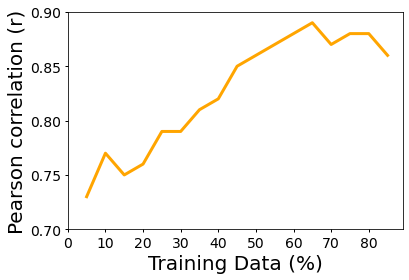

In [24]:
perc=[5*i for i in range(1,18) ]
plt.plot(perc,corr, color='orange', linewidth=3)
plt.xlabel('Training Data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,85 , step=10))
plt.yticks(np.arange(0.7,0.91, step=0.05))
plt.show()

# NO2 #

In [25]:
import pandas as pd
import scipy.io
import numpy as np
mat = scipy.io.loadmat('NO2final.mat')
#cardio_df = pd.DataFrame(mat)

len(mat['NO2final'])
L_NO2final=[]
for i in range(len(mat['NO2final'])):
    L_NO2final.append(list(mat['NO2final'][i]))

NO2_data=pd.DataFrame(L_NO2final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=NO2_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
NO2_data['Date'] = Date.tolist()
NO2_data=NO2_data.set_index('Date')
NO2_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('NO2_raw.mat')

L_NO2_raw=[]
for i in range(len(mat['NO2_raw'])):
    L_NO2_raw.append(list(mat['NO2_raw'][i]))

NO2_raw=pd.DataFrame(L_NO2_raw,columns=['WE', 'AE','Temp','RH','Time'])
NO2_raw.head()
NO2_data.insert(loc = 0,
          column = 'WE',
          value = NO2_raw['WE'].to_list())

NO2_data.insert(loc = 1,
          column = 'AE',
          value = NO2_raw['AE'].to_list())


NO2_data=NO2_data.interpolate()
WE=np.array(NO2_data['WE'].to_list())
AE=np.array(NO2_data['AE'].to_list())
Signal=list(WE-AE)
NO2_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)
NO2_data.head()

WE          AE     Signal         Lab1  \
Date                                                                  
2019-10-02 12:00:00  157.696563  149.846563   7.850000   460.448301   
2019-10-02 13:00:00    0.586429   39.937143 -39.350714  1186.045510   
2019-10-02 16:00:00   17.601343   40.504328 -22.902985  1293.158435   
2019-10-02 17:00:00  190.049701  180.774030   9.275672   219.575228   
2019-10-03 16:00:00  226.502857  202.540000  23.962857    86.725922   

                          Lab2        Lab3         Lab4       Temp         RH  \
Date                                                                            
2019-10-02 12:00:00  11.259601  -54.281210  -844.685734  26.378438  58.063437   
2019-10-02 13:00:00 -64.843326 -173.647930 -1383.373409  25.502791  59.868837   
2019-10-02 16:00:00  11.194037 -180.488333 -1212.985070  30.827910  49.008060   
2019-10-02 17:00:00  -6.131452  -65.833055  -658.643041  30.047164  51.259851   
2019-10-03 16:00:00  23.809224  -16.484097  -552.026071  29.441429  52.018571   

                           Ref  
Date                            
2019-10-02 12:00:00   9.613288  
2019-10-02 13:00:00  15.181394  
2019-10-02 16:00:00  13.091546  
2019-10-02 17:00:00  18.506848  
2019-10-03 16:00:00  14.396420

In [29]:
X=NO2_data[['WE','AE','Temp','RH']]
y=NO2_data['Ref']

In [30]:
corr=[]
for i in range(1,18):
    model=regressor.fit(X[:int(0.05*i*X.shape[0])], 
                         y[:int(0.05*i*X.shape[0])])
    pred=model.predict(X[int(0.05*i*X.shape[0]):])
    rmse=round(np.corrcoef(y[int(0.05*i*X.shape[0]):], pred)[0, 1],2)
    corr.append(rmse)

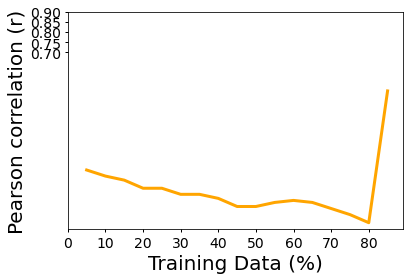

In [31]:
perc=[5*i for i in range(1,18) ]
plt.plot(perc,corr, color='orange', linewidth=3)
plt.xlabel('Training Data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,85 , step=10))
plt.yticks(np.arange(0.7,0.91, step=0.05))
plt.show()

# O3 #

In [32]:
import pandas as pd
import scipy.io
import numpy as np
mat= scipy.io.loadmat('O3.mat')
Mat=mat
L_O3final=[]
for i in range(len(mat['O3final_1'])):
    L_O3final.append(list(mat['O3final_1'][i]))

O3_data=pd.DataFrame(L_O3final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=O3_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
O3_data['Date'] = Date.tolist()
O3_data=O3_data.set_index('Date')
O3_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('O3_raw.mat')

L_O3_raw=[]
for i in range(len(mat['O3_raw'])):
    L_O3_raw.append(list(mat['O3_raw'][i]))

O3_raw=pd.DataFrame(L_O3_raw,columns=['WE', 'AE','Temp','RH','Time'])
O3_raw.head()
O3_data.insert(loc = 0,
          column = 'WE',
          value = O3_raw['WE'].to_list())

O3_data.insert(loc = 1,
          column = 'AE',
          value = O3_raw['AE'].to_list())


O3_data=O3_data.interpolate()
WE=np.array(O3_data['WE'].to_list())
AE=np.array(O3_data['AE'].to_list())
Signal=list(WE-AE)
O3_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)
O3_data.head()


WE          AE     Signal         Lab1  \
Date                                                                  
2019-10-02 12:00:00  229.020000  232.625625  -3.605625   621.625704   
2019-10-02 13:00:00  284.284762  207.033333  77.251429  1835.510709   
2019-10-02 16:00:00  199.551940  131.729254  67.822687  2195.698656   
2019-10-02 17:00:00  234.016418  225.462090   8.554328   386.251890   
2019-10-03 16:00:00  234.671429  229.311429   5.360000   200.100352   

                           Lab2        Lab3         Lab4       Temp  \
Date                                                                  
2019-10-02 12:00:00   67.962148  -12.822516  -987.063805  26.378438   
2019-10-02 13:00:00  293.683054  159.572059 -1331.518231  25.502791   
2019-10-02 16:00:00  615.567710  379.302767  -893.337914  30.827910   
2019-10-02 17:00:00  108.049071   34.461730  -696.227364  30.047164   
2019-10-03 16:00:00  122.550133   72.885162  -587.216200  29.441429   

                            RH        Ref  
Date                                       
2019-10-02 12:00:00  58.063437  52.449447  
2019-10-02 13:00:00  59.868837  50.464425  
2019-10-02 16:00:00  49.008060  37.972231  
2019-10-02 17:00:00  51.259851  33.446343  
2019-10-03 16:00:00  52.018571  33.071706

In [33]:
X=O3_data[['WE','AE','Temp','RH']]
y=O3_data['Ref']

In [34]:
corr=[]
for i in range(1,18):
    model=regressor.fit(X[:int(0.05*i*X.shape[0])], 
                         y[:int(0.05*i*X.shape[0])])
    pred=model.predict(X[int(0.05*i*X.shape[0]):])
    rmse=round(np.corrcoef(y[int(0.05*i*X.shape[0]):], pred)[0, 1],2)
    corr.append(rmse)

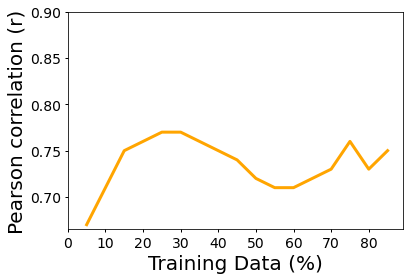

In [35]:
perc=[5*i for i in range(1,18) ]
plt.plot(perc,corr, color='orange', linewidth=3)
plt.xlabel('Training Data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,85 , step=10))
plt.yticks(np.arange(0.7,0.91, step=0.05))
plt.show()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")
data4=pd.read_csv("Data_2020.csv")
data5=pd.read_csv("Data_PM_2017.csv")
data6=pd.read_csv("Data_PM_2018.csv")
data7=pd.read_csv("Data_PM_2019.csv")
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()
s_code1=data1['station_code'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()
s_code2=data2['station_code'].to_list()


p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()
s_code3=data3['station_code'].to_list()

p_id4=data4['pollutant_id'].to_list()
date4=data4['date_time'].to_list()
p_value4=data4['pollutant_value'].to_list()


p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3
s_code=s_code1+s_code2+s_code3

#Particulate matter
p_id5=data5['Pollutant_Id'].to_list()
#date5=data5['date_time'].to_list()
p_value5=data5['Pollutant_Value'].to_list()
s_code5=data5['Station_code'].to_list()

p_id6=data6['pollutant_id'].to_list()
#date6=data6['date_time'].to_list()
p_value6=data6['pollutant_value'].to_list()
s_code6=data6['station_code'].to_list()


p_id7=data7['pollutant_id'].to_list()
#date7=data7['date_time'].to_list()
p_value7=data7['pollutant_value'].to_list()
s_code7=data7['station_code'].to_list()

P_id=p_id5+p_id6+p_id7
P_value=p_value5+p_value6+p_value7
S_code=s_code5+s_code6+s_code7

 ##  NICOSIA TRAFFIC

In [4]:
date_NT=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==1]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==1]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==1)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==1)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==1)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_NT=[[date_NT[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_NT))] 
data_NT= pd.DataFrame(data_NT, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_NT["CO"] = pd.to_numeric(data_NT["CO"], downcast="float")
data_NT["NO_2"] = pd.to_numeric(data_NT["NO_2"], downcast="float")
data_NT["SO_2"] = pd.to_numeric(data_NT["SO_2"], downcast="float")
data_NT["O_3"] = pd.to_numeric(data_NT["O_3"], downcast="float")

column_mean1 = data_NT['CO'].mean()
column_mean2 = data_NT['NO_2'].mean()
column_mean3 = data_NT['SO_2'].mean()
column_mean4 = data_NT['O_3'].mean()

data_NT['CO'].fillna(column_mean1)
data_NT['NO_2'].fillna(column_mean2)
data_NT['SO_2'].fillna(column_mean3)
data_NT['O_3'].fillna(column_mean4)

data_NT['Date'] = pd.to_datetime(data_NT['Date'])
data_NT=data_NT.set_index('Date')
data_NT_O=data_NT

data_NT=data_NT.resample('D').mean()
#Nicosia Traffic
PM_2_5_NT=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==1)]
PM_10_NT=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==1)]
data_NT['PM_2.5']=PM_2_5_NT
data_NT['PM_10']=PM_10_NT
column_mean9 = data_NT['PM_2.5'].mean()
column_mean10 = data_NT['PM_10'].mean()

data_NT['PM_2.5'].fillna(column_mean9)
data_NT['PM_10'].fillna(column_mean10)
data_NT.head()


NO_2      SO_2        O_3          CO  PM_2.5  PM_10
Date                                                                 
2017-01-01  22.656250  1.409583  31.888332  632.104187    17.4   30.5
2017-01-02  53.323479  1.470435  34.365417  888.864807    16.1   21.1
2017-01-03  40.632275  2.226364  46.317081  535.313354    30.4   80.7
2017-01-04  20.976250  0.873750  77.764168  315.857483    35.1   86.3
2017-01-05  18.100000  3.159167  89.449165  270.007507    28.7   70.2

In [5]:
data_NT.describe()

NO_2         SO_2          O_3           CO       PM_2.5  \
count  1091.000000  1093.000000  1094.000000  1092.000000  1020.000000   
mean     30.552916     2.724416    56.590080   503.460266    17.622353   
std      12.430579     1.524104    23.430660   236.155304     6.828044   
min       4.437500     0.111667    11.179167   161.383179     3.000000   
25%      20.973541     1.520833    35.293701   337.561981    13.000000   
50%      29.250000     2.521667    59.215401   418.735962    16.500000   
75%      39.214584     3.591667    76.068756   611.567383    20.800000   
max      75.320831     9.293750   110.616669  2130.129150    62.100000   

             PM_10  
count  1067.000000  
mean     43.386223  
std      28.948460  
min      10.600000  
25%      30.000000  
50%      37.500000  
75%      47.100000  
max     569.700000

## NICOSIA RESIDENCE

In [6]:
date_NR=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==2]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==2]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==2)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==2)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==2)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_NR=[[date_NR[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_NR))] 
data_NR= pd.DataFrame(data_NR, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_NR["CO"] = pd.to_numeric(data_NR["CO"], downcast="float")
data_NR["NO_2"] = pd.to_numeric(data_NR["NO_2"], downcast="float")
data_NR["SO_2"] = pd.to_numeric(data_NR["SO_2"], downcast="float")
data_NR["O_3"] = pd.to_numeric(data_NR["O_3"], downcast="float")

column_mean5 = data_NR['CO'].mean()
column_mean6 = data_NR['NO_2'].mean()
column_mean7 = data_NR['SO_2'].mean()
column_mean8 = data_NR['O_3'].mean()

data_NR['CO'].fillna(column_mean5)
data_NR['NO_2'].fillna(column_mean6)
data_NR['SO_2'].fillna(column_mean7)
data_NR['O_3'].fillna(column_mean8)

data_NR['Date'] = pd.to_datetime(data_NR['Date'])
data_NR=data_NR.set_index('Date')
data_NR_O=data_NR
data_NR=data_NR.resample('D').mean()
PM_2_5_NR=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==2)]
PM_10_NR=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==2)]
data_NR['PM_2.5']=PM_2_5_NR
data_NR['PM_10']=PM_10_NR
column_mean11 = data_NR['PM_2.5'].mean()
column_mean12 = data_NR['PM_10'].mean()

data_NR['PM_2.5'].fillna(column_mean11)
data_NR['PM_10'].fillna(column_mean12)

data_NR.head()


NO_2      SO_2         O_3          CO  PM_2.5  PM_10
Date                                                                  
2017-01-01  22.525000  2.425000   35.771667  553.710815    16.3   26.7
2017-01-02  31.235834  3.890417   43.341667  629.263916    16.3   20.9
2017-01-03  22.701668  3.487917   56.488750  304.118683    17.9   32.1
2017-01-04  17.751667  2.367500   78.111252  299.715424    26.2   48.6
2017-01-05  11.007916  2.674167  101.402084  150.582916    24.6   44.5

In [7]:
data_NR.describe()

NO_2         SO_2          O_3           CO       PM_2.5  \
count  1091.000000  1093.000000  1094.000000  1090.000000  1022.000000   
mean     21.873568     1.978501    68.560783   308.482452    14.992857   
std      11.902061     1.115598    23.170956   160.722107     6.087932   
min       4.245833     0.000000    15.056521    17.467501     1.700000   
25%      12.418188     1.220833    49.006149   198.868439    11.100000   
50%      18.887501     1.803333    69.943756   263.924561    14.200000   
75%      29.322292     2.504167    87.273094   377.548126    17.775000   
max      65.085716     7.175000   129.175003  1169.722534    78.100000   

             PM_10  
count  1032.000000  
mean     35.353973  
std      28.894236  
min       9.600000  
25%      24.800000  
50%      29.900000  
75%      36.900000  
max     624.200000

## EMEP-Ayia Marina -Background

In [8]:
date_Z=[date[i] for i in range(len(p_id)) if p_id[i]==6 and s_code[i]==9]
NO_2=[p_value[i] for i in range(len(p_id)) if p_id[i]==2 and  s_code[i]==8]
SO_2=[p_value[i] for i in range(len(p_id)) if(p_id[i]==4 and s_code[i]==9)]
O_3=[p_value[i] for i in range(len(p_id)) if(p_id[i]==5 and s_code[i]==9)]
CO=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6 and s_code[i]==9)]
for i in range(len(CO)):
    if (CO[i]=='BDL'):
        CO[i]='nan'
    elif NO_2[i]=='BDL':
        NO_2[i]='nan'
    elif SO_2[i]=='BDL':
        SO_2[i]='nan'
    elif O_3[i]=="BDL":
        O_3[i]='nan'
    else:
        pass

for i in range(len(CO)):
    if (CO[i]=='nan'):
        CO[i]='0'
    elif SO_2[i]=='nan':
        SO_2[i]='0'
    elif NO_2[i]=='nan':
        NO_2[i]='0'
    elif O_3[i]=='nan':
        O_3[i]='0'
    else:
        pass
    
for i in range(len(SO_2)):
    if SO_2[i]=='BDL':
        SO_2[i]='nan'
for i in range(len(O_3)):
    if O_3[i]=='BDL':
        O_3[i]='nan'
for i in range(len(SO_2)):
    if (SO_2[i]=='nan'):
        SO_2[i]='0'
for i in range(len(O_3)):
    if (O_3[i]=='nan'):
        O_3[i]='0'
    
    
data_Z=[[date_Z[i],NO_2[i],SO_2[i],O_3[i], CO[i]] for i in range(len(date_Z))] 
data_Z= pd.DataFrame(data_Z, columns = ['Date','NO_2','SO_2','O_3', 'CO'])
data_Z["CO"] = pd.to_numeric(data_Z["CO"], downcast="float")
data_Z["NO_2"] = pd.to_numeric(data_Z["NO_2"], downcast="float")
data_Z["SO_2"] = pd.to_numeric(data_Z["SO_2"], downcast="float")
data_Z["O_3"] = pd.to_numeric(data_Z["O_3"], downcast="float")

column_mean13 = data_Z['CO'].mean()
column_mean14 = data_Z['NO_2'].mean()
column_mean15 = data_Z['SO_2'].mean()
column_mean16 = data_Z['O_3'].mean()

data_Z['CO'].fillna(column_mean13)
data_Z['NO_2'].fillna(column_mean14)
data_Z['SO_2'].fillna(column_mean15)
data_Z['O_3'].fillna(column_mean16)
data_Z['Date'] = pd.to_datetime(data_Z['Date'])
data_Z=data_Z.set_index('Date')
data_Z_O=data_Z
data_Z=data_Z.resample('D').mean()
PM_2_5_Z=[P_value[i] for i in range(len(P_id)) if(P_id[i]==26 and S_code[i]==9)]
PM_10_Z=[P_value[i] for i in range(len(P_id)) if(P_id[i]==25 and S_code[i]==9)]
PM_10_Z[0]=6.9
data_Z['PM_2.5']=PM_2_5_Z
data_Z['PM_10']=PM_10_Z
column_mean17 = data_Z['PM_2.5'].mean()
column_mean18 = data_Z['PM_10'].mean()
PM_10_Z[0]=column_mean18
#data_Z['PM_2.5'].fillna(column_mean17)
#data_Z['PM_10'].fillna(column_mean18)

data_Z=data_Z.interpolate()
data_AM=data_Z
data_AM.head()


NO_2      SO_2         O_3          CO  PM_2.5  PM_10
Date                                                                  
2017-01-01   3.523750  0.750870   72.954094  177.931366     2.5    6.9
2017-01-02   7.679584  1.183333   84.351250  200.942917     2.7    5.8
2017-01-03   6.755455  2.286250   93.035004  118.492271     4.0    6.3
2017-01-04   6.279167  0.467083   92.485832  162.221664     3.3    5.1
2017-01-05  10.433333  1.863750  117.720001  157.161255     2.8    6.7

In [9]:
data_AM.describe()

NO_2         SO_2          O_3           CO       PM_2.5  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000   
mean      8.420279     1.170504    96.236687   157.305588    10.705205   
std       2.952318     0.962954    14.476766    28.529747     5.949673   
min       2.715000     0.000000    60.569565    82.362503     0.500000   
25%       6.381042     0.563333    85.797916   138.268333     6.875000   
50%       7.892917     0.966667    95.721115   153.547058     9.900000   
75%       9.839693     1.435000   106.540264   170.518753    13.400000   
max      26.083334     9.247827   144.033340   346.175018    71.000000   

             PM_10  
count  1095.000000  
mean     21.843744  
std      19.841889  
min       3.000000  
25%      12.700000  
50%      17.800000  
75%      24.090000  
max     268.900000

## Data visualization and Analytics

Text(0, 0.5, ' CO concentration (μg/m^3)')

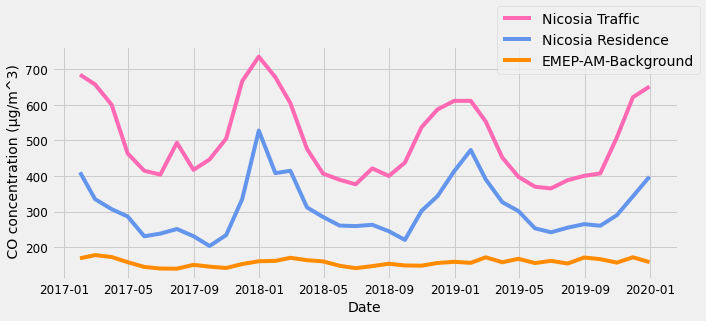

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
data_NT_by_month=data_NT.resample('M').mean()
data_NR_by_month=data_NR.resample('M').mean()
data_AM_by_month=data_AM.resample('M').mean()
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='CO',data=data_NT_by_month,color='hotpink')
sns.lineplot(x=data_NR_by_month.index,y='CO',data=data_NR_by_month,color='cornflowerblue')
sns.lineplot(x=data_AM_by_month.index,y='CO',data=data_AM_by_month,color='darkorange')
plt.legend(['Nicosia Traffic', 'Nicosia Residence', 'EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel(' CO concentration (μg/m^3)')

Text(0, 0.5, '$NO_{2}$ Concentration (µg/m³)')

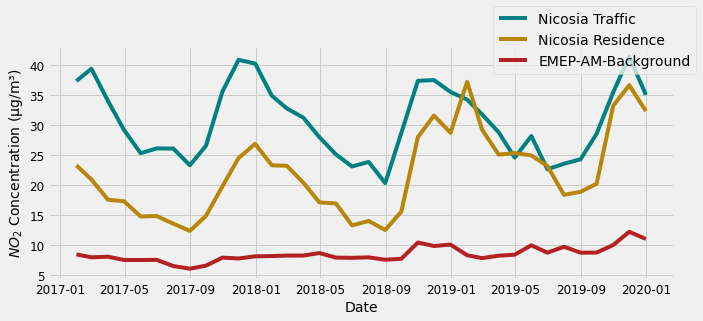

In [11]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='NO_2',data=data_NT_by_month,color='teal')
sns.lineplot(x=data_NR_by_month.index,y='NO_2',data=data_NR_by_month,color='darkgoldenrod')
sns.lineplot(x=data_AM_by_month.index,y='NO_2',data=data_AM_by_month,color='firebrick')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$NO_{2}$'  + ' Concentration (µg/m³)')

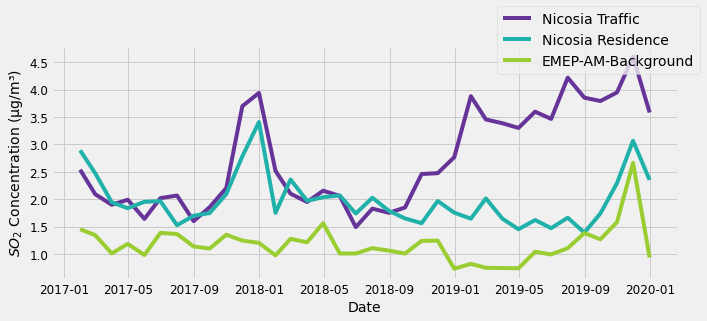

In [12]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='SO_2',data=data_NT_by_month,color='rebeccapurple')
sns.lineplot(x=data_NR_by_month.index,y='SO_2',data=data_NR_by_month,color='lightseagreen')
sns.lineplot(x=data_AM_by_month.index,y='SO_2',data=data_AM_by_month,color='yellowgreen')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'],loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.show()

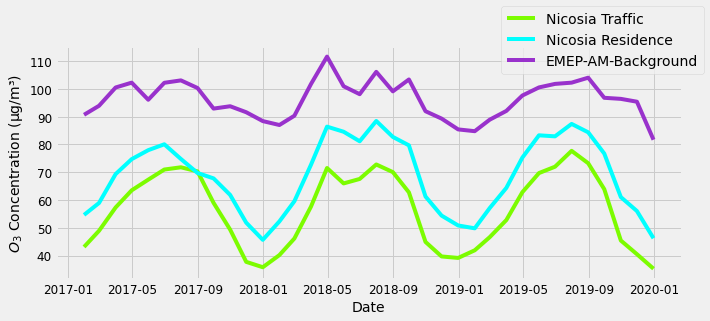

In [13]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='O_3',data=data_NT_by_month,color='lawngreen')
sns.lineplot(x=data_NR_by_month.index,y='O_3',data=data_NR_by_month,color='cyan')
sns.lineplot(x=data_AM_by_month.index,y='O_3',data=data_AM_by_month,color='darkorchid')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.show()

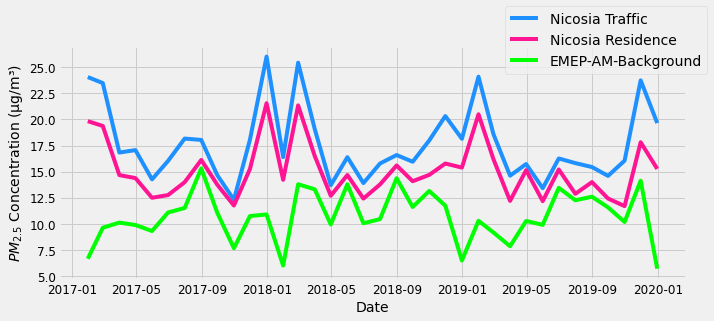

In [14]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='PM_2.5',data=data_NT_by_month,color='dodgerblue')
sns.lineplot(x=data_NR_by_month.index,y='PM_2.5',data=data_NR_by_month,color='deeppink')
sns.lineplot(x=data_AM_by_month.index,y='PM_2.5',data=data_AM_by_month,color='lime')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.show()

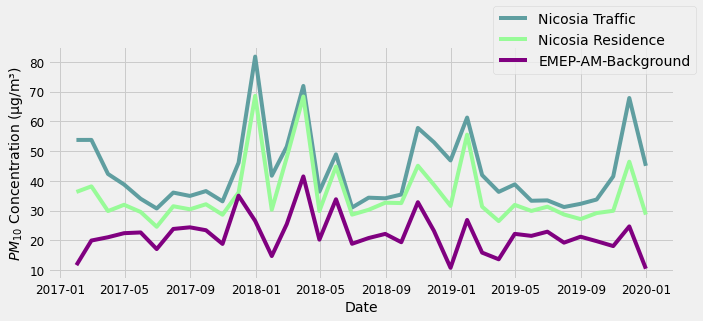

In [15]:
fig= plt.figure(figsize=(10,4))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_NT_by_month.index,y='PM_10',data=data_NT_by_month,color='cadetblue')
sns.lineplot(x=data_NR_by_month.index,y='PM_10',data=data_NR_by_month,color='palegreen')
sns.lineplot(x=data_AM_by_month.index,y='PM_10',data=data_AM_by_month,color='purple')
plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.show()

In [16]:
data_NT['Year']=data_NT.index.year
data_NT['Month']=data_NT.index.month
data_NT['Day_of_week']=data_NT.index.dayofweek
data_NT['Day']=data_NT.index.day
data_NT['Hour']=data_NT.index.hour
data_NT['Year']=data_NT.index.year
data_NT_O['Hour']=data_NT_O.index.hour

In [17]:
data_NR['Year']=data_NT.index.year
data_NR['Month']=data_NR.index.month
data_NR['Day_of_week']=data_NR.index.dayofweek
data_NR['Day']=data_NR.index.day
data_NR['Hour']=data_NR.index.hour
data_NR['Year']=data_NR.index.year
data_NR_O['Hour']=data_NR_O.index.hour

In [18]:
data_AM['Year']=data_NT.index.year
data_AM['Month']=data_AM.index.month
data_AM['Day_of_week']=data_AM.index.dayofweek
data_AM['Day']=data_AM.index.day
data_AM['Hour']=data_AM.index.hour
data_AM['Year']=data_AM.index.year
data_Z_O['Hour']=data_Z_O.index.hour

In [19]:
frames = [data_NT, data_NR, data_AM]
result = pd.concat(frames)
A=['Nicosia Traffic' for i in range(1095)]
B=['Nicosia Residence' for i in range(1095)]
C=['EMEP-AM-Background' for i in range(1095)]
D=A+B+C
result['Station']=D
#result.head()

In [20]:
frame = [data_NT_O, data_NR_O, data_Z_O]
original = pd.concat(frame)
E=['Nicosia Traffic' for i in range(26280)]
F=['Nicosia Residence' for i in range(26280)]
G=['EMEP-AM-Background' for i in range(26280)]
H=E+F+G
original['Station']=H
#original.head()

## Hourly Visualization

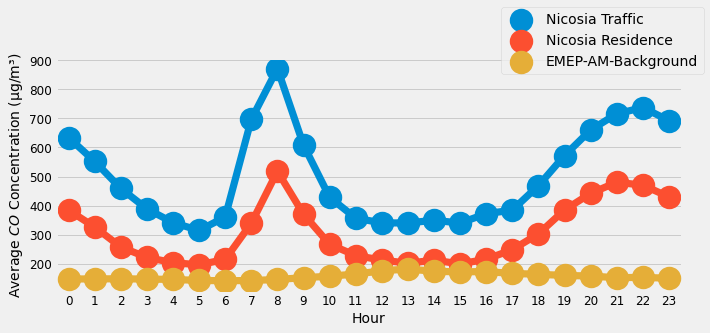

In [21]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="CO", hue="Station", data=original,
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

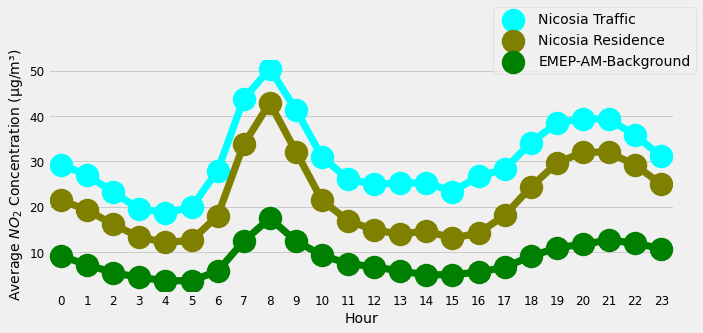

In [22]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="NO_2", hue="Station", data=original,palette=['cyan','olive','green'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

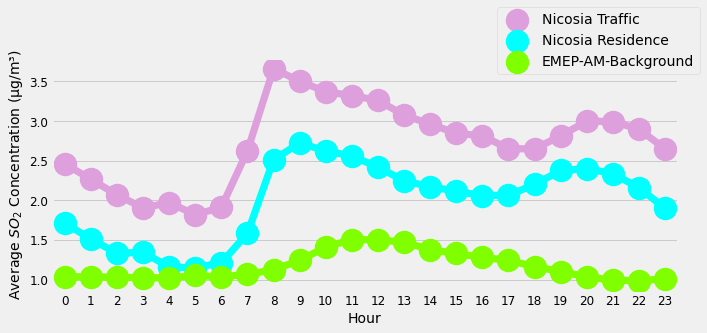

In [23]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="SO_2", hue="Station", data=original,palette=['plum','aqua','chartreuse'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

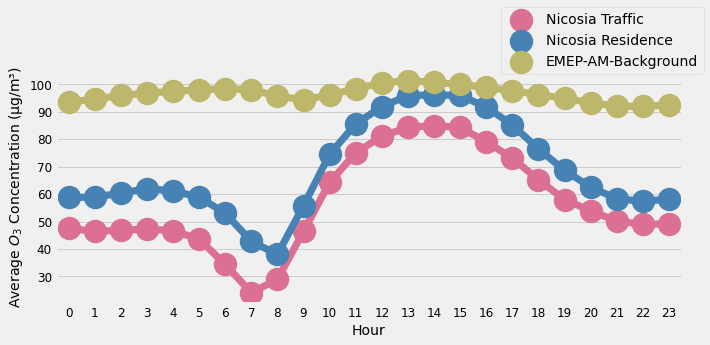

In [24]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Hour", y="O_3", hue="Station", data=original,palette=['palevioletred','steelblue','darkkhaki'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.3))
plt.show()

## Day of Week visualization

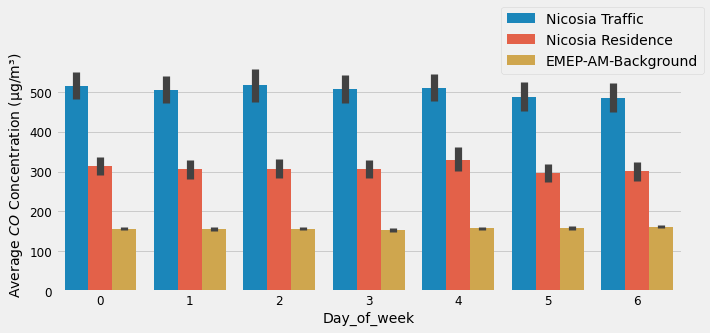

In [25]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="CO", hue="Station", data=result)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

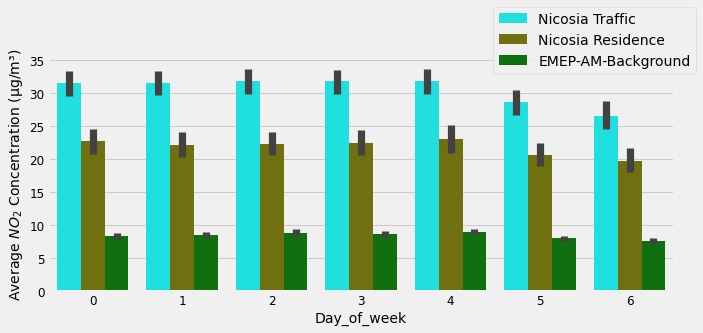

In [26]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="NO_2", hue="Station", data=result, palette=['cyan','olive','green'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

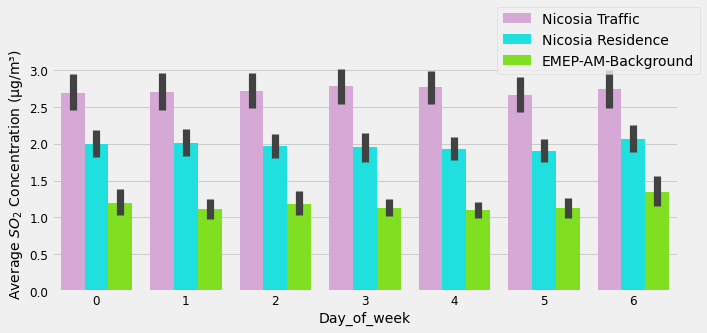

In [27]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="SO_2", hue="Station", data=result, palette=['plum','aqua','chartreuse'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

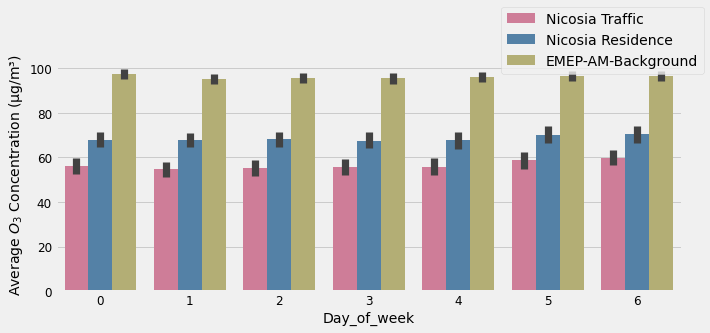

In [28]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="O_3", hue="Station", data=result, palette=['palevioletred','steelblue','darkkhaki'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

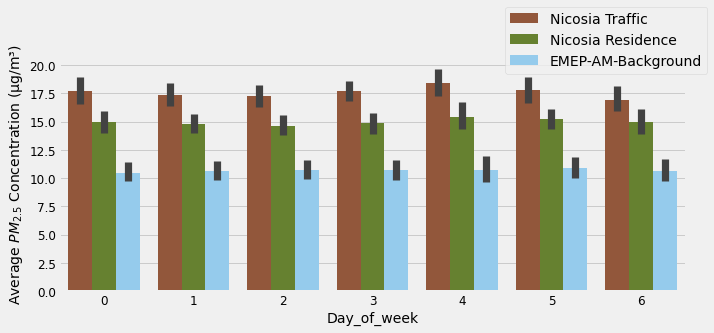

In [29]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="PM_2.5", hue="Station", data=result, palette=['sienna','olivedrab','lightskyblue'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

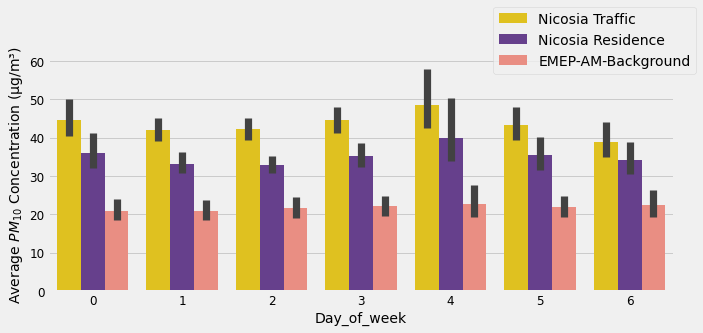

In [30]:
fig= plt.figure(figsize=(10,4))
sns.barplot(x="Day_of_week", y="PM_10", hue="Station", data=result, palette=['gold','rebeccapurple','salmon'])
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

## Monthly Visualization

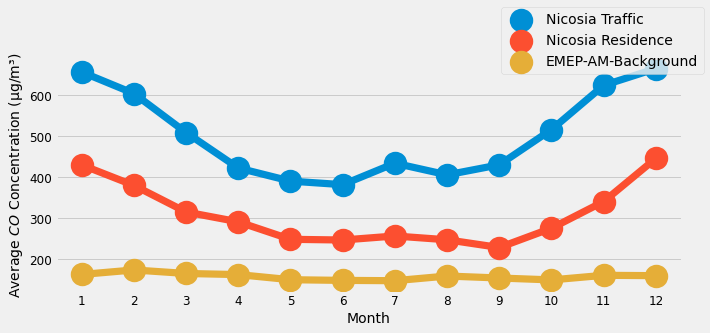

In [31]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="CO", hue="Station", data=result,
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$CO_{}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

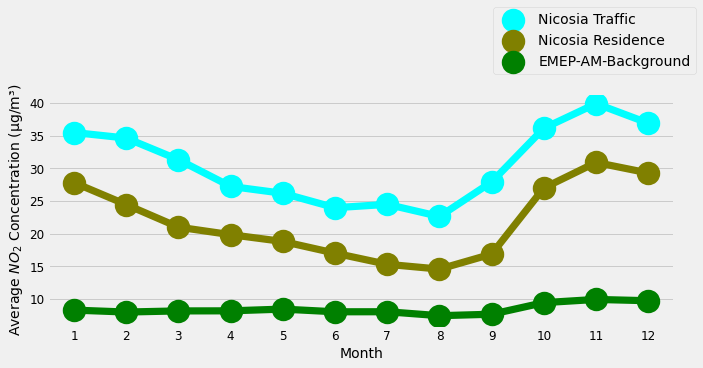

In [32]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="NO_2", hue="Station", data=result,palette=['cyan','olive','green'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$NO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.show()

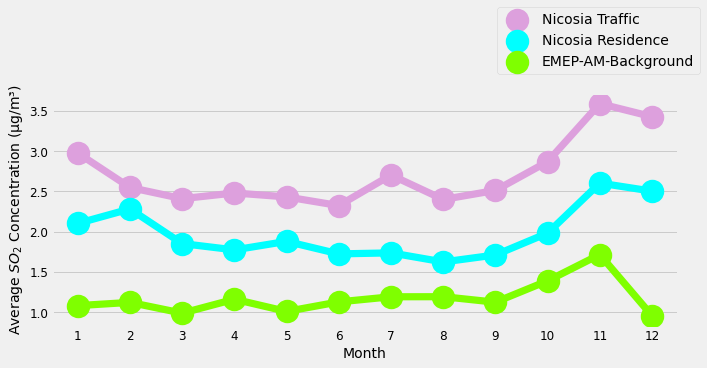

In [33]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="SO_2", hue="Station", data=result,palette=['plum','aqua','chartreuse'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$SO_{2}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.show()

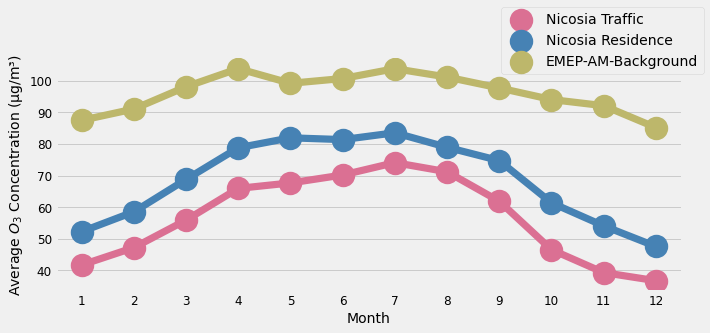

In [34]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="O_3", hue="Station", data=result,palette=['palevioletred','steelblue','darkkhaki'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$O_{3}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

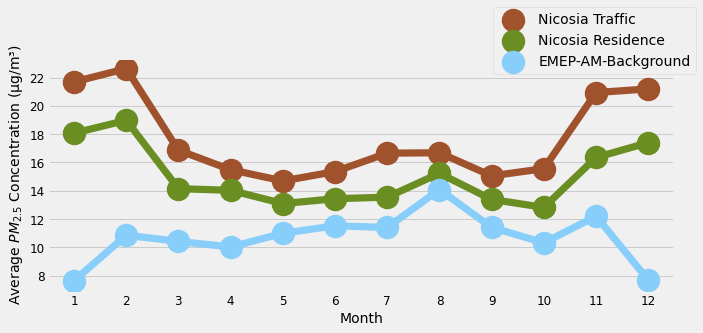

In [35]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="PM_2.5", hue="Station", data=result,palette=['sienna','olivedrab','lightskyblue'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{2.5}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

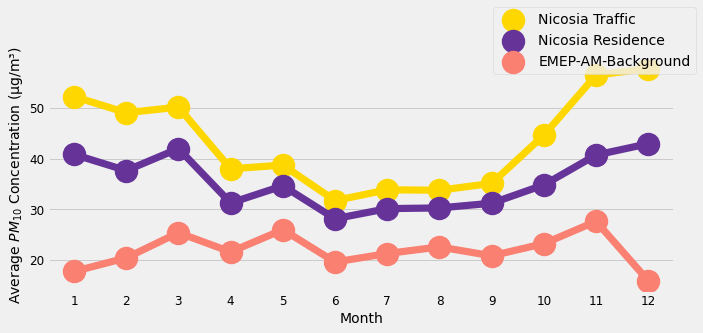

In [36]:
fig= plt.figure(figsize=(10,4))
sns.pointplot(x="Month", y="PM_10", hue="Station", data=result,palette=['gold','rebeccapurple','salmon'],
              ci=None)
#plt.legend(['Nicosia Traffic', 'Nicosia Residence','EMEP-AM-Background'], loc = 2, bbox_to_anchor = (0.7,1.2))
plt.ylabel( 'Average ' + r'$PM_{10}$'  + ' Concentration (µg/m³)')
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.show()

<AxesSubplot:>

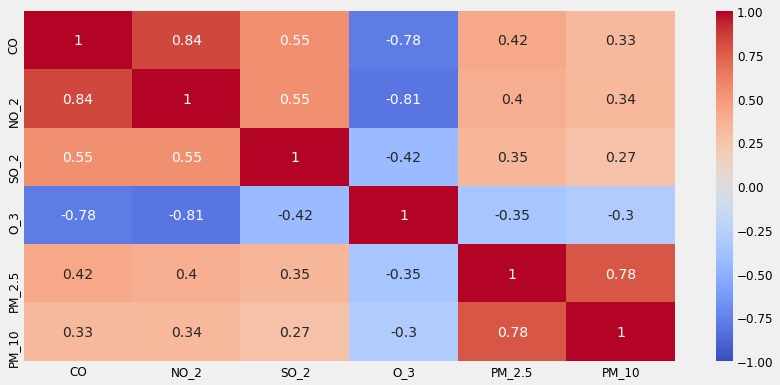

In [37]:
fig= plt.figure(figsize=(13,6))
sns.heatmap(result[['CO','NO_2','SO_2','O_3','PM_2.5','PM_10']].corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')


## AQI Nicosia Traffic

In [38]:
NO_2=data_NT['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)

In [39]:
O_3=data_NT['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)
len(I_O_3)

1095

In [40]:
PM_2_5=data_NT['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)
    
len(I_PM_2_5)

1095

In [41]:
PM_10=data_NT['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [42]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy') 
    
data_NT['AQI']=AQI
data_NT['Pollution Level']=l_pollution
data_NT.head()

NO_2      SO_2        O_3          CO  PM_2.5  PM_10  Year  \
Date                                                                          
2017-01-01  22.656250  1.409583  31.888332  632.104187    17.4   30.5  2017   
2017-01-02  53.323479  1.470435  34.365417  888.864807    16.1   21.1  2017   
2017-01-03  40.632275  2.226364  46.317081  535.313354    30.4   80.7  2017   
2017-01-04  20.976250  0.873750  77.764168  315.857483    35.1   86.3  2017   
2017-01-05  18.100000  3.159167  89.449165  270.007507    28.7   70.2  2017   

            Month  Day_of_week  Day  Hour     AQI Pollution Level  
Date                                                               
2017-01-01      1            6    1     0   30.50            Good  
2017-01-02      1            0    2     0   26.83            Good  
2017-01-03      1            1    3     0  101.00       Unhealthy  
2017-01-04      1            2    4     0   72.69        Moderate  
2017-01-05      1            3    5     0   62.62        Moderate

## AQI Nicosia Residence

In [43]:
NO_2=data_NR['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)


In [44]:
O_3=data_NR['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)

In [45]:
PM_2_5=data_NR['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)

In [46]:
PM_10=data_NR['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [47]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy') 
        
data_NR['AQI']=AQI
data_NR['Pollution Level']=l_pollution
data_NR.head()

NO_2      SO_2         O_3          CO  PM_2.5  PM_10  Year  \
Date                                                                           
2017-01-01  22.525000  2.425000   35.771667  553.710815    16.3   26.7  2017   
2017-01-02  31.235834  3.890417   43.341667  629.263916    16.3   20.9  2017   
2017-01-03  22.701668  3.487917   56.488750  304.118683    17.9   32.1  2017   
2017-01-04  17.751667  2.367500   78.111252  299.715424    26.2   48.6  2017   
2017-01-05  11.007916  2.674167  101.402084  150.582916    24.6   44.5  2017   

            Month  Day_of_week  Day  Hour    AQI Pollution Level  
Date                                                              
2017-01-01      1            6    1     0  27.17            Good  
2017-01-02      1            0    2     0  27.17            Good  
2017-01-03      1            1    3     0  32.10            Good  
2017-01-04      1            2    4     0  48.60            Good  
2017-01-05      1            3    5     0  44.50            Good

## EMEP-AM-Background

In [48]:
NO_2=data_AM['NO_2'].to_list()
I_NO_2=[]
for i in range(len(NO_2)):
    if NO_2[i]>=0 and NO_2[i]<=50:
        I=((25-0)/(50-0))*(NO_2[i]-0)+0
    elif NO_2[i]>=51 and NO_2[i]<=100:
        I=((50-25)/(100-50))*(NO_2[i]-50)+25
    elif NO_2[i]>=101 and NO_2[i]<=200:
        I=((75-50)/(200-100))*(NO_2[i]-100)+50
    elif NO_2[i]>=201 and NO_2[i]<=400:
        I=((100-75)/(400-200))*(NO_2[i]-200)+75
    else:
        I=101
    I_NO_2.append(I)


In [49]:
O_3=data_AM['O_3'].to_list()
I_O_3=[]
for i in range(len(O_3)):
    if O_3[i]>=0 and O_3[i]<=60:
        I=((25-0)/(60-0))*(O_3[i]-0)+0
    elif O_3[i]>=61 and O_3[i]<=120:
        I=((50-25)/(120-60))*(O_3[i]-60)+25
    elif O_3[i]>=121 and O_3[i]<=180:
        I=((75-50)/(180-120))*(O_3[i]-120)+50
    elif O_3[i]>=181 and O_3[i]<=240:
        I=((100-75)/(240-180))*(O_3[i]-180)+75
    else:
        I=101
    I_O_3.append(I)

In [50]:
PM_2_5=data_AM['PM_2.5'].to_list()
I_PM_2_5=[]
for i in range(len(PM_2_5)):
    if PM_2_5[i]>=0 and PM_2_5[i]<=15:
        I=((25-0)/(15-0))*(PM_2_5[i]-0)+0
    elif PM_2_5[i]>=16 and PM_2_5[i]<=30:
        I=((50-25)/(30-15))*(PM_2_5[i]-15)+25
    elif PM_2_5[i]>=31 and PM_2_5[i]<=55:
        I=((75-50)/(55-30))*(PM_2_5[i]-30)+50
    elif PM_2_5[i]>=56 and PM_2_5[i]<=110:
        I=((100-75)/(110-55))*(PM_2_5[i]-55)+75
    else:
        I=101
    I_PM_2_5.append(I)

In [51]:
PM_10=data_AM['PM_10'].to_list()
I_PM_10=[]
for i in range(len(PM_10)):
    if PM_10[i]>=0 and PM_10[i]<=25:
        I=((25-0)/(25-0))*(PM_10[i]-0)+0
    elif PM_10[i]>=26 and PM_10[i]<=50:
        I=((50-25)/(50-25))*(PM_10[i]-25)+25
    elif PM_10[i]>=51 and PM_10[i]<=90:
        I=((75-50)/(90-50))*(PM_10[i]-50)+50
    elif PM_10[i]>=91 and PM_10[i]<=180:
        I=((100-75)/(180-90))*(PM_10[i]-90)+75
    else:
        I=101
    I_PM_10.append(I)

In [52]:
l=[[I_NO_2[i],I_O_3[i],I_PM_2_5[i],I_PM_10[i]] for i in range(1095)]
AQI=[np.round(max(l[i]),2) for i in range(1095)]
l_pollution=[]
for i in range(len(AQI)):
    if AQI[i]>=0 and AQI[i]<=50:
        l_pollution.append('Good')
    elif AQI[i]>=51 and AQI[i]<=75:
        l_pollution.append('Moderate')
    else:
        l_pollution.append('Unhealthy')   
data_AM['AQI']=AQI
data_AM['Pollution Level']=l_pollution
data_AM.head()

NO_2      SO_2         O_3          CO  PM_2.5  PM_10  Year  \
Date                                                                           
2017-01-01   3.523750  0.750870   72.954094  177.931366     2.5    6.9  2017   
2017-01-02   7.679584  1.183333   84.351250  200.942917     2.7    5.8  2017   
2017-01-03   6.755455  2.286250   93.035004  118.492271     4.0    6.3  2017   
2017-01-04   6.279167  0.467083   92.485832  162.221664     3.3    5.1  2017   
2017-01-05  10.433333  1.863750  117.720001  157.161255     2.8    6.7  2017   

            Month  Day_of_week  Day  Hour    AQI Pollution Level  
Date                                                              
2017-01-01      1            6    1     0  30.40            Good  
2017-01-02      1            0    2     0  35.15            Good  
2017-01-03      1            1    3     0  38.76            Good  
2017-01-04      1            2    4     0  38.54            Good  
2017-01-05      1            3    5     0  49.05            Good

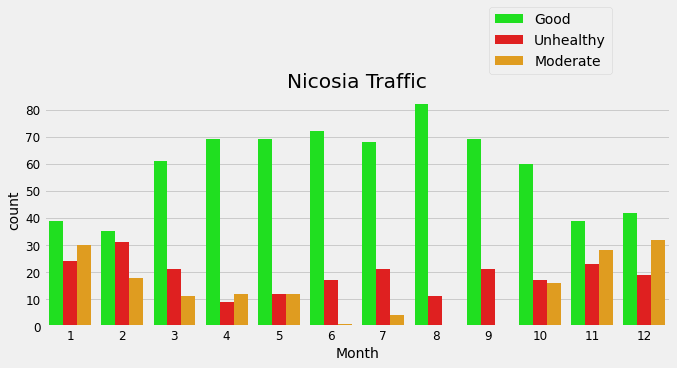

In [53]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_NT,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Traffic')
plt.show()

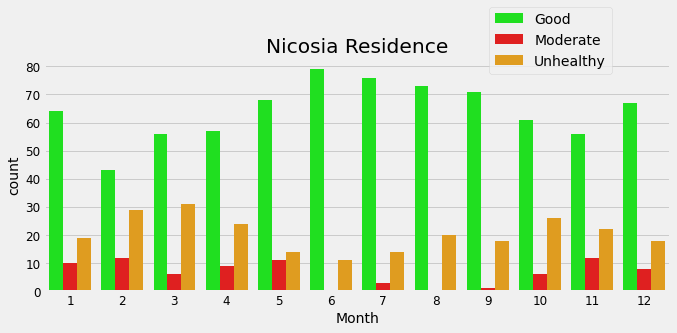

In [54]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_NR,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.title('Nicosia Residence')
plt.show()

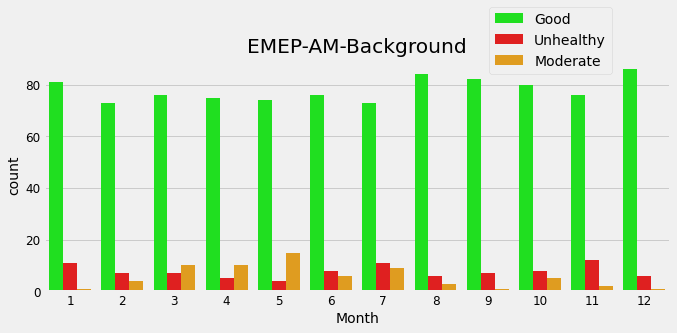

In [55]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Month', data = data_AM,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.25))
plt.title('EMEP-AM-Background')
plt.show()

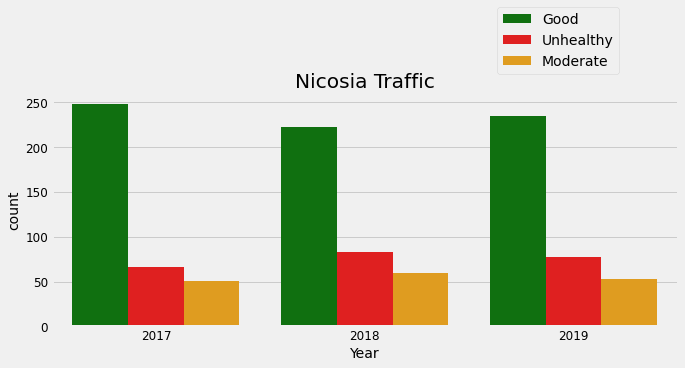

In [56]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_NT,hue='Pollution Level',palette=['green','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Traffic')
plt.show()

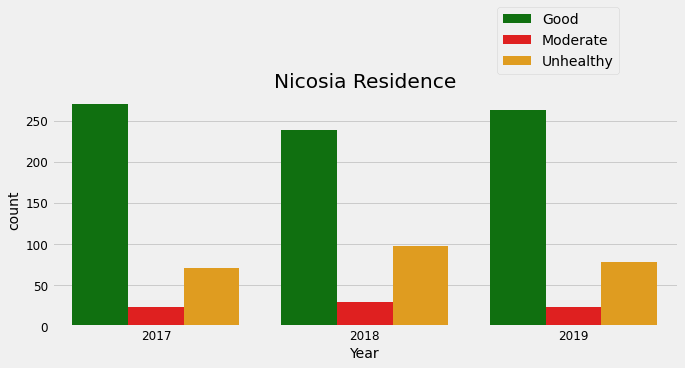

In [57]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_NR,hue='Pollution Level',palette=['green','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('Nicosia Residence')
plt.show()

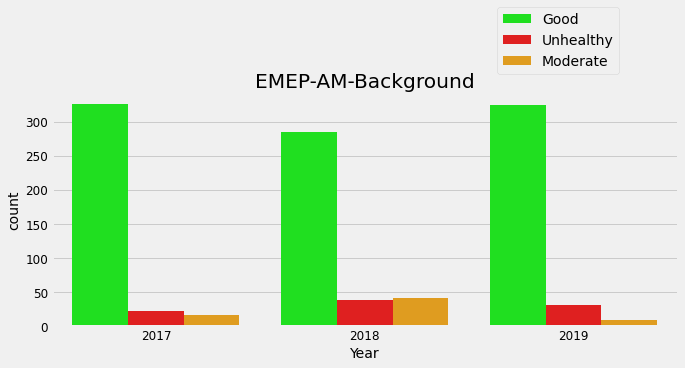

In [58]:
fig= plt.figure(figsize=(10,4))
sns.countplot(x = 'Year', data = data_AM,hue='Pollution Level',palette=['lime','red','orange'])
plt.legend(loc = 2, bbox_to_anchor = (0.7,1.4))
plt.title('EMEP-AM-Background')
plt.show()

In [59]:
import plotly.graph_objects as go
  
  
fig = go.Figure()
  
# Defining x axis
x = ['CO', 'CO', 'CO', 'PM', 'PM', 'PM']
  
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=[1, 2, 6, 4, 5, 6],
    x=x,
    name='A',
    marker_color='green'
))
  
fig.add_trace(go.Box(
    y=[2, 3, 4, 1, 2, 6],
    x=x,
    name='B',
    marker_color='yellow'
))
  
fig.add_trace(go.Box(
    y=[2, 5, 6, 7, 8, 1],
    x=x,
    name='C',
    marker_color='blue'
))
  
fig.update_layout(
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group'
)
fig.show()

In [108]:
import plotly.graph_objects as go
def scaler(x):
    A=np.array(x)
    A=(A-min(A))/(max(A)-min(A))
    A=list(A)
    return A
    

NO_2_NT=scaler(data_NT['NO_2'].to_list())
SO_2_NT=scaler(data_NT['SO_2'].to_list())
CO_NT=scaler(data_NT['CO'].to_list())
O_3_NT=scaler(data_NT['O_3'].to_list())
PM_2_5_NT=scaler(data_NT['PM_2.5'].to_list())
PM_10_NT=scaler(data_NT['PM_10'].to_list())


NO_2_NR=scaler(data_NR['NO_2'].to_list())
SO_2_NR=scaler(data_NR['SO_2'].to_list())
CO_NR=scaler(data_NR['CO'].to_list())
O_3_NR=scaler(data_NR['O_3'].to_list())
PM_2_5_NR=scaler(data_NR['PM_2.5'].to_list())
PM_10_NR=scaler(data_NR['PM_10'].to_list())

NO_2_AM=scaler(data_AM['NO_2'].to_list())
SO_2_AM=scaler(data_AM['SO_2'].to_list())
CO_AM=scaler(data_AM['CO'].to_list())
O_3_AM=scaler(data_AM['O_3'].to_list())
PM_2_5_AM=scaler(data_AM['PM_2.5'].to_list())
PM_10_AM=scaler(data_AM['PM_10'].to_list())

L_NT=NO_2_NT+SO_2_NT+CO_NT+O_3_NT+PM_2_5_NT+PM_10_NT
L_NR=NO_2_NR+SO_2_NR+CO_NR+O_3_NR+PM_2_5_NR+PM_10_NR
L_AM=NO_2_AM+SO_2_AM+CO_AM+O_3_AM+PM_2_5_AM+PM_10_AM


x1=['NO_2' for i in range(1095)]
x2=['SO_2' for i in range(1095)]
x3=['CO' for i in range(1095)]
x4=['O_3' for i in range(1095)]
x5=['PM_2.5' for i in range(1095)]
x6=['PM_10' for i in range(1095)]
x=x1+x2+x3+x4+x5+x6

fig = go.Figure()  
# Defining x axis
x = x

fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=L_NT,
    x=x,
    name='Nicosia Traffic',
    marker_color='blue'
))
  
fig.add_trace(go.Box(
    y=L_NR,
    x=x,
    name='Nicosia Residence',
    marker_color='lime'
))
  
fig.add_trace(go.Box(
    y=L_AM,
    x=x,
    name='EMEP-AM Background',
    marker_color='sienna'

))
  
fig.update_layout(
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group'
)

fig.update_xaxes(title_text="Pollutants")
fig.update_yaxes(title_text="Normalized Concentrations")
fig.show()



In [138]:
import pandas as pd
data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")

In [139]:
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()

p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)

data.head()

Date           CO
0  01/01/2017 0:00  1554.890015
1  01/01/2017 1:00  1126.829956
2  01/01/2017 2:00  2066.790039
3  01/01/2017 3:00  1713.380005
4  01/01/2017 4:00  1685.310059

In [140]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('H')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].mean()
data.head()

CO        date
Date                              
2017-01-01  470.245972  2017-01-01
2017-01-02  512.894531  2017-01-02
2017-01-03  296.407288  2017-01-03
2017-01-04  302.471497  2017-01-04
2017-01-05  220.845215  2017-01-05

In [141]:
import math
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
CO=[math.log(CO[i]) for i in range(len(CO))]
#Generating timeseries data based on the two lists
data= pd.Series(CO,Date)
CO=pd.Series(CO)


In [143]:
data.size

1095

In [ ]:
calc

<AxesSubplot:>

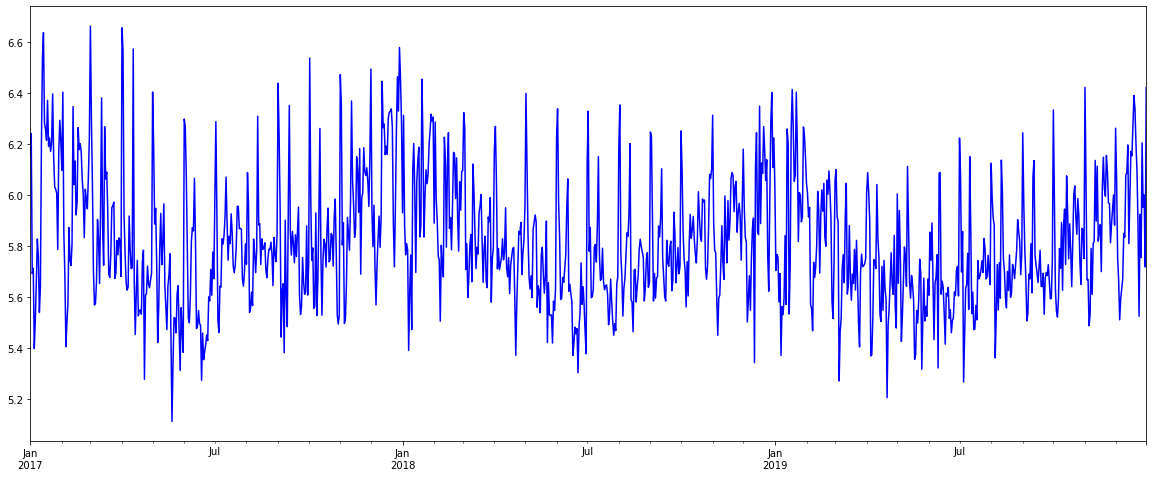

In [142]:
fig= plt.figure(figsize=(20,8))
data.plot(color='blue')

<function matplotlib.pyplot.show(close=None, block=None)>

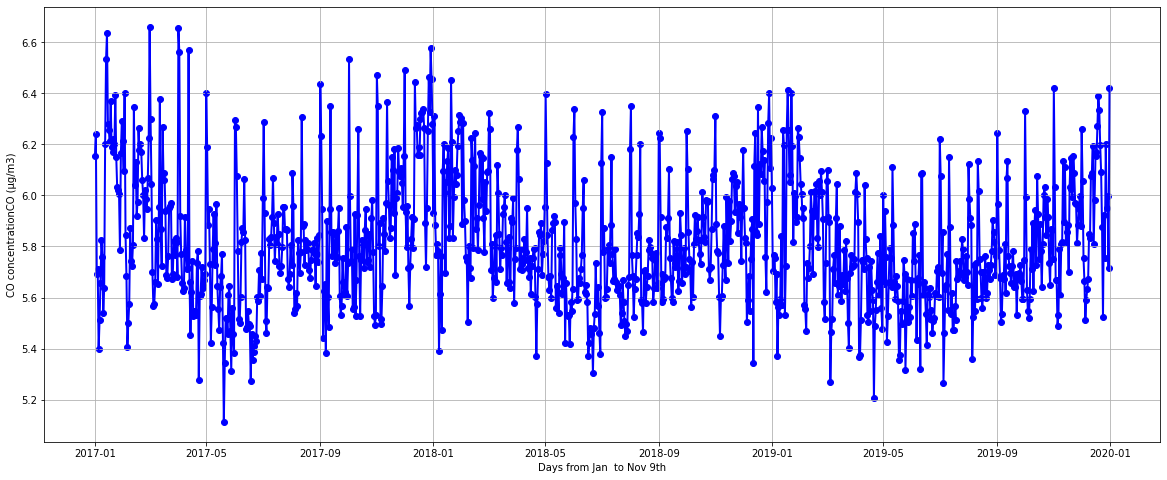

In [120]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.scatter(y.index,CO, color='blue')
plt.xlabel('Days from Jan  to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

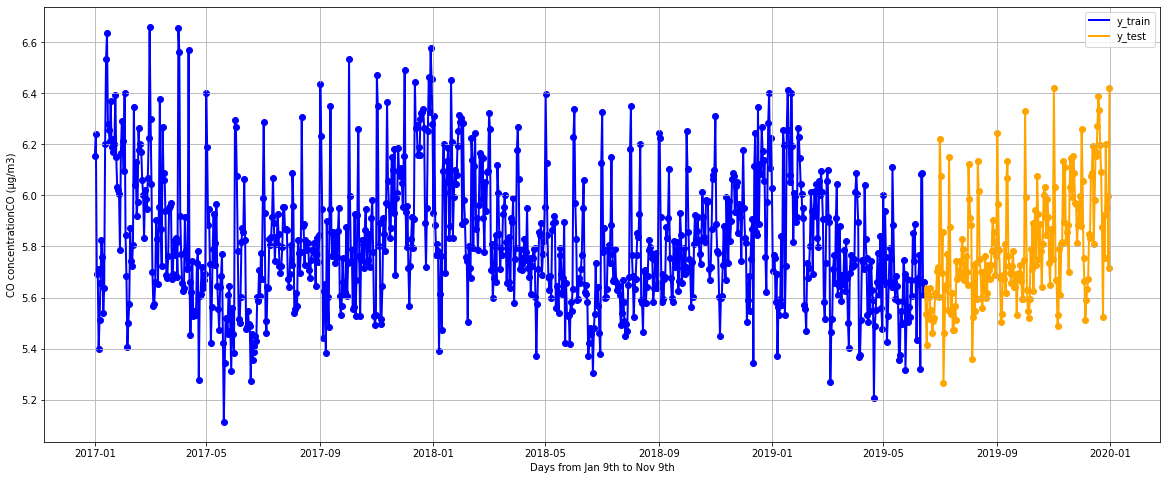

In [121]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import MASE, mase_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
ts=200
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.legend(['y_train', 'y_test'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show


In [123]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=200, freq='D', is_relative=False)

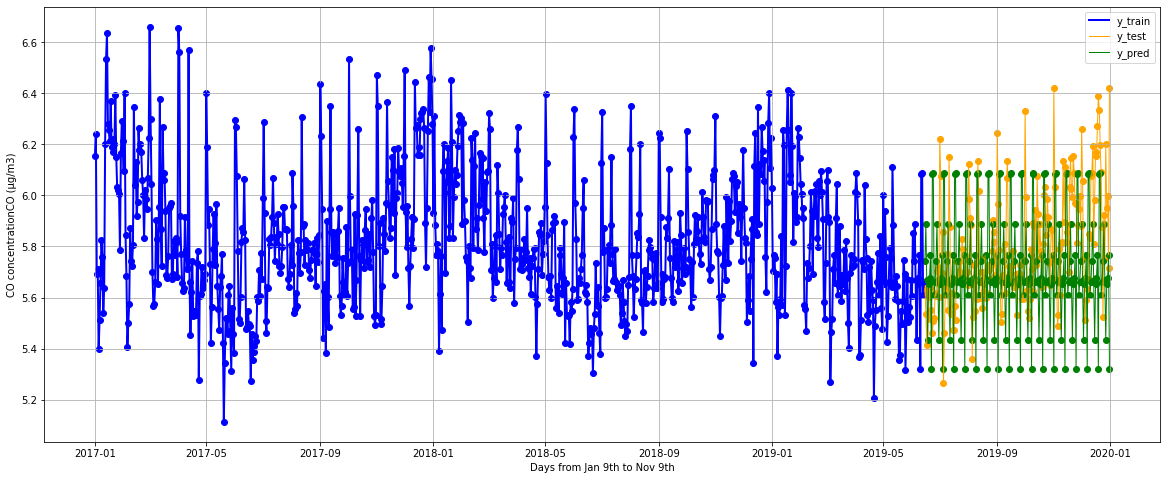

1.5506124740043594

In [129]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=1)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=1)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
mase_loss(y_pred, y_test,y_train)

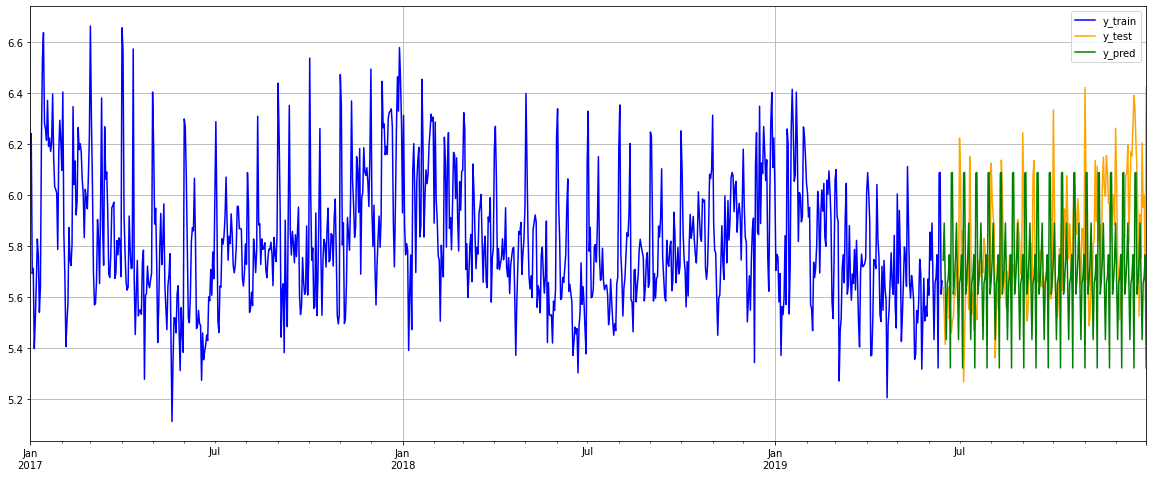

In [135]:
fig= plt.figure(figsize=(20,8))
y_train.plot(color='blue')
#y_train.plot(style='k.')
y_test.plot(color='orange')
#y_test.plot(style='k.')
y_pred.plot(color='green')
#y_pred.plot(style='k.')
plt.grid(True)
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199)
fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
mase_loss(y_pred, y_test,y_train)

In [ ]:
y_pred=list(y_pred)
y_pred=[math.exp(y_pred[i]) for i in range(len(y_pred))]
y_test=list(y_test)
y_test=[math.exp(y_test[i]) for i in range(len(y_pred))]
index=[i for i in range(len(y_pred))]
y_pred=pd.Series(y_pred,index)
y_test=pd.Series(y_test,index)
y_pred, y_test

In [ ]:
plot_series(y_test, y_pred)
mase_loss(y_pred, y_test,y_train)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [8]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 12-06 08:41:13] {2599} INFO - task = regression
[flaml.automl: 12-06 08:41:13] {2601} INFO - Data split method: uniform
[flaml.automl: 12-06 08:41:13] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-06 08:41:13] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-06 08:41:13] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-06 08:41:13] {3166} INFO - iteration 0, current learner xgboost
[flaml.automl: 12-06 08:41:13] {3296} INFO - Estimated sufficient time budget=2574s. Estimated necessary time budget=3s.
[flaml.automl: 12-06 08:41:13] {3343} INFO -  at 0.3s,	estimator xgboost's best error=422.3201,	best estimator xgboost's best error=422.3201
[flaml.automl: 12-06 08:41:13] {3166} INFO - iteration 1, current learner xgboost
[flaml.automl: 12-06 08:41:13] {3343} INFO -  at 0.5s,	estimator xgboost's best error=422.3201,	best estimator xgboost's best error=422.3201
[flaml.automl: 12-06 08:41:13] {3166} INFO - iteration 2, curren

[flaml.automl: 12-06 08:41:43] {3166} INFO - iteration 35, current learner xgboost
[flaml.automl: 12-06 08:41:52] {3343} INFO -  at 38.8s,	estimator xgboost's best error=113.2659,	best estimator xgboost's best error=113.2659
[flaml.automl: 12-06 08:41:52] {3166} INFO - iteration 36, current learner xgboost
[flaml.automl: 12-06 08:41:52] {3343} INFO -  at 39.4s,	estimator xgboost's best error=113.2659,	best estimator xgboost's best error=113.2659
[flaml.automl: 12-06 08:41:52] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-06 08:41:55] {3343} INFO -  at 42.0s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:41:55] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-06 08:41:57] {3343} INFO -  at 44.0s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:41:57] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12

[flaml.automl: 12-06 08:43:51] {3343} INFO -  at 158.1s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:51] {3166} INFO - iteration 72, current learner xgboost
[flaml.automl: 12-06 08:43:53] {3343} INFO -  at 159.9s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:53] {3166} INFO - iteration 73, current learner xgboost
[flaml.automl: 12-06 08:43:56] {3343} INFO -  at 163.7s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:56] {3166} INFO - iteration 74, current learner xgboost
[flaml.automl: 12-06 08:43:58] {3343} INFO -  at 165.6s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:58] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 12-06 08:44:01] {3343} INFO -  at 167.9s,	estimator xgboost's best error=109.9350

KeyboardInterrupt: 

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [ ]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# Data Cleaning in Pandas
Prepared by:
Nyalleng Moorosi - April 10th 2018

 In this practical we will learn how to do exploratory data analysis using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline  

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


** Read in the CSV file **

In [2]:
listings = pd.read_csv('listings2.csv')

In [3]:
pd.read_csv

<function pandas.io.parsers._make_parser_function.<locals>.parser_f>

**Have a look at the data**

In [4]:
listings[:3]

Unnamed: 0 bathrooms bedrooms  \
0           0         2        3   
1           1         3        4   
2           2         3        4   

                                         description garage  \
0  This is a corner unit with a bigger garden tha...      1   
1  The Main dwelling is accessed by means of a pe...      2   
2  EXCLUSIVE MANDATEThis dreamy single storey hom...      2   

                location                                              other  \
0    559-wipstert-street  [1, Pets, Alarm, Access Gate, Elec. Fencing, 4...   
1  257-muckleneuk-street  [2, Alarm, Access Gate, BIC, 257 Muckleneuk St...   
2              262-indus  [2, Pool, Elec. Fencing, Garden Cott., Patio, ...   

         price                      title  
0  R 1 390 000    Duplex in Monument Park  
1  R 3 000 000    House in New Muckleneuk  
2  R 3 450 000  House in Waterkloof Ridge

** Have a look at the datatypes in the the data frame **

In [5]:
listings.dtypes

Unnamed: 0      int64
bathrooms      object
bedrooms       object
description    object
garage         object
location       object
other          object
price          object
title          object
dtype: object

** Transform your data


coerce if it finds an error eg a string it forces  the output into something example 
a NAL


In [6]:

listings['bedrooms'] = pd.to_numeric(listings.bedrooms, downcast='float', errors='coerce')


In [7]:
listings[:3]

Unnamed: 0 bathrooms  bedrooms  \
0           0         2       3.0   
1           1         3       4.0   
2           2         3       4.0   

                                         description garage  \
0  This is a corner unit with a bigger garden tha...      1   
1  The Main dwelling is accessed by means of a pe...      2   
2  EXCLUSIVE MANDATEThis dreamy single storey hom...      2   

                location                                              other  \
0    559-wipstert-street  [1, Pets, Alarm, Access Gate, Elec. Fencing, 4...   
1  257-muckleneuk-street  [2, Alarm, Access Gate, BIC, 257 Muckleneuk St...   
2              262-indus  [2, Pool, Elec. Fencing, Garden Cott., Patio, ...   

         price                      title  
0  R 1 390 000    Duplex in Monument Park  
1  R 3 000 000    House in New Muckleneuk  
2  R 3 450 000  House in Waterkloof Ridge

** Problem 1 ** : Write a lambda function that appends on to the dataframe a new column that contains the size of the description for each listing
--To set a new column do ** listings['desc_len']  = ..**

**Problem 2 ** Modify all other coloums that should be numeric

In [8]:

listings['bathrooms'] = pd.to_numeric(listings.bathrooms, downcast='float', errors='coerce')

listings['garage'] = pd.to_numeric(listings.garage, downcast='float', errors='coerce')


### problem 1

In [9]:
desc_l =lambda x: len(listings.description[x])

In [10]:
desc_l(0)

2016

In [11]:
desc_len =[desc_l(x) for x in range(len(listings.description))]

In [12]:
desc_len =pd.Series(desc_len, index=None, dtype=None, name='desc_len', copy=False, fastpath=False)

In [13]:
listings['des_len']=desc_len

In [32]:
(listings[0:3])

Unnamed: 0  bathrooms  bedrooms  \
0           0        2.0       3.0   
1           1        3.0       4.0   
2           2        3.0       4.0   

                                         description  garage  \
0  This is a corner unit with a bigger garden tha...     1.0   
1  The Main dwelling is accessed by means of a pe...     2.0   
2  EXCLUSIVE MANDATEThis dreamy single storey hom...     2.0   

                location                                              other  \
0    559-wipstert-street  [1, Pets, Alarm, Access Gate, Elec. Fencing, 4...   
1  257-muckleneuk-street  [2, Alarm, Access Gate, BIC, 257 Muckleneuk St...   
2              262-indus  [2, Pool, Elec. Fencing, Garden Cott., Patio, ...   

       price                      title  des_len  
0  1390000.0    Duplex in Monument Park     2016  
1  3000000.0    House in New Muckleneuk     1071  
2  3450000.0  House in Waterkloof Ridge     1423

In [15]:
np.shape(listings)

(8800, 10)

### Do some summary statistics
    -- extend to mean and average

In [16]:
listings['bedrooms'].mean()

2.91009

### Grouping and further counting

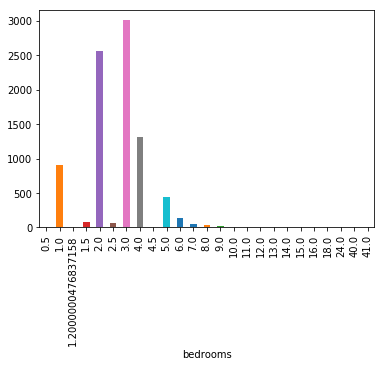

In [17]:
listings.groupby('bedrooms').agg('count')['price'].plot(kind = 'bar')

** Problem 3: ** Find the location with the most expensive housing 

** Select certain features of interest **

In [18]:
large_houses = listings[listings['bedrooms'] > 10]

In [31]:
large_houses[:3]

Unnamed: 0  bathrooms  bedrooms  \
193         193        9.0      11.0   
217         217        9.0      11.0   
349         349       16.0      16.0   

                                           description  garage  location  \
193  Family home / Guesthouse or Excellent Investme...     2.0  eastwood   
217  Family home / Guesthouse or Excellent Investme...     2.0  eastwood   
349  BARGAIN INVESTMENT OPPORTUNITYA stunning 16 ro...     NaN   arcadia   

                                                 other        price  \
193  [2, Pets, Alarm, Access Gate, Staff Quarters, ...  R 5 475 000   
217  [2, Pets, Alarm, Access Gate, Staff Quarters, ...  R 5 475 000   
349  [Access Gate, Staff Quarters, Elec. Fencing, I...  R 3 800 000   

                 title  des_len  
193  House in Eastwood     1053  
217  House in Eastwood     1053  
349   House in Arcadia      637

** Problem 4: ** Find Houses that have the same number of bedrooms as bathrooms

In [20]:
bathbed_houses = listings[listings['bedrooms'] == listings['bathrooms']]

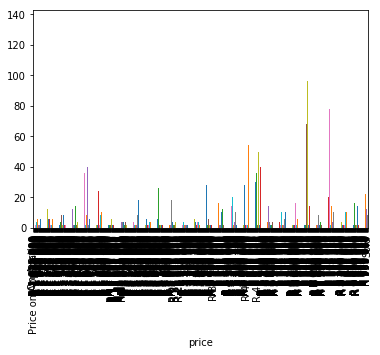

In [27]:
listings.groupby('price').agg('count')['bedrooms'].plot(kind = 'bar')

#### transforming a value using a helper function
 
listings transforms the 


In [29]:
def clean_price(x):
    try:
        return float(x[1:].replace(' ',''))
    except ValueError:
        return 0

In [30]:
listings['price'] = listings['price'].apply(lambda x: clean_price(x))

In [164]:
prices = []
for x in listings['price']:
    prices.append(x)

change the bathrooms to numerics

In [166]:
listings['bathrooms'] = pd.to_numeric(listings.bathrooms, downcast='float', errors='coerce')

In [168]:
listings['bathrooms'].max()

30.0

In [190]:
large_bathrooms = listings[listings['bathrooms'] > 10]

In [195]:
large_bathrooms[0:3]

Unnamed: 0  bathrooms  bedrooms  \
398          398       16.0      16.0   
422          422       16.0      16.0   
1446        1446       12.0      41.0   

                                            description       garage  \
398   BARGAIN INVESTMENT OPPORTUNITYA stunning 16 ro...  Access Gate   
422   BARGAIN INVESTMENT OPPORTUNITYA stunning 16 ro...  Access Gate   
1446  Commercial residential property situated in Pr...            2   

              location                                              other  \
398            arcadia  [Access Gate, Staff Quarters, Elec. Fencing, I...   
422            arcadia  [Access Gate, Staff Quarters, Elec. Fencing, I...   
1446  13-bourke-street  [2, Pool, Access Gate, Staff Quarters, Elec. F...   

           price              title  des_len  
398    3800000.0   House in Arcadia      637  
422    3800000.0   House in Arcadia      637  
1446  10570000.0  Flat in Sunnyside      954

house that has atleast 5 bedrooms and 7 bathrooms

In [205]:
listings[(listings['bathrooms']> 5) &(listings['bedrooms']> 7)][:4]

Unnamed: 0  bathrooms  bedrooms  \
203         203        6.0      11.0   
227         227        6.0      11.0   
244         244        9.0      11.0   
268         268        9.0      11.0   

                                           description         garage  \
203  An eleven bedroom house in a  well situated lo...  Hayford Obeng   
227  An eleven bedroom house in a  well situated lo...  Hayford Obeng   
244  Family home / Guesthouse or Excellent Investme...              2   
268  Family home / Guesthouse or Excellent Investme...              2   

     location                                              other      price  \
203  hatfield                                    [Hayford Obeng]  4500000.0   
227  hatfield                                    [Hayford Obeng]  4500000.0   
244  eastwood  [2, Pets, Alarm, Access Gate, Staff Quarters, ...  5475000.0   
268  eastwood  [2, Pets, Alarm, Access Gate, Staff Quarters, ...  5475000.0   

                 title  des_len  
203  House in Hatfield      751  
227  House in Hatfield      751  
244  House in Eastwood     1053  
268  House in Eastwood     1053

grouping by

In [211]:
listings.groupby('bedrooms').agg('count')['title']

bedrooms
0.5       10
1.0      904
1.2        2
1.5       90
2.0     2560
2.5       58
3.0     3010
4.0     1342
4.5        2
5.0      454
6.0      144
7.0       50
8.0       30
9.0       24
10.0      10
11.0      12
12.0       4
13.0       2
14.0       2
15.0       2
16.0       8
18.0       4
24.0       2
40.0       4
41.0       2
Name: title, dtype: int64

to check the correctiones of the data

In [209]:
listings[listings['bedrooms'] == 41]

Unnamed: 0  bathrooms  bedrooms  \
1446        1446       12.0      41.0   
1470        1470       12.0      41.0   

                                            description garage  \
1446  Commercial residential property situated in Pr...      2   
1470  Commercial residential property situated in Pr...      2   

              location                                              other  \
1446  13-bourke-street  [2, Pool, Access Gate, Staff Quarters, Elec. F...   
1470  13-bourke-street  [2, Pool, Access Gate, Staff Quarters, Elec. F...   

           price              title  des_len  
1446  10570000.0  Flat in Sunnyside      954  
1470  10570000.0  Flat in Sunnyside      954

In [1]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [2]:
#Importing and reading data.
data = pd.read_csv("student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [3]:
# Displaying the first 6 rows of the data.
data.head(n=6)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  

[6 rows x 33 columns]

In [4]:
#Gives the number of columns and rows in our data
data.shape



(395, 33)

In [5]:
data.values

array([['GP', 'F', 18, ..., 5, 6, 6],
       ['GP', 'F', 17, ..., 5, 5, 6],
       ['GP', 'F', 15, ..., 7, 8, 10],
       ...,
       ['MS', 'M', 21, ..., 10, 8, 7],
       ['MS', 'M', 18, ..., 11, 12, 10],
       ['MS', 'M', 19, ..., 8, 9, 9]], dtype=object)

In [6]:
#Summary statistics of the data. Gives summary statistics of the data in numeric form.
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
#Picking only a few columns of the data and saving the new data as data1

data1=data[["sex","age","G1","G2","G3"]]
data1.head()

sex  age  G1  G2  G3
0   F   18   5   6   6
1   F   17   5   5   6
2   F   15   7   8  10
3   F   15  15  14  15
4   F   16   6  10  10

In [9]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
data.iloc[:,0:5]

school sex  age address famsize
0       GP   F   18       U     GT3
1       GP   F   17       U     GT3
2       GP   F   15       U     LE3
3       GP   F   15       U     GT3
4       GP   F   16       U     GT3
..     ...  ..  ...     ...     ...
390     MS   M   20       U     LE3
391     MS   M   17       U     LE3
392     MS   M   21       R     GT3
393     MS   M   18       R     LE3
394     MS   M   19       U     LE3

[395 rows x 5 columns]

In [11]:
data.iloc[0:5,0:4]

school sex  age address
0     GP   F   18       U
1     GP   F   17       U
2     GP   F   15       U
3     GP   F   15       U
4     GP   F   16       U

In [12]:
data.iloc[0:5,[6,14,21,30]]

Medu  failures internet  G1
0     4         0       no   5
1     1         0      yes   5
2     1         3      yes   7
3     4         0      yes  15
4     3         0       no   6

In [13]:
data.loc[0:5,["G1","age","G3"]]

G1  age  G3
0   5   18   6
1   5   17   6
2   7   15  10
3  15   15  15
4   6   16  10
5  15   16  15

## DECISION TREE FOR CLASSIFICATION ##

In [14]:
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

Age_male=[random.randint(5,80) for i in range(50000)]
Age_female=[random.randint(5,80) for i in range(50000)]
Gender_male=[1 for i in range(50000)]
Gender_female=[0 for i in range(50000)]
#Preference=[random.randint(1,3) for i in range(100000)]
Preference=[]
Age=Age_male+Age_female
Gender=Gender_male+Gender_female
for i in range(100000):
    if (Age[i]<=35 and Gender[i]==1):
        Preference.append('rhumba')
    elif (Age[i]<=35 and Gender[i]==0):
        Preference.append('bongo')
    else:
        Preference.append('reggae')


data=[[Age[i],Gender[i],Preference[i]] for i in range(len(Age))]
data=pd.DataFrame(data, columns=['Age','Gender','Preference'])
data.shape

print(data.head())
X=data.drop(columns='Preference')
y=data['Preference']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

score=accuracy_score(y_test,predictions)
print(' Accuracy score is '+ str(score))


   Age  Gender Preference
0   29       1     rhumba
1   26       1     rhumba
2   21       1     rhumba
3   40       1     reggae
4   76       1     reggae
 Accuracy score is 1.0


In [15]:
model.predict([[5,1]])

array(['rhumba'], dtype=object)

## Logistic regression for Classication ##

In [1]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
#logmodel.fit(X,y)
#predict=logmodel.predict([[60,1]])
logmodel.fit(X_train,y_train)
predict=logmodel.predict(X_test)
score=accuracy_score(y_test,predict)

#tree.export_graphviz(model,out_file='music_recommender1.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

score

NameError: name 'X_train' is not defined

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[ 4020,     0,     0],
       [    0, 11832,     0],
       [    0,     0,  4148]])

In [2]:
import pandas as pd
#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]
Iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
X=Iris.drop(columns='Species')
y=Iris['Species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

A=[[y_test],[predictions]]
score=accuracy_score(y_test,predictions)
score


NameError: name 'train_test_split' is not defined

In [4]:
logmodel=LogisticRegression()
#logmodel.fit(X,y)
#predict=logmodel.predict([[60,1]])
logmodel.fit(X_train,y_train)
predict=logmodel.predict(X_test)
score=accuracy_score(y_test,predict)

#tree.export_graphviz(model,out_file='music_recommender1.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

score

NameError: name 'LogisticRegression' is not defined

In [5]:
Iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

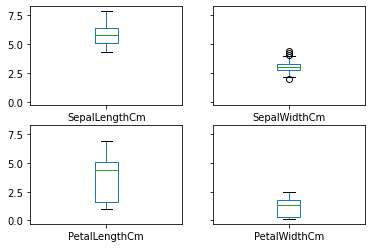

In [6]:
import matplotlib.pyplot as plt

Iris.plot(kind='box',subplots=True,layout=(2,2),sharex=True,sharey=True)
plt.show()

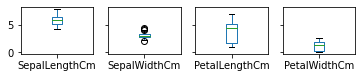

In [7]:
Iris.plot(kind='box',subplots=True,layout=(4,4),sharex=True,sharey=True)
plt.show()

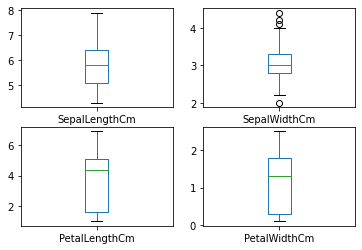

In [8]:
Iris.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

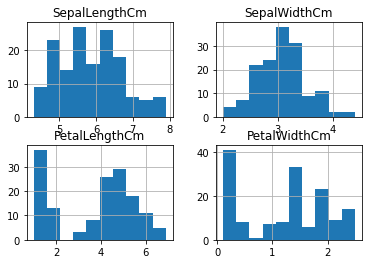

In [9]:
Iris.hist()
plt.show()

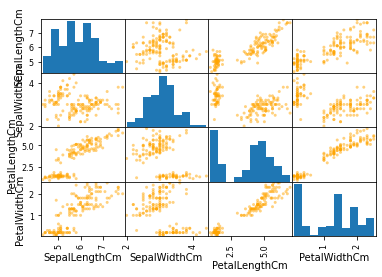

In [10]:
from pandas.plotting import scatter_matrix


scatter_matrix(Iris, color='orange')
plt.show()

In [11]:
Iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
group_iris=Iris.groupby('Species')


In [13]:
#for Species, Species_Iris in group_iris:
    #print(Species)
    #print(Species_Iris)
    

In [14]:
group_iris.mean()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026

In [15]:
group_iris.std()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           0.352490      0.381024       0.173511      0.107210
Iris-versicolor       0.516171      0.313798       0.469911      0.197753
Iris-virginica        0.635880      0.322497       0.551895      0.274650

In [16]:
group_iris.count()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                 50            50             50            50
Iris-versicolor             50            50             50            50
Iris-virginica              50            50             50            50

In [17]:
group_iris.max(),group_iris.min()

(                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 Species                                                                  
 Iris-setosa                5.8           4.4            1.9           0.6
 Iris-versicolor            7.0           3.4            5.1           1.8
 Iris-virginica             7.9           3.8            6.9           2.5,
                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 Species                                                                  
 Iris-setosa                4.3           2.3            1.0           0.1
 Iris-versicolor            4.9           2.0            3.0           1.0
 Iris-virginica             4.9           2.2            4.5           1.4)

In [18]:
group_iris.get_group('Iris-setosa').head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [19]:
group_iris.get_group('Iris-setosa').describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000

Species
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

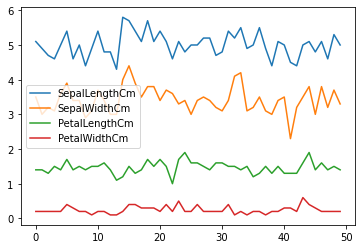

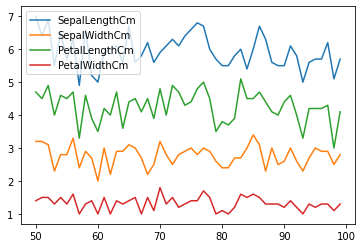

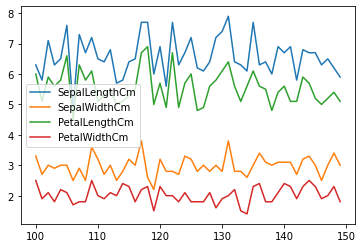

In [20]:
group_iris.plot()


## Data  ANALYSIS USING SEARBON LIBRARY ##

In [21]:
#Importing and reading data.
data = pd.read_csv("Titanic.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [22]:
import numpy as np
import seaborn as sns

In [23]:
Iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [24]:
Iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

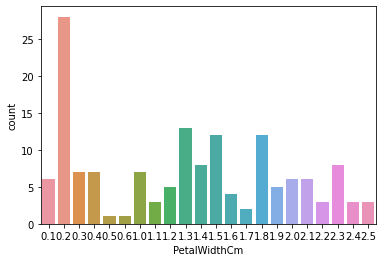

In [25]:
sns.countplot(x="PetalWidthCm", data=Iris)

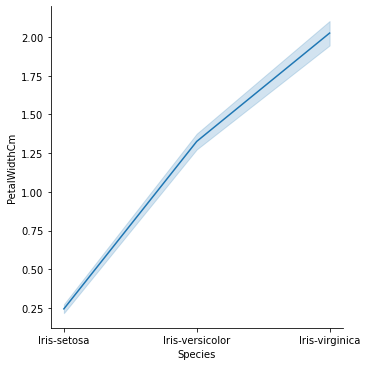

In [26]:
sns.relplot(x="Species", y="PetalWidthCm", data=Iris, kind="line")

## More on plotting ##

<function matplotlib.pyplot.show(close=None, block=None)>

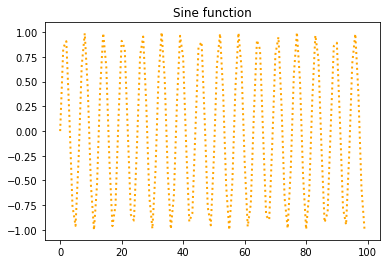

In [27]:
import math

X=[i for i in range(100)]
y1=[math.sin(X[i]) for i in range(100)]
plt.plot(X,y1,color='orange',linewidth=2,linestyle=':')
plt.title('Sine function')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

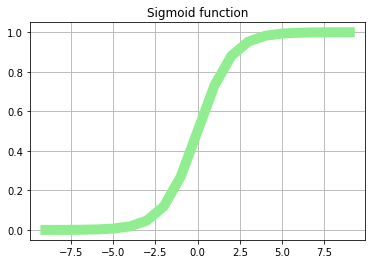

In [28]:
X1=[-i for i in range(10)]
X2=[i for i in range(10)]
X3=sorted(X1)+X2

y2=[1/(1+math.exp(-x)) for x in X3]
plt.plot(X3,y2,color='lightgreen',linewidth=10)
plt.title('Sigmoid function')
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

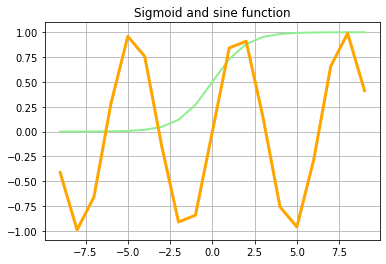

In [29]:
X1=[-i for i in range(10)]
X2=[i for i in range(10)]
X3=sorted(X1)+X2
y1=[math.sin(x) for x in X3]
y2=[1/(1+math.exp(-x)) for x in X3]
plt.plot(X3,y2,color='lightgreen',linewidth=2)
plt.plot(X3,y1,color='orange',linewidth=3)
plt.title('Sigmoid and sine function')
plt.grid(True)
plt.show

## Plotting Normal distribution ##

<function matplotlib.pyplot.show(close=None, block=None)>

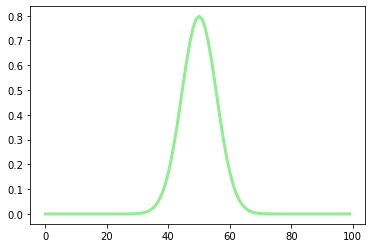

In [30]:
d_p=[i for i in range(100)] 
mu=50
delta=0.5

df=[(1/(delta*math.sqrt(2*math.pi)))*math.exp(-((d_p[i]-mu)/2*delta**2)**2) for i in range(100)]

plt.plot(d_p,df,color='lightgreen',linewidth=3)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

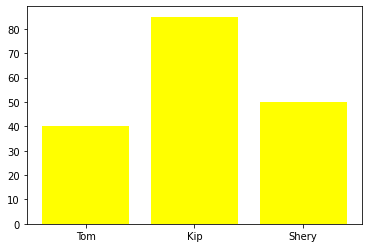

In [31]:
#Bar plot
Students={"Tom":40,"Kip":85,"Shery":50}
Names=list(Students.keys())
Marks=list(Students.values())
plt.bar(Names,Marks,color='yellow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

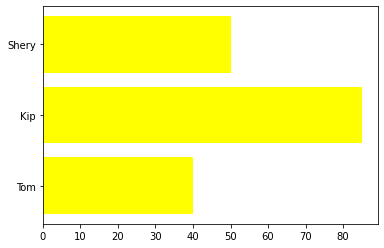

In [32]:
#Bar plot
Students={"Tom":40,"Kip":85,"Shery":50}
Names=list(Students.keys())
Marks=list(Students.values())
plt.barh(Names,Marks,color='yellow')
plt.show

## Scatter plot ##

<function matplotlib.pyplot.show(close=None, block=None)>

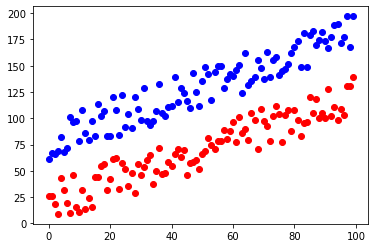

In [33]:
import random
def rand():
    rand=random.randint(1,40)
    return rand

x=[i for i in range(100)]
y=[i+rand() for i in range(len(x))]
Z=[60+i+rand() for i in range(len(x))]

plt.scatter(x,y,color='red')
plt.scatter(x,Z,color='Blue')
plt.show


## Classifying Iris Data using Random Forest  ##

In [34]:
# first neural network with keras tutorial
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [56]:
#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]
Iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [66]:
X=Iris.iloc[:,[1,2,3]]

y=Iris.iloc[:,4]
Xn=X+np.random.normal(0,10,X.shape)
Xn

SepalWidthCm  PetalLengthCm  PetalWidthCm
0        8.037819     -16.897404      0.570057
1       10.679024       7.298798     -3.438588
2       -4.856265      -9.883119     -1.110540
3       14.430799     -18.018041     -6.398917
4       -7.798025       9.249575     -5.343096
..            ...            ...           ...
145      5.014799      10.607736    -15.880776
146      2.006759       7.390336     -8.103303
147     19.739857       6.815593     17.634047
148     -4.505230      -3.673001      4.542522
149    -13.786884       7.249656      2.772192

[150 rows x 3 columns]

In [36]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [37]:
Iris['Is_train']=np.random.uniform(0,1,len(Iris))<=0.75
Iris.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Is_train  
0      True  
1      True  
2      True  
3      True  
4      True

In [38]:
train,test=Iris[Iris['Is_train']==True],Iris[Iris['Is_train']==False]

In [39]:
len(train), len(test)

(118, 32)

In [40]:
X_train=train.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]]
y_train=train.iloc[:,15]
X_test=test.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]]
y_test=test.iloc[:,15]

X_train.head()

IndexError: positional indexers are out-of-bounds

In [63]:
y_train=pd.factorize(train['Species'])[0]
y_test=pd.factorize(test['Species'])[0]

y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
## Creating a model
model=RandomForestClassifier(n_jobs=2,random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [65]:
predictions=model.predict(X_test)
score=accuracy_score(y_test,predictions)
score

0.9375

In [66]:
pd.crosstab(test['Species'],predictions,rownames=['Actual Species'],colnames=['predicted Species'])

predicted Species   0  1   2
Actual Species              
Iris-setosa        13  0   0
Iris-versicolor     0  5   2
Iris-virginica      0  0  12

# Deep Learning ##

In [70]:
import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [71]:
train_in=[[1,1,1],[1,0,1],[0,1,1],[0,0,1]]
train_out=[[1],[0],[0],[0]]

In [72]:
# Defining weights of the model
w=tf.Variable(tf.random.normal([3,1], seed=12))

In [73]:
# Place holders
x=tf.placeholder(tf.float32,[None,3])
x=tf.placeholder(tf.float32,[None,1])


In [74]:
output=tf.nn.relu(tf.matmul(w,x))

In [75]:
#Loss Function
loss=tf.reduce_sum(tf.square(output-y))

In [76]:
# Optimizer
optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(loss)


In [79]:
#Initizlizing my variables
init=tf.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

## A simple deep learning Example ##

1. Load Data.

The first step is to define the functions and classes we intend to use in this tutorial.

We will use the NumPy library to load our dataset and we will use two classes from the Keras library to define our model.

The imports required are listed below.

In [80]:
# first neural network with keras tutorial
import random
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [81]:
Numb1=[random.randint(20,25) for i in range(1000)]
Numb2=[random.randint(45,50) for i in range(1000)]
Numb3=[random.randint(67,70) for i in range(1000)]
Numb4=[random.randint(0,1) for i in range(1000)]

In [82]:
import numpy as np

Numb=[[Numb1[i],Numb2[i],Numb3[i],Numb4[i]]  for i in range(1000)]
Mydata=np.array(Numb)

We can now load our dataset.

In this Keras tutorial, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.



In [83]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
#dataset =Mydata
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

2. Define Keras Model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

The model expects rows of data with 8 variables (the input_dim=8 argument).

The first hidden layer has 12 nodes and uses the relu activation function.

The second hidden layer has 8 nodes and uses the relu activation function.

The output layer has one node and uses the sigmoid activation function.


In [84]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

3. Compile Keras Model.

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“. You can learn more about choosing loss functions based on your problem here:

How to Choose Loss Functions When Training Deep Learning Neural Networks
We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. To learn more about the Adam version of stochastic gradient descent see the post:

Gentle Introduction to the Adam Optimization Algorithm for Deep Learning
Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

In [85]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

4. Fit Keras Model.

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

Epoch: One pass through all of the rows in the training dataset.
Batch: One or more samples considered by the model within an epoch before weights are updated.
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. For more on the difference between epochs and batches, see the post:

What is the Difference Between a Batch and an Epoch in a Neural Network?
The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

In [86]:
# fit the keras model on the dataset
model=model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 591us/sample - loss: 2.2004 - acc: 0.5486 - val_loss: 1.0577 - val_acc: 0.5433
Epoch 2/150
514/514 [==============================] - 0s 204us/sample - loss: 1.1585 - acc: 0.5759 - val_loss: 0.8943 - val_acc: 0.6693
Epoch 3/150
 10/514 [..............................] - ETA: 0s - loss: 2.9211 - acc: 0.2000

/opt/anaconda3/envs/Project/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


514/514 [==============================] - 0s 195us/sample - loss: 1.0649 - acc: 0.5895 - val_loss: 0.8646 - val_acc: 0.7087
Epoch 4/150
514/514 [==============================] - 0s 156us/sample - loss: 1.0220 - acc: 0.6051 - val_loss: 0.8051 - val_acc: 0.6811
Epoch 5/150
514/514 [==============================] - 0s 170us/sample - loss: 0.9155 - acc: 0.6265 - val_loss: 0.7440 - val_acc: 0.6496
Epoch 6/150
514/514 [==============================] - 0s 163us/sample - loss: 0.8771 - acc: 0.6245 - val_loss: 0.7406 - val_acc: 0.6220
Epoch 7/150
514/514 [==============================] - 0s 183us/sample - loss: 0.8228 - acc: 0.6245 - val_loss: 0.7125 - val_acc: 0.6417
Epoch 8/150
514/514 [==============================] - 0s 169us/sample - loss: 0.7930 - acc: 0.6304 - val_loss: 0.7044 - val_acc: 0.6299
Epoch 9/150
514/514 [==============================] - 0s 188us/sample - loss: 0.7408 - acc: 0.6420 - val_loss: 0.6954 - val_acc: 0.6496
Epoch 10/150
514/514 [==============================]

514/514 [==============================] - 0s 167us/sample - loss: 0.5233 - acc: 0.7529 - val_loss: 0.5869 - val_acc: 0.7008
Epoch 122/150
514/514 [==============================] - 0s 164us/sample - loss: 0.5360 - acc: 0.7471 - val_loss: 0.5542 - val_acc: 0.7480
Epoch 123/150
514/514 [==============================] - 0s 146us/sample - loss: 0.5484 - acc: 0.7510 - val_loss: 0.6051 - val_acc: 0.6850
Epoch 124/150
514/514 [==============================] - 0s 161us/sample - loss: 0.5383 - acc: 0.7335 - val_loss: 0.5649 - val_acc: 0.7283
Epoch 125/150
514/514 [==============================] - 0s 192us/sample - loss: 0.5255 - acc: 0.7451 - val_loss: 0.5572 - val_acc: 0.7402
Epoch 126/150
514/514 [==============================] - 0s 192us/sample - loss: 0.5225 - acc: 0.7588 - val_loss: 0.5616 - val_acc: 0.7323
Epoch 127/150
514/514 [==============================] - 0s 156us/sample - loss: 0.5435 - acc: 0.7296 - val_loss: 0.7726 - val_acc: 0.5354
Epoch 128/150
514/514 [==================

## Second example using Iris Data ##

First we need to convert the species column in binary form. Next we retrieve the data as a list and convert back as an array

In [75]:
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]

Iris_list=Iris.values.tolist()
for i in range(50):
    for j in range(50,100):
        Iris_list[i][4]=1
        Iris_list[j][4]=0
        
Iris_list1=[Iris_list[i] for i in range(40)]
Iris_list2=[Iris_list[i] for i in range(50,90)]
Iris_list3=Iris_list1+Iris_list2

Iris_list4=[Iris_list[i] for i in range(40,50)]
Iris_list5=[Iris_list[i] for i in range(90,100)]
Iris_list6=Iris_list4+Iris_list5


In [76]:
train=np.array(Iris_list3)
train=train+np.random.normal(0,10,train.shape)
test=np.array(Iris_list6)
test=test+np.random.normal(0,10,test.shape)
# load the dataset
dataset =train
X_train= dataset[:,0:4]
y_train= dataset[:,4]
X_test=test[:,0:4]
y_test=test[:,4]

In [77]:
# define the keras model
model = Sequential()
model.add(Dense(30, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [79]:
# fit the keras model on the dataset
model=model.fit(X_train, y_train,validation_split=0.33, epochs=100, batch_size=10)


Epoch 1/100
6/6 [==============================] - 1s 46ms/step - loss: 5.5296 - accuracy: 0.0000e+00 - val_loss: -22.5639 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 9.4528 - accuracy: 0.0000e+00 - val_loss: -22.0321 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4527 - accuracy: 0.0000e+00 - val_loss: -21.7011 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: -3.2205 - accuracy: 0.0000e+00 - val_loss: -21.3742 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 1.2213 - accuracy: 0.0000e+00 - val_loss: -20.9858 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: -5.4259 - accuracy: 0.0000e+00 - val_loss: -20.9449 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: -1.5994 - accuracy: 0.0000e

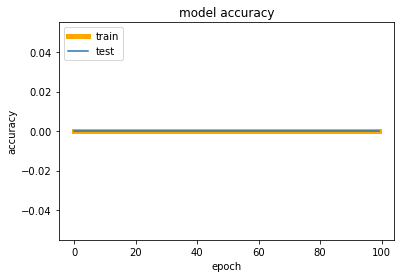

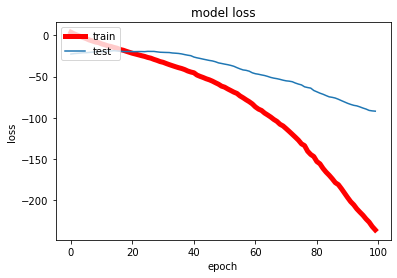

In [80]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
#predictions=model.predict(X_test)
#pred=[round(sum(predictions[i])) for i in range(len(predictions))]
#score=accuracy_score(y_test,pred)

#tree.export_graphviz(model,out_file='music_recommender1.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

#score

## Image Classification Using Deep Learning, MNIST DATASET ##

Import the required python libraries for Image Classification


In [2]:
#install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [3]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
X_train=X_train/255
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


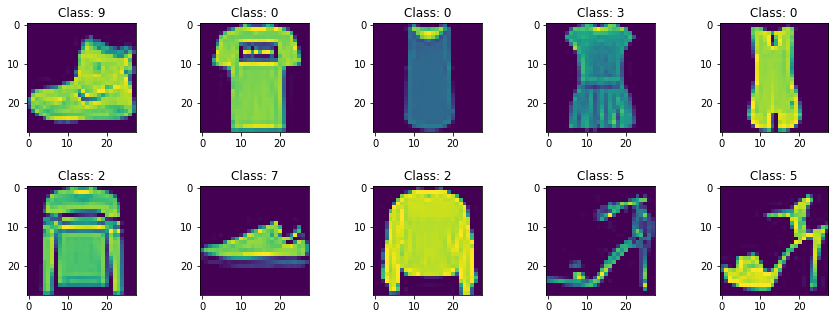

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [100]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [101]:
#fit training dataset into the model
model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=10)



Train on 40199 samples, validate on 19801 samples
Epoch 1/25
40130/40199 [============================>.] - ETA: 0s - loss: 0.5094 - acc: 0.8178

/opt/anaconda3/envs/Project/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


40199/40199 [==============================] - 12s 297us/sample - loss: 0.5091 - acc: 0.8179 - val_loss: 0.4233 - val_acc: 0.8508
Epoch 2/25
40199/40199 [==============================] - 11s 283us/sample - loss: 0.3782 - acc: 0.8612 - val_loss: 0.3847 - val_acc: 0.8650
Epoch 3/25
40199/40199 [==============================] - 11s 283us/sample - loss: 0.3391 - acc: 0.8753 - val_loss: 0.3732 - val_acc: 0.8645
Epoch 4/25
40199/40199 [==============================] - 13s 333us/sample - loss: 0.3178 - acc: 0.8824 - val_loss: 0.3771 - val_acc: 0.8671
Epoch 5/25
40199/40199 [==============================] - 14s 353us/sample - loss: 0.2944 - acc: 0.8911 - val_loss: 0.3385 - val_acc: 0.8760
Epoch 6/25
40199/40199 [==============================] - 15s 362us/sample - loss: 0.2818 - acc: 0.8945 - val_loss: 0.4338 - val_acc: 0.8533
Epoch 7/25
40199/40199 [==============================] - 14s 342us/sample - loss: 0.2677 - acc: 0.8992 - val_loss: 0.3272 - val_acc: 0.8861
Epoch 8/25
40199/40199 [

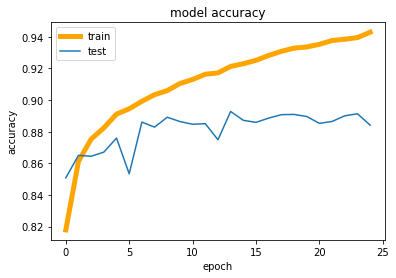

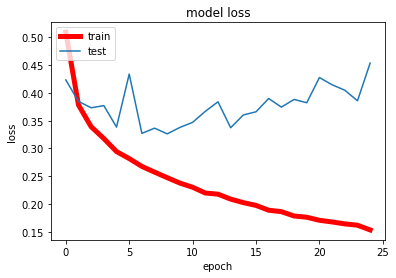

In [102]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)
#calculate evaluation parameters
f1_e25 = f1_score(y_test, classifier_e25.predict_classes(X_test), average='micro')
roc_e25 = roc_auc_score(y_test, classifier_e25.predict_proba(X_test), multi_class='ovo')
#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                      'F1 score'      : round(f1_e25,3),
                      'ROC AUC score' : round(roc_e25,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])
#print evaluation dataframe
display(stats_e25)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.


Test accuracy  F1 score  ROC AUC score  Total Loss
0          86.94     0.869          0.989       0.543

## Character Classification Using Deep Learning, MNIST DATASET ##

In [142]:
#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

#read mnist fashion dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_train

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

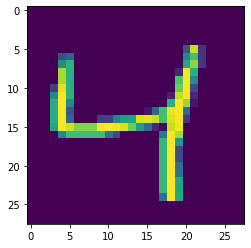

In [143]:
plt.imshow(X_train[2])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

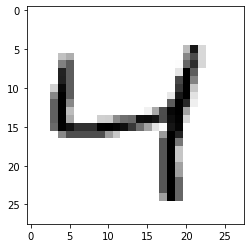

In [144]:
plt.imshow(X_train[2],cmap=plt.cm.binary)
plt.show

In [145]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


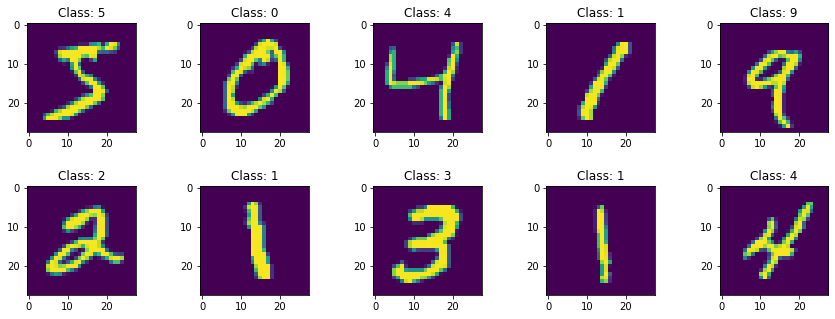

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [147]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [148]:
model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=10)

Train on 40199 samples, validate on 19801 samples
Epoch 1/25
40199/40199 [==============================] - 9s 215us/sample - loss: 0.2471 - acc: 0.9270 - val_loss: 0.1409 - val_acc: 0.9575
Epoch 2/25
40199/40199 [==============================] - 8s 205us/sample - loss: 0.0984 - acc: 0.9699 - val_loss: 0.1034 - val_acc: 0.9677
Epoch 3/25
40199/40199 [==============================] - 9s 224us/sample - loss: 0.0644 - acc: 0.9798 - val_loss: 0.1108 - val_acc: 0.9679
Epoch 4/25
40199/40199 [==============================] - 9s 217us/sample - loss: 0.0467 - acc: 0.9852 - val_loss: 0.1052 - val_acc: 0.9705
Epoch 5/25
40199/40199 [==============================] - 9s 215us/sample - loss: 0.0334 - acc: 0.9892 - val_loss: 0.1133 - val_acc: 0.9719
Epoch 6/25
40199/40199 [==============================] - 9s 213us/sample - loss: 0.0267 - acc: 0.9907 - val_loss: 0.1185 - val_acc: 0.9727
Epoch 7/25
40199/40199 [==============================] - 9s 212us/sample - loss: 0.0222 - acc: 0.9921 - val_l

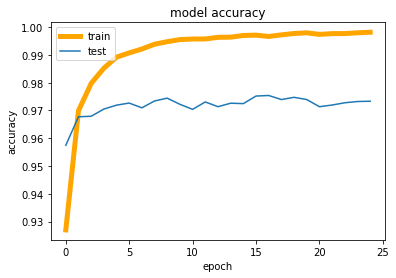

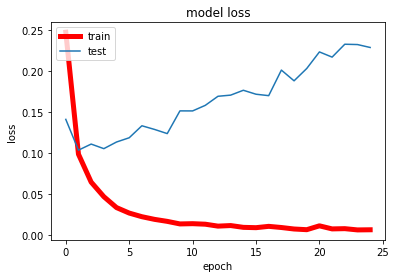

In [149]:
#model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=10)

loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Air Quality Prediction Using Machine Learning ##

In [150]:
import pandas as pd
import numpy  as np

In [151]:
import warnings
warnings.filterwarnings("ignore")

In [152]:
airdata=pd.read_csv('station_day.csv')
airdata

StationId        Date  PM2.5    PM10     NO     NO2     NOx    NH3  \
0          AP001  2017-11-24  71.36  115.75   1.75   20.65   12.40  12.19   
1          AP001  2017-11-25  81.40  124.50   1.44   20.50   12.08  10.72   
2          AP001  2017-11-26  78.32  129.06   1.26   26.00   14.85  10.28   
3          AP001  2017-11-27  88.76  135.32   6.60   30.85   21.77  12.91   
4          AP001  2017-11-28  64.18  104.09   2.56   28.07   17.01  11.42   
...          ...         ...    ...     ...    ...     ...     ...    ...   
108030     WB013  2020-06-27   8.65   16.46    NaN     NaN     NaN    NaN   
108031     WB013  2020-06-28  11.80   18.47    NaN     NaN     NaN    NaN   
108032     WB013  2020-06-29  18.60   32.26  13.65  200.87  214.20  11.40   
108033     WB013  2020-06-30  16.07   39.30   7.56   29.13   36.69  29.26   
108034     WB013  2020-07-01  10.50   36.50   7.78   22.50   30.25  27.23   

          CO    SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0       0.10  10.76  109.26     0.17     5.92    0.10    NaN           NaN  
1       0.12  15.24  127.09     0.20     6.50    0.06  184.0      Moderate  
2       0.14  26.96  117.44     0.22     7.95    0.08  197.0      Moderate  
3       0.11  33.59  111.81     0.29     7.63    0.12  198.0      Moderate  
4       0.09  19.00  138.18     0.17     5.02    0.07  188.0      Moderate  
...      ...    ...     ...      ...      ...     ...    ...           ...  
108030  0.69   4.36   30.59     1.32     7.26     NaN   50.0          Good  
108031  0.68   3.49   38.95     1.42     7.92     NaN   65.0  Satisfactory  
108032  0.78   5.12   38.17     3.52     8.64     NaN   63.0  Satisfactory  
108033  0.69   5.88   29.64     1.86     8.40     NaN   57.0  Satisfactory  
108034  0.58   2.80   13.10     1.31     7.39     NaN   59.0  Satisfactory  

[108035 rows x 16 columns]

In [153]:
airdata.shape


(108035, 16)

Notice from the description of the data below, Each column has alot of missing data

In [154]:
airdata.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  86410.000000  65329.000000  90929.000000  91488.000000  92535.000000   
mean      80.272571    157.968427     23.123424     35.240760     41.195055   
std       76.526403    123.418672     34.491019     29.510827     45.145976   
min        0.020000      0.010000      0.010000      0.010000      0.000000   
25%       31.880000     70.150000      4.840000     15.090000     13.970000   
50%       55.950000    122.090000     10.290000     27.210000     26.660000   
75%       99.920000    208.670000     24.980000     46.930000     50.500000   
max     1000.000000   1000.000000    470.000000    448.050000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  59930.000000  95037.000000  82831.000000  82467.000000  76580.000000   
mean      28.732875      1.605749     12.257634     38.134836      3.358029   
std       24.897797      4.369578     12.984723     39.128004     11.156234   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       11.900000      0.530000      5.040000     18.895000      0.160000   
50%       23.590000      0.910000      8.950000     30.840000      1.210000   
75%       38.137500      1.450000     14.920000     47.140000      3.610000   
max      418.900000    175.810000    195.650000    963.000000    455.030000   

            Toluene        Xylene           AQI  
count  69333.000000  22898.000000  87025.000000  
mean      15.345394      2.423446    179.749290  
std       29.348587      6.472409    131.324339  
min        0.000000      0.000000      8.000000  
25%        0.690000      0.000000     86.000000  
50%        4.330000      0.400000    132.000000  
75%       17.510000      2.110000    254.000000  
max      454.850000    170.370000   2049.000000

Now have created a new data set, by deleting rows with missing values.

In [155]:
data = airdata.dropna(axis = 0, how ='any')  
data.shape 

(10314, 16)

In [156]:
data.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10314 entries, 1 to 106147
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   10314 non-null  object 
 1   Date        10314 non-null  object 
 2   PM2.5       10314 non-null  float64
 3   PM10        10314 non-null  float64
 4   NO          10314 non-null  float64
 5   NO2         10314 non-null  float64
 6   NOx         10314 non-null  float64
 7   NH3         10314 non-null  float64
 8   CO          10314 non-null  float64
 9   SO2         10314 non-null  float64
 10  O3          10314 non-null  float64
 11  Benzene     10314 non-null  float64
 12  Toluene     10314 non-null  float64
 13  Xylene      10314 non-null  float64
 14  AQI         10314 non-null  float64
 15  AQI_Bucket  10314 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.3+ MB


In [158]:
data.AQI_Bucket.unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [159]:
print(data.NO2.min())
print(data.NO2.max())

0.01
254.78


In [160]:
pd.Categorical(data['AQI_Bucket']).describe()

counts     freqs
categories                    
Good            1073  0.104033
Moderate        4402  0.426799
Poor             610  0.059143
Satisfactory    3730  0.361644
Severe           100  0.009696
Very Poor        399  0.038685

In [161]:
data.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

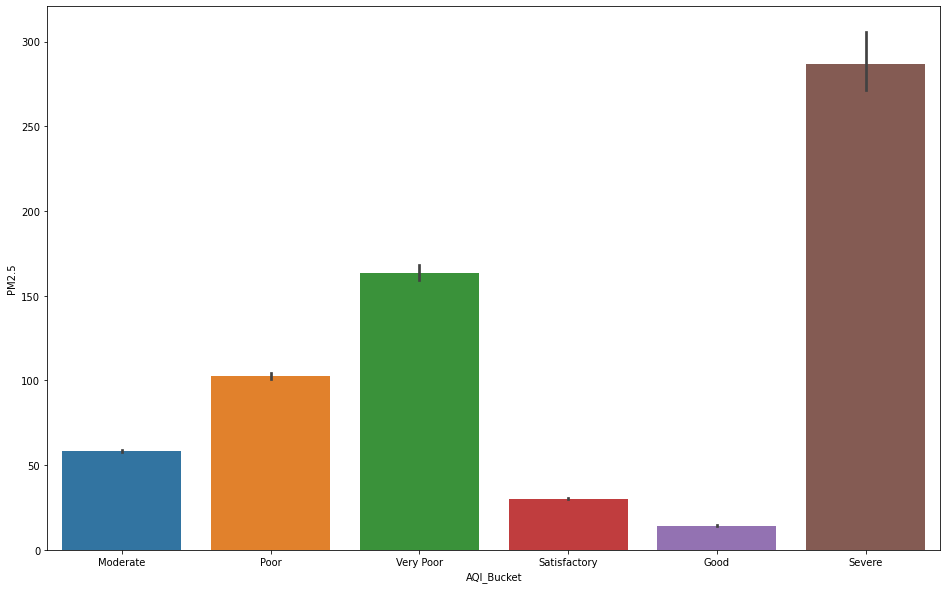

In [162]:
import matplotlib.pyplot as plt
import seaborn as s

fig,ax=plt.subplots(figsize=(16,10))
ax=s.barplot(x='AQI_Bucket',y='PM2.5', data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

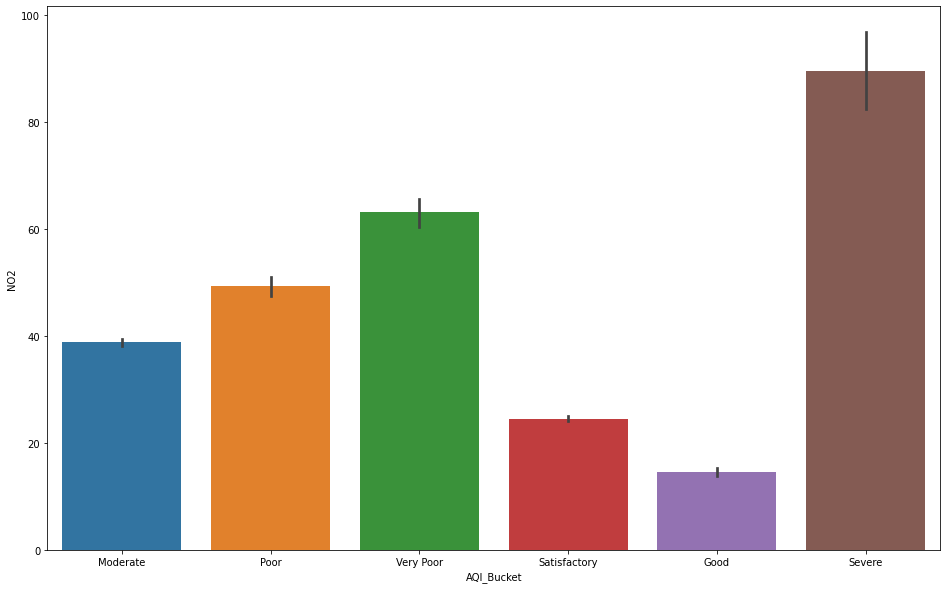

In [163]:
import matplotlib.pyplot as plt
import seaborn as s

fig,ax=plt.subplots(figsize=(16,10))
ax=s.barplot(x='AQI_Bucket',y='NO2', data=data)
plt.show

In [1]:
#Heatmap plot Diagram
#fig,ax=plt.subplots(figsize=(16,10))
#s.heatmap(data.corr(),ax=ax, annot=True)


## CHECKING AIR QUALITY INDEX USING DECISION TREE ##

In [165]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

airdata=pd.read_csv('station_day.csv')


New_data=data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

New_data.head()

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Benzene  \
1  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09     0.20   
2  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44     0.22   
3  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81     0.29   
4  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18     0.17   
5  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55  109.74     0.21   

   Toluene  Xylene    AQI AQI_Bucket  
1     6.50    0.06  184.0   Moderate  
2     7.95    0.08  197.0   Moderate  
3     7.63    0.12  198.0   Moderate  
4     5.02    0.07  188.0   Moderate  
5     4.71    0.08  173.0   Moderate

In [166]:
mydata=New_data
X=mydata.drop(columns='AQI_Bucket')
y=mydata['AQI_Bucket']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

A=[[y_test],[predictions]]
score=accuracy_score(y_test,predictions)

#tree.export_graphviz(model,out_file='music_recommender.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)
score

1.0

## DEEP LEARNING ALGORITHM FOR PREDICTING THE AIR QUALITY ##

In [167]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

airdata=pd.read_csv('station_day.csv')


New_data=data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

dataset=New_data

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')

imputer = imputer.fit(dataset.iloc[:, 0:13])
X= imputer.transform(dataset.iloc[:, 0:13])

y=list(dataset.iloc[:,13])

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder
#y1=encoder.fit_transform(y)
Y=pd.get_dummies(y)
for i in range(len(y)) :
    if(y[i]=='Very Poor'):
        y[i]=1
    elif (y[i]=='Poor'):
        y[i]=2
    elif (y[i]=='Moderate'):
        y[i]=3
    elif (y[i]=='Satisfactory'):
        y[i]=4
    elif (y[i]=='Good'):
        y[i]=5
    else:
        y[i]=6





#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = 13, units = 13, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 13, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_19 (Dense)             (None, 13)                182       
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________


In [168]:
model=classifier_e25.fit(X, y, validation_split=0.33, epochs=100, batch_size=10)

Train on 6910 samples, validate on 3404 samples
Epoch 1/100
6910/6910 [==============================] - 1s 163us/sample - loss: 1.1402 - acc: 0.5401 - val_loss: 1.0592 - val_acc: 0.5076
Epoch 2/100
6910/6910 [==============================] - 1s 165us/sample - loss: 0.8598 - acc: 0.6253 - val_loss: 1.0988 - val_acc: 0.5308
Epoch 3/100
6910/6910 [==============================] - 1s 133us/sample - loss: 0.7840 - acc: 0.6677 - val_loss: 0.9924 - val_acc: 0.6266
Epoch 4/100
6910/6910 [==============================] - 1s 132us/sample - loss: 0.7170 - acc: 0.7133 - val_loss: 0.9615 - val_acc: 0.7045
Epoch 5/100
6910/6910 [==============================] - 1s 133us/sample - loss: 0.6532 - acc: 0.7499 - val_loss: 0.8814 - val_acc: 0.7115
Epoch 6/100
6910/6910 [==============================] - 1s 133us/sample - loss: 0.5945 - acc: 0.7832 - val_loss: 0.8670 - val_acc: 0.7206
Epoch 7/100
6910/6910 [==============================] - 1s 144us/sample - loss: 0.5349 - acc: 0.8127 - val_loss: 0.78

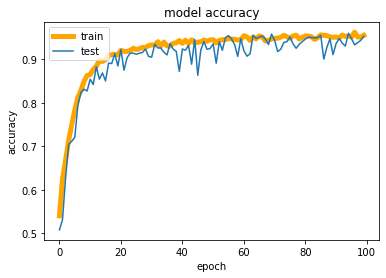

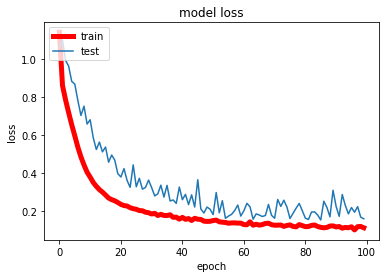

In [169]:


loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Matrix Decomposition ##

In [170]:
# LU decomposition
from numpy import array
from scipy.linalg import lu
# define a square matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
print(A)
# factorize

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [171]:
P, L, U = lu(A)
print(P)
print(L)
print(U)
# reconstruct
B = P.dot(L).dot(U)
B

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[7.         8.         9.        ]
 [0.         0.85714286 1.71428571]
 [0.         0.         0.        ]]


array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [172]:
# QR decomposition
from numpy import array
from numpy.linalg import qr
# define rectangular matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# factorize
Q, R = qr(A, 'complete')
print(Q)
print(R)
# reconstruct
B = Q.dot(R)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[-0.16903085  0.89708523  0.40824829]
 [-0.50709255  0.27602622 -0.81649658]
 [-0.84515425 -0.34503278  0.40824829]]
[[-5.91607978 -7.43735744]
 [ 0.          0.82807867]
 [ 0.          0.        ]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [173]:
# Cholesky decomposition
from numpy import array
from numpy.linalg import cholesky
# define symmetrical matrix
A = array([
[2, 1, 1],
[1, 2, 1],
[1, 1, 2]])
print(A)
# factorize
L = cholesky(A)
print(L)
# reconstruct
B = L.dot(L.T)
print(B)


[[2 1 1]
 [1 2 1]
 [1 1 2]]
[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


In [174]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [175]:
print(values)
print(vectors)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [176]:
vectors.dot(values)

array([ -2.86098561,  -8.3696465 , -13.87830739])

In [177]:
# singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print(U)
print(s)
print(V)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


## Calculate Principal Component Analysis ##

In [178]:
# principal component analysis
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# column means
M = mean(A.T, axis=1)
# center columns by subtracting column means
C = A - M
# calculate covariance matrix of centered matrix
V = cov(C.T)
# factorize covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


## Principal Component Analysis in scikit-learn

In [179]:
# principal component analysis with scikit-learn
from numpy import array
from sklearn.decomposition import PCA
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


## Asimple Optimization Model

In [127]:
import cplex

In [128]:
# first import the Model class from docplex.mp
from docplex.mp.model import Model
# create one model instance, with a name
m = Model(name='telephone_production')


In [129]:
# by default, all variables in Docplex have a lower bound of 0 and infinite upper bound
desk = m.continuous_var(name=str(desk))
cell = m.continuous_var(name='cell')

In [130]:
# write constraints
# constraint #1: desk production is greater than 100
m.add_constraint(desk >= 100)

# constraint #2: cell production is greater than 100
m.add_constraint(cell >= 100)

# constraint #3: assembly time limit
ct_assembly = m.add_constraint( 0.2 * desk + 0.4 * cell <= 400)

# constraint #4: paiting time limit
ct_painting = m.add_constraint( 0.5 * desk + 0.4 * cell <= 490)

In [131]:
m.maximize(12 * desk + 20 * cell)

In [132]:
m.print_information()

Model: telephone_production
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 4
   - linear=4
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


In [133]:
s = m.solve()
m.print_solution()

objective: 20600.000
  desk=300.000
  cell=850.000


## Travelling Salesman Problem


In [134]:
file = open('17.txt')
lines = file.readlines()
file.close()
cost_matrix=[]
for i in range(len(lines)):
    aux = lines[i][:-1].split('\t')
    aux = [int(i) for i in aux if i!= '']
    cost_matrix.append(aux)
n= len(cost_matrix)

In [135]:
import pyomo.environ as pyEnv

## Now we can initialize the model:

In [136]:
#Model
model = pyEnv.ConcreteModel()

#Indexes for the cities
model.M = pyEnv.RangeSet(n)                
model.N = pyEnv.RangeSet(n)

#Index for the dummy variable u
model.U = pyEnv.RangeSet(2,n)


## in which

#### * ConcreteModel() creates the model ;

#### * RangeSet(n) creates an index from 1 to n;

#### * RangeSet(2,n) creates an index from 2 to n.

Decision variables

The decision variables are declared in the following way:

In [137]:
#Decision variables xij
model.x = pyEnv.Var(model.N,model.M, within=pyEnv.Binary)

#Dummy variable ui
model.u = pyEnv.Var(model.N, within=pyEnv.NonNegativeIntegers,bounds=(0,n-1))

## Cost matrix
#### Next, we must provide the model with the cost matrix:

In [138]:
#Cost Matrix cij
model.c = pyEnv.Param(model.N, model.M,initialize=lambda model, i, j: cost_matrix[i-1][j-1])


  in which Param(modelo.N, model.M,initialize=lambda model, i, j: cost_matrix[i-1][j-1]) provides a  parameter to the model using a lambda function.

# Objective function
 After defining all the variables and provide the parameters, we are able to declare the objective function:



In [139]:
def obj_func(model):
    return sum(model.x[i,j] * model.c[i,j] for i in model.N for j in model.M)

model.objective = pyEnv.Objective(rule=obj_func,sense=pyEnv.minimize)

 Objective(rule=obj_func,sense=pyEnv.minimize) creates the objective function of the model and sets its optimization direction (maximize or minimize). In the TSP we want to minimize total cost, so that we set sense=pyEnv.minimize.

# Constraints
 Constraints are declared in a way very similar to the objective function. The first constraint set, which ensures that each city is arrived at from exactly one other city can be formulated in the following way:

In [140]:
def rule_const1(model,M):
    return sum(model.x[i,M] for i in model.N if i!=M ) == 1

model.const1 = pyEnv.Constraint(model.M,rule=rule_const1)

in which Constraint(model.M,rule=rule_const1) creates  constraints defined by rule_const1.


The second constraint set, which ensures that from each city there is a departure to exactly one next city can be formulated by:

In [141]:
def rule_const2(model,N):
    return sum(model.x[N,j] for j in model.M if j!=N) == 1

model.rest2 = pyEnv.Constraint(model.N,rule=rule_const2)

in which Constraint(model.N,rule=rule_const2)creates  constraints defined by rule_const2.

The third and last constraint set correspond to the MTZ subtour elimination constraints:

In [142]:
def rule_const3(model,i,j):
    if i!=j: 
        return model.u[i] - model.u[j] + model.x[i,j] * n <= n-1
    else:
        #Yeah, this else doesn't say anything
        return model.u[i] - model.u[i] == 0 
    
model.rest3 = pyEnv.Constraint(model.U,model.N,rule=rule_const3)

in which Constraint(model.U,Model.N,rule=rule_const3) creates  constraints defined by the rule_const3.

A rule type function must provide a Pyomo object, so that’s why we had to write a weird else condition.

Finally, we can print the entire model in the screen by calling:

In [143]:
#Prints the entire model
#model.pprint()

# Solving the model
In order to solve the model, we must have a previously installed solver, since Pyomo is just a modeling language. We will use the widely known commercial solver IBM CPLEX, but you can use many other commercial and non-commercial solvers, such as Gurobi, GLPK, CBC, etc.

The following code creates an instance of the solver and then solves the model:

In [144]:
#Solves
#solver = pyEnv.SolverFactory('docplex')
#result = solver.solve(model,tee = False)

#Prints the results
#print(result)

## New

In [145]:
a_dictionary = {}
for number in range(1,3):
        a_dictionary["x%s" %number] = "abc"

X=list(a_dictionary.keys())

In [146]:
x=[]
for i in range(2):
    var= m.continuous_var(name=X[i])
    x.append(var)
    

In [147]:
# write constraints
# constraint #1: desk production is greater than 100
m.add_constraint(x[0] >= 100)

# constraint #2: cell production is greater than 100
m.add_constraint(x[1] >= 100)

# constraint #3: assembly time limit
ct_assembly = m.add_constraint( 0.2 * x[0] + 0.4 * x[1] <= 400)

# constraint #4: paiting time limit
ct_painting = m.add_constraint( 0.5 * x[0] + 0.4 * x[1] <= 490)

In [148]:
m.maximize(12 * x[0] + 20 * x[1])

In [149]:
s = m.solve()
m.print_solution()

objective: 20600.000
  desk=300.000
  cell=850.000
  x1=300.000
  x2=850.000


In [161]:
a_dictionary = {}
for number in range(1,3):
        a_dictionary["x%s" %number] = "abc"

X=list(a_dictionary.keys())
X

['x1', 'x2']

 # UC problem

In [167]:
import pandas as pd
from pandas import DataFrame, Series

# make matplotlib plots appear inside the notebook
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10 ############################ <-Use this to change the plot
from IPython.core.display import HTML
HTML("<style>.container { width:100%; }</style>")

In [168]:
energies = ["coal", "gas", "diesel", "wind"]
df_energy = DataFrame({"co2_cost": [30, 5, 15, 0]}, index=energies)

# Display the 'df_energy' Data Frame
df_energy

co2_cost
coal          30
gas            5
diesel        15
wind           0

In [169]:
all_units = ["coal1", "coal2", 
             "gas1", "gas2", "gas3", "gas4", 
             "diesel1", "diesel2", "diesel3", "diesel4"]
             
ucp_raw_unit_data = {
        "energy": ["coal", "coal", "gas", "gas", "gas", "gas", "diesel", "diesel", "diesel", "diesel"],
        "initial" : [400, 350, 205, 52, 155, 150, 78, 76, 0, 0],
        "min_gen": [100, 140, 78, 52, 54.25, 39, 17.4, 15.2, 4, 2.4],
        "max_gen": [425, 365, 220, 210, 165, 158, 90, 87, 20, 12],
        "operating_max_gen": [400, 350, 205, 197, 155, 150, 78, 76, 20, 12],
        "min_uptime": [15, 15, 6, 5, 5, 4, 3, 3, 1, 1],
        "min_downtime":[9, 8, 7, 4, 3, 2, 2, 2, 1, 1],
        "ramp_up":   [212, 150, 101.2, 94.8, 58, 50, 40, 60, 20, 12],
        "ramp_down": [183, 198, 95.6, 101.7, 77.5, 60, 24, 45, 20, 12],
        "start_cost": [5000, 4550, 1320, 1291, 1280, 1105, 560, 554, 300, 250],
        "fixed_cost": [208.61, 117.37, 174.12, 172.75, 95.353, 144.52, 54.417, 54.551, 79.638, 16.259],
        "variable_cost": [22.536, 31.985, 70.5, 69, 32.146, 54.84, 40.222, 40.522, 116.33, 76.642],
        }

df_units = DataFrame(ucp_raw_unit_data, index=all_units)

# Display the 'df_units' Data Frame
df_units

energy  initial  min_gen  max_gen  operating_max_gen  min_uptime  \
coal1      coal      400   100.00      425                400          15   
coal2      coal      350   140.00      365                350          15   
gas1        gas      205    78.00      220                205           6   
gas2        gas       52    52.00      210                197           5   
gas3        gas      155    54.25      165                155           5   
gas4        gas      150    39.00      158                150           4   
diesel1  diesel       78    17.40       90                 78           3   
diesel2  diesel       76    15.20       87                 76           3   
diesel3  diesel        0     4.00       20                 20           1   
diesel4  diesel        0     2.40       12                 12           1   

         min_downtime  ramp_up  ramp_down  start_cost  fixed_cost  \
coal1               9    212.0      183.0        5000     208.610   
coal2               8    150.0      198.0        4550     117.370   
gas1                7    101.2       95.6        1320     174.120   
gas2                4     94.8      101.7        1291     172.750   
gas3                3     58.0       77.5        1280      95.353   
gas4                2     50.0       60.0        1105     144.520   
diesel1             2     40.0       24.0         560      54.417   
diesel2             2     60.0       45.0         554      54.551   
diesel3             1     20.0       20.0         300      79.638   
diesel4             1     12.0       12.0         250      16.259   

         variable_cost  
coal1           22.536  
coal2           31.985  
gas1            70.500  
gas2            69.000  
gas3            32.146  
gas4            54.840  
diesel1         40.222  
diesel2         40.522  
diesel3        116.330  
diesel4         76.642

In [170]:
# Add a derived co2-cost column by merging with df_energies
# Use energy key from units and index from energy dataframe
df_up = pd.merge(df_units, df_energy, left_on="energy", right_index=True)
df_up.index.names=['units']

# Display first rows of new 'df_up' Data Frame
df_up.head()


energy  initial  min_gen  max_gen  operating_max_gen  min_uptime  \
units                                                                    
coal1   coal      400   100.00      425                400          15   
coal2   coal      350   140.00      365                350          15   
gas1     gas      205    78.00      220                205           6   
gas2     gas       52    52.00      210                197           5   
gas3     gas      155    54.25      165                155           5   

       min_downtime  ramp_up  ramp_down  start_cost  fixed_cost  \
units                                                             
coal1             9    212.0      183.0        5000     208.610   
coal2             8    150.0      198.0        4550     117.370   
gas1              7    101.2       95.6        1320     174.120   
gas2              4     94.8      101.7        1291     172.750   
gas3              3     58.0       77.5        1280      95.353   

       variable_cost  co2_cost  
units                           
coal1         22.536        30  
coal2         31.985        30  
gas1          70.500         5  
gas2          69.000         5  
gas3          32.146         5

nb periods = 168


<AxesSubplot:title={'center':'Demand'}>

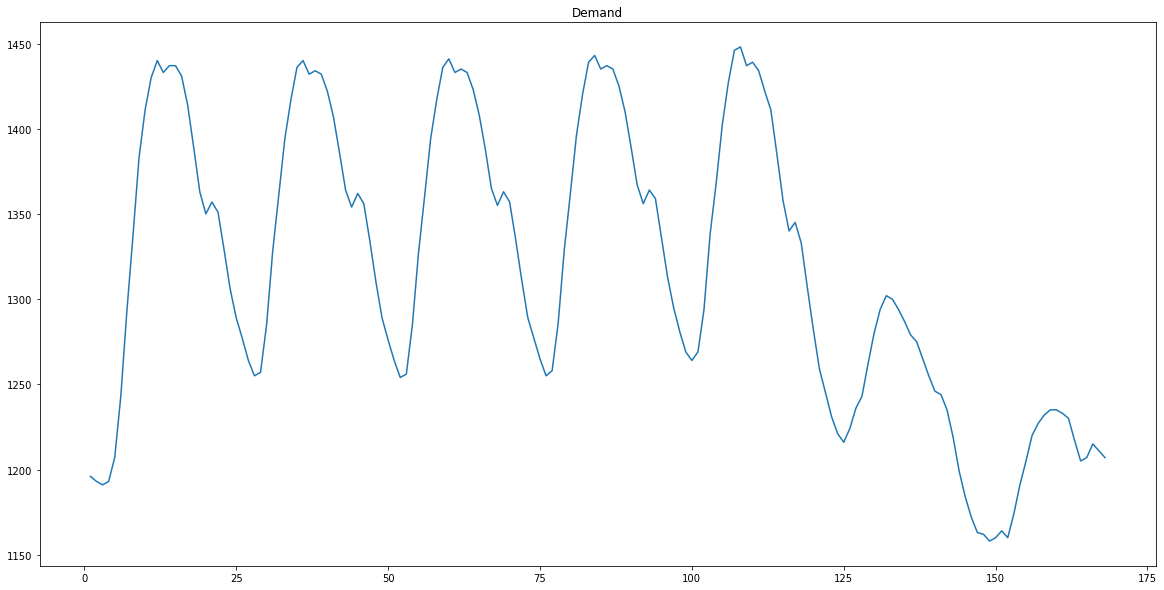

In [171]:
raw_demand = [1196,1193,1191,1193,1207,1243,1293,1337,1383,1411,1430,1440,1433,1437,1437,1431,
              1414,1389,1363,1350,1357,1351,1329,1306,1289,1277,1264,1255,1257,1285,1328,1361,
              1394,1417,1436,1440,1432,1434,1432,1422,1407,1386,1364,1354,1362,1356,1334,1310,
              1289,1276,1264,1254,1256,1285,1327,1360,1394,1417,1436,1441,1433,1435,1433,1423,
              1408,1388,1365,1355,1363,1357,1335,1311,1289,1277,1265,1255,1258,1286,1329,1362,
              1396,1420,1439,1443,1435,1437,1435,1425,1410,1389,1367,1356,1364,1359,1336,1313,
              1295,1281,1269,1264,1269,1294,1338,1368,1402,1427,1446,1448,1437,1439,1434,1422,
              1411,1385,1358,1340,1345,1333,1307,1282,1259,1245,1231,1221,1216,1224,1236,1243,
              1262,1280,1294,1302,1300,1294,1287,1279,1275,1265,1255,1246,1244,1235,1219,1199,
              1184,1172,1163,1162,1158,1160,1164,1160,1174,1191,1205,1220,1227,1232,1235,1235,1233,1230,1217,1205,1207,1215,1211,1207]
nb_periods = len(raw_demand)
print("nb periods = {}".format(nb_periods))

demand = Series(raw_demand, index = range(1, nb_periods+1))

# plot demand
demand.plot(title="Demand")

In [172]:
from docplex.mp.environment import Environment
env = Environment()
env.print_information()

* system is: Darwin 64bit
* Python version 3.8.6, located at: /opt/anaconda3/envs/Project/bin/python
* docplex is present, version is 2.21.207
* CPLEX library is present, version is 20.1.0.0, located at: /opt/anaconda3/envs/Project/lib/python3.8/site-packages
* pandas is present, version is 1.1.5


In [173]:
from docplex.mp.model import Model

ucpm = Model("ucp")

In [174]:
units = all_units
# periods range from 1 to nb_periods included
periods = range(1, nb_periods+1)

# in use[u,t] is true iff unit u is in production at period t
in_use = ucpm.binary_var_matrix(keys1=units, keys2=periods, name="in_use")

# true if unit u is turned on at period t
turn_on = ucpm.binary_var_matrix(keys1=units, keys2=periods, name="turn_on")

# true if unit u is switched off at period t
# modeled as a continuous 0-1 variable, more on this later
turn_off = ucpm.continuous_var_matrix(keys1=units, keys2=periods, lb=0, ub=1, name="turn_off")

# production of energy for unit u at period t
production = ucpm.continuous_var_matrix(keys1=units, keys2=periods, name="p")

# at this stage you have defined the decision variables.
ucpm.print_information()

Model: ucp
 - number of variables: 6720
   - binary=3360, integer=0, continuous=3360
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [179]:
# Organize all decision variables in a DataFrame indexed by 'units' and 'periods'
df_decision_vars = DataFrame({'in_use': in_use, 'turn_on': turn_on, 'turn_off': turn_off, 'production': production})
# Set index names
df_decision_vars.index.names=['units', 'periods']

# Display first few rows of 'df_decision_vars' DataFrame
df_decision_vars.head()

in_use          turn_on          turn_off production
units periods                                                              
coal1 1        in_use_coal1_1  turn_on_coal1_1  turn_off_coal1_1  p_coal1_1
      2        in_use_coal1_2  turn_on_coal1_2  turn_off_coal1_2  p_coal1_2
      3        in_use_coal1_3  turn_on_coal1_3  turn_off_coal1_3  p_coal1_3
      4        in_use_coal1_4  turn_on_coal1_4  turn_off_coal1_4  p_coal1_4
      5        in_use_coal1_5  turn_on_coal1_5  turn_off_coal1_5  p_coal1_5

In [180]:
# Create a join between 'df_decision_vars' and 'df_up' Data Frames based on common index id (ie: 'units')
# In 'df_up', one keeps only relevant columns: 'min_gen' and 'max_gen'
df_join_decision_vars_up = df_decision_vars.join(df_up[['min_gen', 'max_gen']], how='inner')

# Display first few rows of joined Data Frames
df_join_decision_vars_up.head()

in_use          turn_on          turn_off production  \
units periods                                                                 
coal1 1        in_use_coal1_1  turn_on_coal1_1  turn_off_coal1_1  p_coal1_1   
      2        in_use_coal1_2  turn_on_coal1_2  turn_off_coal1_2  p_coal1_2   
      3        in_use_coal1_3  turn_on_coal1_3  turn_off_coal1_3  p_coal1_3   
      4        in_use_coal1_4  turn_on_coal1_4  turn_off_coal1_4  p_coal1_4   
      5        in_use_coal1_5  turn_on_coal1_5  turn_off_coal1_5  p_coal1_5   

               min_gen  max_gen  
units periods                    
coal1 1          100.0      425  
      2          100.0      425  
      3          100.0      425  
      4          100.0      425  
      5          100.0      425

In [181]:
# When in use, the production level is constrained to be between min and max generation.
for item in df_join_decision_vars_up.itertuples(index=False):
    ucpm += (item.production <= item.max_gen * item.in_use)
    ucpm += (item.production >= item.min_gen * item.in_use)

In [182]:
# Initial state
# If initial production is nonzero, then period #1 is not a turn_on
# else turn_on equals in_use
# Dual logic is implemented for turn_off
for u in units:
    if df_up.initial[u] > 0:
        # if u is already running, not starting up
        ucpm.add_constraint(turn_on[u, 1] == 0)
        # turnoff iff not in use
        ucpm.add_constraint(turn_off[u, 1] + in_use[u, 1] == 1)
    else:
        # turn on at 1 iff in use at 1
        ucpm.add_constraint(turn_on[u, 1] == in_use[u, 1])
        # already off, not switched off at t==1
        ucpm.add_constraint(turn_off[u, 1] == 0)
ucpm.print_information()

Model: ucp
 - number of variables: 6720
   - binary=3360, integer=0, continuous=3360
 - number of constraints: 3380
   - linear=3380
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [183]:
# Use groupby operation to process each unit
for unit, r in df_decision_vars.groupby(level='units'):
    u_ramp_up = df_up.ramp_up[unit]
    u_ramp_down = df_up.ramp_down[unit]
    u_initial = df_up.initial[unit]
    # Initial ramp up/down
    # Note that r.production is a Series that can be indexed as an array (ie: first item index = 0)
    ucpm.add_constraint(r.production[0] - u_initial <= u_ramp_up)
    ucpm.add_constraint(u_initial - r.production[0] <= u_ramp_down)
    for (p_curr, p_next) in zip(r.production, r.production[1:]):
        ucpm.add_constraint(p_next - p_curr <= u_ramp_up)
        ucpm.add_constraint(p_curr - p_next <= u_ramp_down)

ucpm.print_information()

Model: ucp
 - number of variables: 6720
   - binary=3360, integer=0, continuous=3360
 - number of constraints: 6740
   - linear=6740
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [184]:
# Turn_on, turn_off
# Use groupby operation to process each unit
for unit, r in df_decision_vars.groupby(level='units'):
    for (in_use_curr, in_use_next, turn_on_next, turn_off_next) in zip(r.in_use, r.in_use[1:], r.turn_on[1:], r.turn_off[1:]):
        # if unit is off at time t and on at time t+1, then it was turned on at time t+1
        ucpm.add_constraint(in_use_next - in_use_curr <= turn_on_next)

        # if unit is on at time t and time t+1, then it was not turned on at time t+1
        # mdl.add_constraint(in_use_next + in_use_curr + turn_on_next <= 2)

        # if unit is on at time t and off at time t+1, then it was turned off at time t+1
        ucpm.add_constraint(in_use_curr - in_use_next + turn_on_next == turn_off_next)
ucpm.print_information() 

Model: ucp
 - number of variables: 6720
   - binary=3360, integer=0, continuous=3360
 - number of constraints: 10080
   - linear=10080
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [185]:
# Minimum uptime, downtime
for unit, r in df_decision_vars.groupby(level='units'):
    min_uptime   = df_up.min_uptime[unit]
    min_downtime = df_up.min_downtime[unit]
    # Note that r.turn_on and r.in_use are Series that can be indexed as arrays (ie: first item index = 0)
    for t in range(min_uptime, nb_periods):
        ctname = "min_up_{0!s}_{1}".format(*r.index[t])
        ucpm.add_constraint(ucpm.sum(r.turn_on[(t - min_uptime) + 1:t + 1]) <= r.in_use[t], ctname)

    for t in range(min_downtime, nb_periods):
        ctname = "min_down_{0!s}_{1}".format(*r.index[t])
        ucpm.add_constraint(ucpm.sum(r.turn_off[(t - min_downtime) + 1:t + 1]) <= 1 - r.in_use[t], ctname)

In [186]:
# Enforcing demand
# use a >= here to be more robust, 
# objective will ensure efficient production
for period, r in df_decision_vars.groupby(level='periods'):
    total_demand = demand[period]
    ctname = "ct_meet_demand_%d" % period
    ucpm.add_constraint(ucpm.sum(r.production) >= total_demand, ctname) 

In [188]:
 #Create a join between 'df_decision_vars' and 'df_up' Data Frames based on common index ids (ie: 'units')
# In 'df_up', one keeps only relevant columns: 'fixed_cost', 'variable_cost', 'start_cost' and 'co2_cost'
df_join_obj = df_decision_vars.join(
    df_up[['fixed_cost', 'variable_cost', 'start_cost', 'co2_cost']], how='inner')

# Display first few rows of joined Data Frame
df_join_obj.head()

in_use          turn_on          turn_off production  \
units periods                                                                 
coal1 1        in_use_coal1_1  turn_on_coal1_1  turn_off_coal1_1  p_coal1_1   
      2        in_use_coal1_2  turn_on_coal1_2  turn_off_coal1_2  p_coal1_2   
      3        in_use_coal1_3  turn_on_coal1_3  turn_off_coal1_3  p_coal1_3   
      4        in_use_coal1_4  turn_on_coal1_4  turn_off_coal1_4  p_coal1_4   
      5        in_use_coal1_5  turn_on_coal1_5  turn_off_coal1_5  p_coal1_5   

               fixed_cost  variable_cost  start_cost  co2_cost  
units periods                                                   
coal1 1            208.61         22.536        5000        30  
      2            208.61         22.536        5000        30  
      3            208.61         22.536        5000        30  
      4            208.61         22.536        5000        30  
      5            208.61         22.536        5000        30

In [189]:
# objective
total_fixed_cost = ucpm.sum(df_join_obj.in_use * df_join_obj.fixed_cost)
total_variable_cost = ucpm.sum(df_join_obj.production * df_join_obj.variable_cost)
total_startup_cost = ucpm.sum(df_join_obj.turn_on * df_join_obj.start_cost)
total_co2_cost = ucpm.sum(df_join_obj.production * df_join_obj.co2_cost)
total_economic_cost = total_fixed_cost + total_variable_cost + total_startup_cost

total_nb_used = ucpm.sum(df_decision_vars.in_use)
total_nb_starts = ucpm.sum(df_decision_vars.turn_on)

# store expression kpis to retrieve them later.
ucpm.add_kpi(total_fixed_cost   , "Total Fixed Cost")
ucpm.add_kpi(total_variable_cost, "Total Variable Cost")
ucpm.add_kpi(total_startup_cost , "Total Startup Cost")
ucpm.add_kpi(total_economic_cost, "Total Economic Cost")
ucpm.add_kpi(total_co2_cost     , "Total CO2 Cost")
ucpm.add_kpi(total_nb_used, "Total #used")
ucpm.add_kpi(total_nb_starts, "Total #starts")

# minimize sum of all costs
ucpm.minimize(total_fixed_cost + total_variable_cost + total_startup_cost + total_co2_cost)

In [190]:
assert ucpm.solve(), "!!! Solve of the model fails"

DOcplexLimitsExceeded: **** Promotional version. Problem size limits exceeded, CPLEX code=1016

 # APPENDICES #

In [62]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy  as np

In [63]:
airdata=pd.read_csv('station_day.csv')


Now have created a new data set, by deleting rows with missing values.

In [64]:
data = airdata.dropna(axis = 0, how ='any')  


In [65]:
data2=data.iloc[:,[2,3,4,5,8,9,10,15]]

data2.head()

PM2.5    PM10    NO    NO2    CO    SO2      O3 AQI_Bucket
1  81.40  124.50  1.44  20.50  0.12  15.24  127.09   Moderate
2  78.32  129.06  1.26  26.00  0.14  26.96  117.44   Moderate
3  88.76  135.32  6.60  30.85  0.11  33.59  111.81   Moderate
4  64.18  104.09  2.56  28.07  0.09  19.00  138.18   Moderate
5  72.47  114.84  5.23  23.20  0.16  10.55  109.74   Moderate

In [66]:
data2.describe()

PM2.5          PM10            NO           NO2            CO  \
count  10314.000000  10314.000000  10314.000000  10314.000000  10314.000000   
mean      52.482100    108.494813     12.204897     33.188329      0.699242   
std       43.101142     67.881316     18.880759     22.909939      0.436917   
min        1.090000      5.770000      0.020000      0.010000      0.000000   
25%       25.740000     62.692500      2.650000     15.220000      0.420000   
50%       43.400000     98.805000      6.270000     28.570000      0.630000   
75%       66.210000    137.837500     13.430000     46.170000      0.900000   
max      734.560000    830.100000    262.000000    254.780000      4.740000   

                SO2            O3  
count  10314.000000  10314.000000  
mean       9.907130     32.224498  
std        7.926233     19.937162  
min        0.100000      0.030000  
25%        4.370000     18.380000  
50%        7.860000     28.240000  
75%       12.810000     41.410000  
max       67.260000    162.330000

In [67]:
data2.shape

(10314, 8)

In [68]:
data1=data
data1['Date'] = pd.to_datetime(data1['Date'])
data1=data1.set_index('Date')
data1['Month']=data1.index.month
data1['Day_of_week']=data1.index.dayofweek
data1['Day']=data1.index.day


<AxesSubplot:xlabel='Day_of_week', ylabel='AQI'>

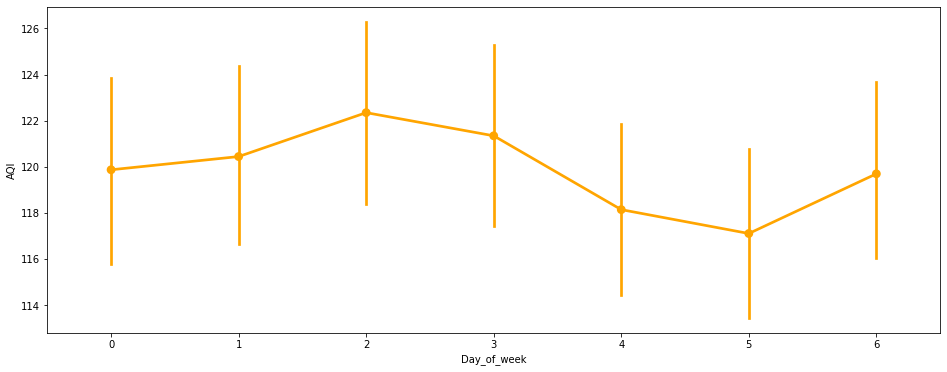

In [69]:
fig= plt.figure(figsize=(16,6))
s.pointplot(data=data1,x='Day_of_week',y='AQI',color='orange')

In [70]:
data.AQI_Bucket.unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

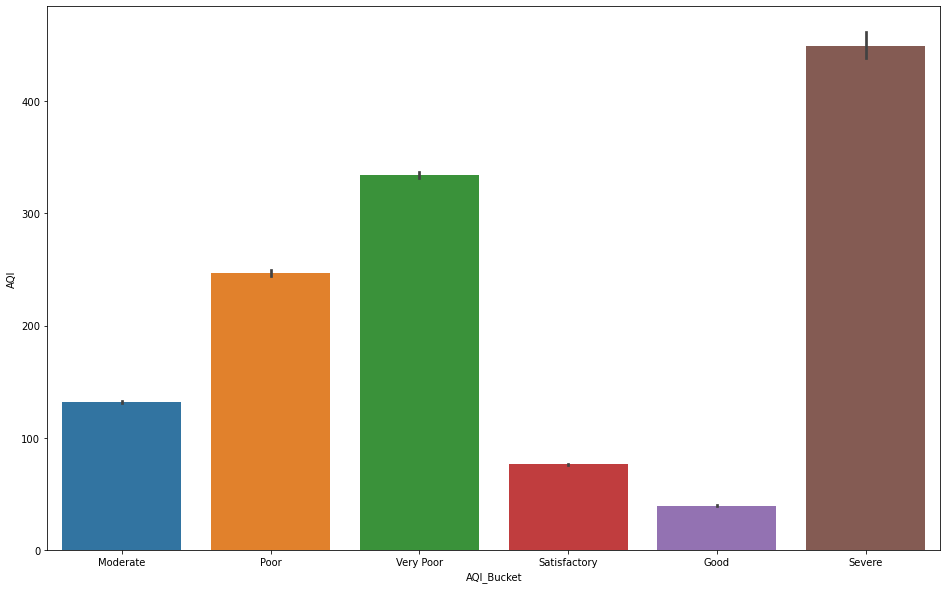

In [71]:
import matplotlib.pyplot as plt
import seaborn as s

fig,ax=plt.subplots(figsize=(16,10))
ax=s.barplot(x='AQI_Bucket',y='AQI', data=data)
plt.show

##  AIR QUALITY BUCKET CLASSIFICATION USING DECISION TREE ##

In [87]:
%%time
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
mydata=New_data
X=mydata.drop(columns='AQI_Bucket')
y=mydata['AQI_Bucket']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

A=[[y_test],[predictions]]
score1=accuracy_score(y_test,predictions)

#tree.export_graphviz(model,out_file='music_recommender.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)
score1

CPU times: user 110 ms, sys: 3.8 ms, total: 113 ms
Wall time: 118 ms


0.769268056228793

## AIR QUALITY BUCKET CLASSIFICATION USING NAIVE BAYES ##

In [88]:
%%time
X=mydata.iloc[:,[0,1,2,3,4,5,6]].values
y=mydata.iloc[:,7].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#Feature scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Fitting Naive Bayes Classification using linear Kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,y_train)
#Predicting test set results
y_pred=nvclassifier.predict(X_test)

score2=accuracy_score(y_test,y_pred)
score2

CPU times: user 29.4 ms, sys: 3.58 ms, total: 32.9 ms
Wall time: 41.8 ms


0.7862336403296171

## AIR QUALITY BUCKET CLASSIFICATION USING K-NEAREST NEIGHBORS ##

In [134]:
%%time
from sklearn.neighbors import KNeighborsClassifier
#Training and predicting
knnmodel=KNeighborsClassifier(n_neighbors=8) 
knnmodel.fit(X_train,y_train)
y_pred=knnmodel.predict(X_test) 
score3=accuracy_score(y_test,y_pred)
score3

CPU times: user 181 ms, sys: 2.93 ms, total: 184 ms
Wall time: 194 ms


0.8245273873000485

In [129]:

knnmodel=[KNeighborsClassifier(n_neighbors=i) for i in range(1,101)]
fit=[knnmodel[i].fit(X_train,y_train) for i in range(len(knnmodel))]
y_pred=[knnmodel[i].predict(X_test) for i in range(len(knnmodel)) ]
score3=[accuracy_score(y_test,y_pred[i]) for i in range(len(knnmodel)) ]

CPU times: user 21 s, sys: 333 ms, total: 21.4 s
Wall time: 21.8 s


In [130]:
for i in range(len(score3)):
    if (score3[i]==max(score3)):
        k=i+1
        print([k,max(score3)])

[8, 0.8245273873000485]


Text(0, 0.5, 'accuracy_score')

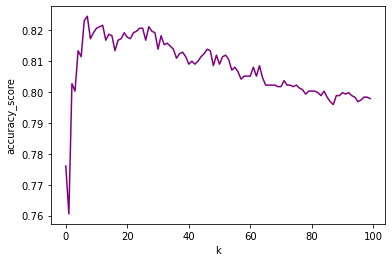

In [131]:
import matplotlib.pyplot as plt
index=[i for i in range(len(knnmodel))]
plt.plot(index,score3, color='purple')
plt.xlabel('k')
plt.ylabel('accuracy_score')

In [127]:
x=[score1*100,score2*100,max(score3)*100]
x

[76.9268056228793, 78.6233640329617, 82.45273873000485]

In [4]:
>>> from tslearn.utils import to_time_series
>>> my_first_time_series = [1, 3, 4, 2]
>>> formatted_time_series = to_time_series(my_first_time_series)
#>>> print(formatted_time_series.shape)
print(formatted_time_series)

[[1.]
 [3.]
 [4.]
 [2.]]


In [5]:
>>> from tslearn.utils import to_time_series_dataset
>>> my_first_time_series = [1, 3, 4, 2]
>>> my_second_time_series = [1, 2, 4, 2]
>>> formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])
>>> print(formatted_dataset.shape)
(2, 4, 1)
>>> my_third_time_series = [1, 2, 4, 2, 2]
>>> formatted_dataset = to_time_series_dataset([my_first_time_series,
                                                my_second_time_series,
                                                my_third_time_series])
>>> print(formatted_dataset.shape)

(2, 4, 1)
(3, 5, 1)


In [3]:
import pandas as pd
data=pd.read_csv("DLI_CO_DATA.csv")
data.head()

Date/Time  NO2 (μg/m3)  SO2 (μg/m3)  O3 (μg/m3)  CO (μg/m3)  \
0  01/01/2020 12:00 AM         41.7          4.2         5.4      1045.9   
1   01/01/2020 1:00 AM         41.0          4.0         7.7       978.0   
2   01/01/2020 2:00 AM         50.2          4.9         4.5      1264.4   
3   01/01/2020 3:00 AM         50.8          5.3         3.0      1119.1   
4   01/01/2020 4:00 AM         36.8          4.3         1.7      1103.1   

   PM10 (μg/m3)  PM 2.5 (μg/m3)  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         113.2            89.8         NaN         NaN         NaN  
1          49.5            35.8         NaN         NaN         NaN  
2          64.8            35.5         NaN         NaN         NaN  
3          60.3            38.6         NaN         NaN         NaN  
4          39.1            28.7         NaN         NaN         NaN

In [4]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
y, X = dmatrices('NO2(μg/m3) ~ SO2(μg/m3)+O3(μg/m3)+CO(μg/m3)', data=data, return_type='dataframe')

PatsyError: Error evaluating factor: NameError: name 'NO2' is not defined
    NO2(μg/m3) ~ SO2(μg/m3)+O3(μg/m3)+CO(μg/m3)
    ^^^^^^^^^^